<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_3_4_Freq_Domain_Spectral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management

library(TSA)
library(fpp2)
library(tidyverse)

# Spectral Analysis

* also known as *frequency domain analysis*. (TSAAR)
* A field of time series analysis which involves methodologies to extract insights on the regular periodic behavior of the time series data.

Comment:
* Analyzing time series data through the autocorrelations is what we would call analyzing time series data on the *time domain*
* Analyzing the preiodic/frequency/wave patterns in time series data is what we would call analyzing the time series data on the *frequency domain*.
* We typically do spectral analysis for stationary data. Often, the data is differenced or detrended before analysis is conducted.


## Wave Equation / Periodic Process (TSAAR, TSDAAUR)

Let's begin with the basic wave equation, such that for time $t \in \mathbb{R}$,

$$x_t = R \cos (2\pi  f  t +\Phi)$$

$R=$ the *amplitude* of the wave, i.e., the height of the function from the x-axis

$f=$ the *frequency* of the time series, meaning how many times a pattern is observed in 1 unit of time. $\frac{1}{f}$ is often described as the *period* of the time series, in which the curve would repeat every $\frac{1}{f}$ time units.

$\Phi =$ is the *phase* or *shift* in the wave, which just determines the starting point of the wave.

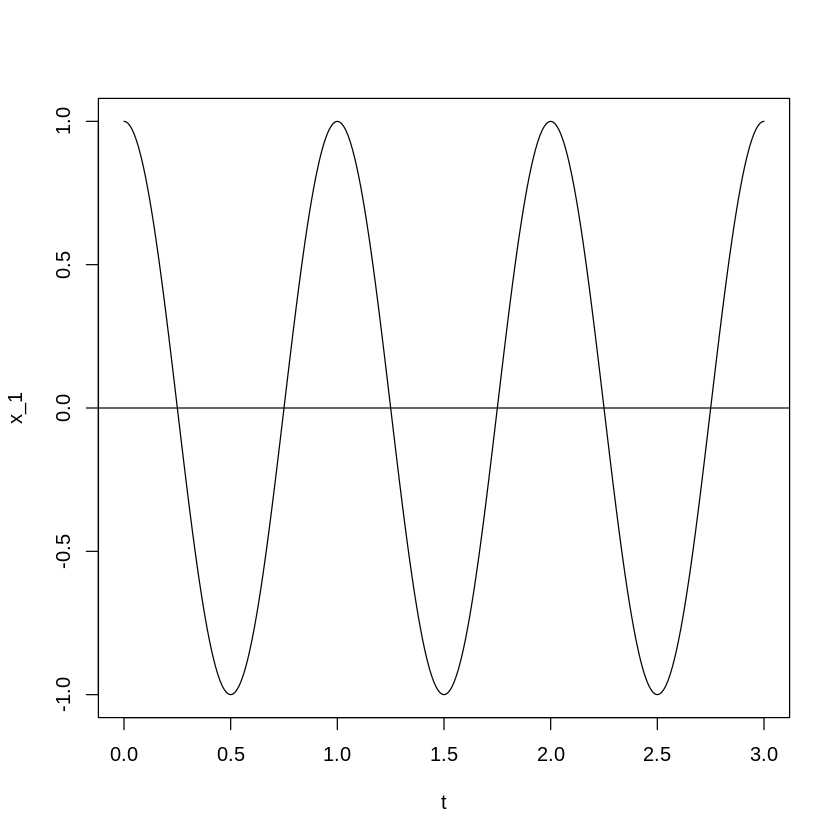

In [ ]:
## Basic Parts of the Wave Equation

## setup the t vector

t <- seq(from = 0, to = 3 , by = 0.01 )

## Base parameter setup

R1 <- 1
f1 <- 1
Phi1 <- 0

x_1 <- R1 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
abline(h = 0)

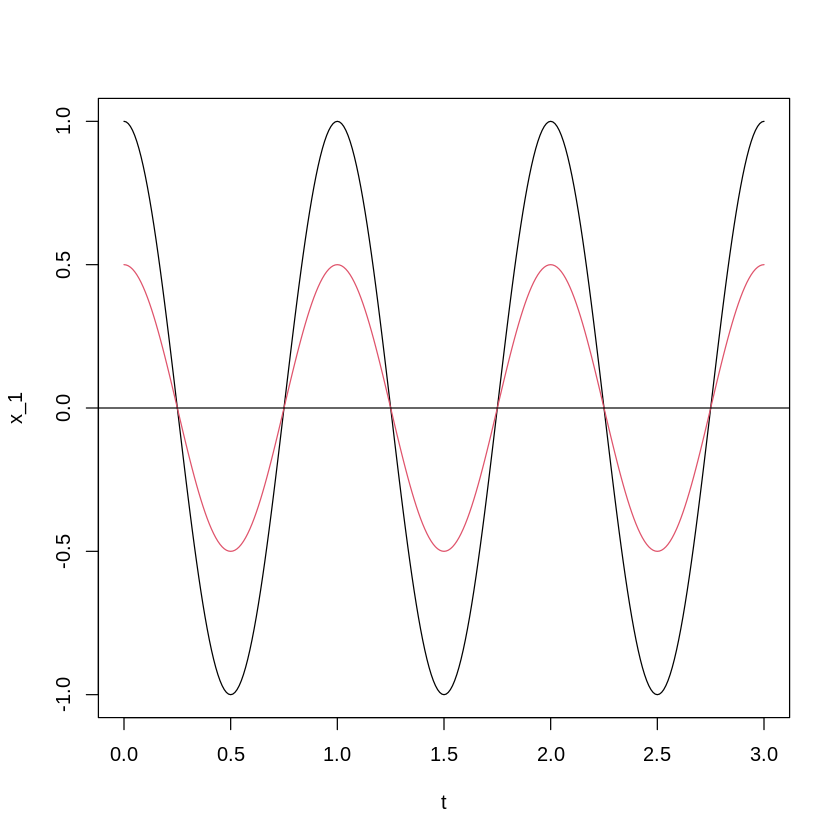

In [ ]:
## Changing Amplitude

R2 <- 0.5
f1 <- 1
Phi1 <- 0

x_2 <- R2 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

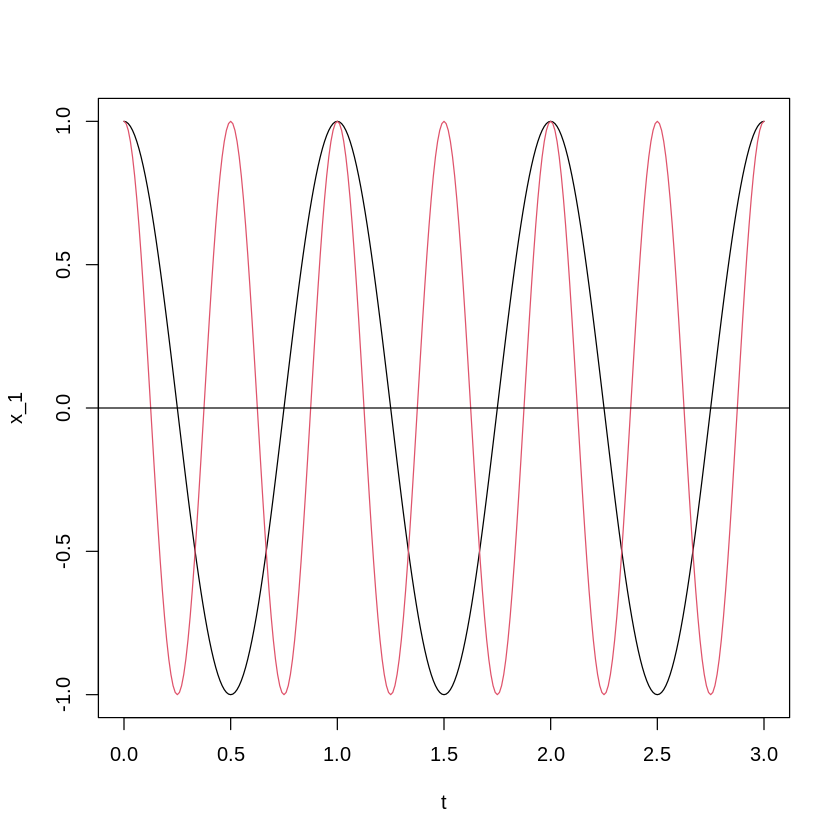

In [ ]:
## Changing Frequency

R1 <- 1
f2 <- 2
Phi1 <- 0

x_2 <- R1 * cos(2*pi*f2 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

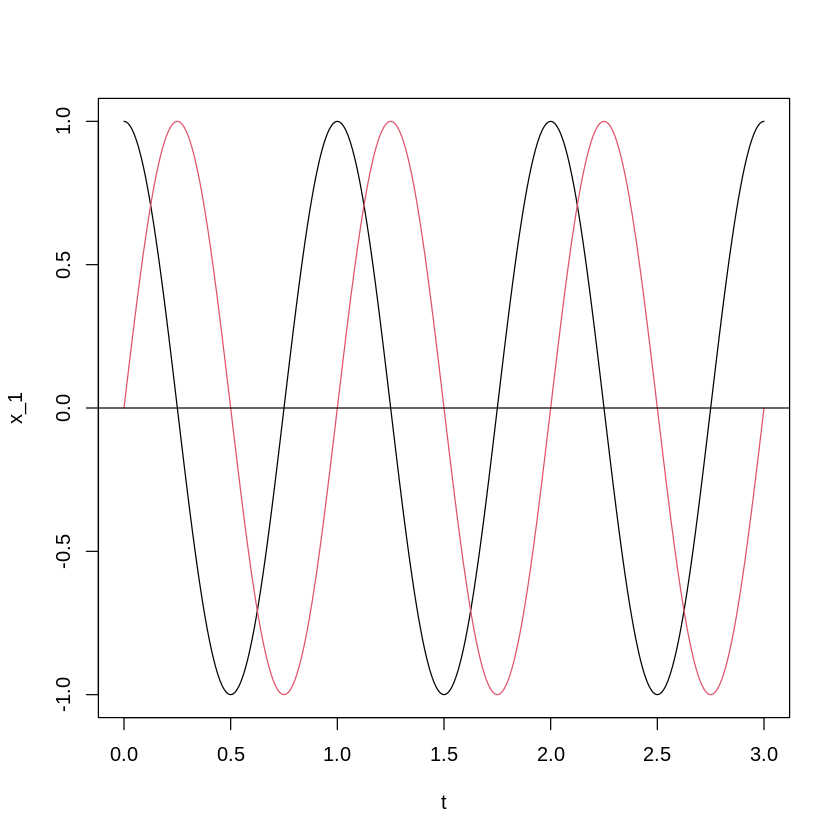

In [ ]:
## Changing Phase

R1 <- 1
f1 <- 1
Phi2 <- -pi/2

x_2 <- R1 * cos(2*pi*f1 *t + Phi2 )

## this shift is equivalent to the sine function with similar amplitude and frequency due to sine and cosine being complementary (thus "co-"sine)

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

Note that the wave function above only works out for only one wave of which data often involves a sum of multiple waves at differing amplitudes, frequencies, and shifts, in addition to some randomness like a white noise process.

Using the example in TATSAIR (pp.151-152), let us plot the following waves that add up together to form a simulated data that is not that far off from what is seen from real data:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right)$$

$$X_{2t} = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right)$$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$



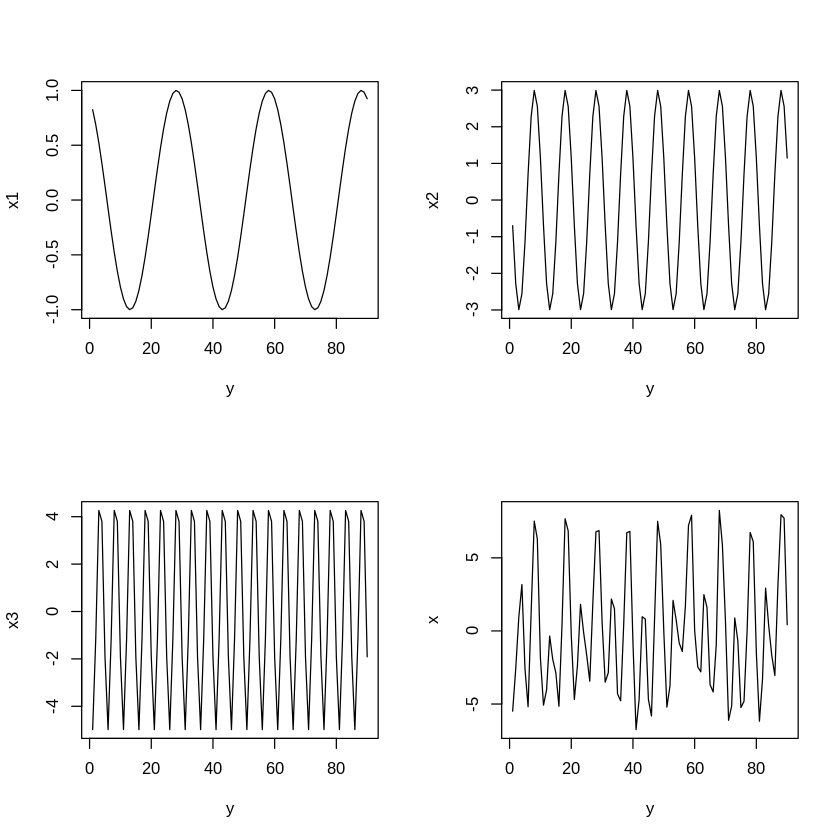

In [ ]:
## Set Up Input
y<-seq(from = 1, to = 90, by = 1)

## Wave Components
x1<- 1*cos(2*pi*y*1/30 + pi/8)
x2<- 3*cos(2*pi*y*1/10 + 3*pi/8)
x3<- 5*cos(2*pi*y*1/5 + 5*pi/8)

## Set Seed for Normal White Noise
set.seed(1)
z<- rnorm(length(y), 0, 1)

## Summing UP Components
x<-x1+x2+x3+z

## Displaying Plots in a 2x2 setup
par(mfrow=c(2,2))

## Individual Wave Components and Simulated Data
plot(y, x1, type="l", xlab="y", ylab="x1")
plot(y, x2, type="l", xlab="y", ylab="x2")
plot(y, x3, type="l", xlab="y", ylab="x3")
plot(y, x, type="l", xlab="y", ylab="x")

Alternatively, we can express the same equation with the following equation (TSAAR):

$$x_t = R cos (2\pi  f  t +\Phi) = A \cos(2\pi ft) + B \sin(2\pi ft)$$

Where the two equations one-to-one transformations with

$$ R = \sqrt{A^2 + B^2} \quad , \quad \Phi = arctan (-B/A) $$

$$ A = R \cos(\Phi) \quad , \quad B = R \sin(\Phi) $$

With $arctan()$ being the arc tangent function defined with $\mathbb{R}$ as domain and itss range is $(-\pi/2, \pi/2)$.

In terms of statistical modeling, if we have data $y_t$ that we would like to fit a wave function with frequency $f$ as a known quantity before modeling, we can use $x_{1t} = \cos(2\pi ft)$ and $x_{2t} = \sin(2\pi ft)$ as independent variables with parameters $A$ and $B$ to be estimated by a model.

## The Harmonic Regression Model

By the re-expression of the wave function into a pair of sin and cos functions for a given frequency, we can fit these function pairs with different frequencies into periodic time series data with a model of the following form (TSAAR):

$$Y_t = A_0 + \sum_{j=1}^m \left[ A_j \cos(2\pi f_j t) + B_j \sin(2\pi f_j t) \right] + Z_t$$
$$Z_t \sim iid. N(0,\sigma^2)$$

Where $f_j$ are a frequencies of interest for the researcher.

If $f_j$ is a family of frequencies allowed for the data, called *Fourier frequencies*, the regression model becomes easier. For a number of data points $n$ with $k = [[n/2]]$, where $[[r]]$ truncates the decimal or fractional value of $r>0$, the Fourier frequencies are $f_j = 1/n, 2/n, ..., k/n$. The sine and cosine regressor variables are orthogonal and thus the coefficients are simpler to estimate.

In the odd $n = 2k +1$ case, the summation above is

$$Y_t = A_0 + \sum_{j=1}^k \left[ A_j \cos \left(2\pi \frac{j}{n} t \right) + B_j \sin \left(2\pi \frac{j}{n} t \right) \right] + Z_t$$

And the solutions to the parameters $A_j$ and $B_j$ are:

$$\hat{A}_0 = \bar{Y}$$

$$\hat{A}_j = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi \frac{j}{n} t \right) $$

$$\hat{B}_j = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi \frac{j}{n} t \right) $$

In the case of even $n = 2k$, the solution for $j = 1, 2,..., k-1$ is similar to the estimators above except for

$$\hat{A}_k = \frac{1}{n} \sum_{t=1}^n (-1)^{t} Y_t $$
$$\hat{B}_k = 0$$

Note that $f_k = 1/2$ when $n$ is even.

The estimation procedure above works whether there is a deterministic or stochastic model for the construction of the periodic function or periodic time series.

Using the example in TATSAIR, we can re-express the components into this form:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right) = \left[  \cos \left( \frac{\pi}{8} \right) \right] \cos \left( 2\pi \times \frac{1}{30} \times t \right) + \left[  \sin \left( \frac{\pi}{8} \right) \right] \sin \left( 2\pi \times \frac{1}{30} \times t \right) $$

$$X_{2t}  = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right) = \left[  3 \cos \left( \frac{3 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{10} \times t \right) + \left[  3 \sin \left( \frac{3 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{10} \times t \right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right) = \left[  5 \cos \left( \frac{5 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{5} \times t \right) + \left[  5 \sin \left( \frac{5 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{5} \times t \right) $$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$


If we would assume that $n = 90$ and ignore the stochastic term $Z_t$, i.e., just deal with $X_t^{(deterministic)} =  X_{1t} + X_{2t} + X_{3t}$, the values for $\hat{A}_j$ and $\hat{B}_j$ are:

for $f_3 = 3/90 = 1/30$: $\hat{A}_3 = \cos \left( \frac{\pi}{8} \right)$ and $\hat{B}_3 = \sin \left( \frac{\pi}{8} \right)$

for $f_9 = 9/90 = 1/10$: $\hat{A}_9 = 3 \cos \left( \frac{3 \pi}{8} \right)$ and $\hat{B}_9 = 3 \sin \left( \frac{3 \pi}{8} \right)$

for $f_{18} = 18/90 = 1/5$: $\hat{A}_{18} = 5 \cos \left( \frac{5 \pi}{8} \right)$ and $\hat{B}_{18} = 5 \sin \left( \frac{5 \pi}{8} \right)$

For other $f_j$, $\hat{A}_j = \hat{B}_j = 0$.

If ever we include the white noise $Z_t$, there will be some slight difference but not too drastic.

## The Periodogram

* for an odd sample size $n= 2k+1$, the periodogram $I$ at frequency $f=j/n$, for $j=1,2,...,k$ is defined as:

$$I \left( \frac{j}{n} \right) =\frac{n}{2} \left( \hat{A}_j^2 + \hat{B}_j^2  \right) $$

* for an even sample size $n = 2k$, the periodogram is similar for $j =1,2,...,k -1 $ as shown above except for

$$I \left( \frac{1}{2}\right) = n \hat{A}_k^2 $$

* the periodogram shows the relative strength of the sine-cosine pair at various frequencies.

* For odd $n$, the sum below has 2 degrees of freedom; for even $n$ it has 1 degree of freedom:

$$ (n-1) S_Y^2 = \sum_{t=1}^n \left( Y_t - \bar{Y}\right)^2 = \sum_{j=1}^k I \left( \frac{j}{n} \right) $$

* The periodogram breaks down which frequency contributes to the periodic behavior of the time series.

Let's demonstrate with a a code using the example from TATSAIR:

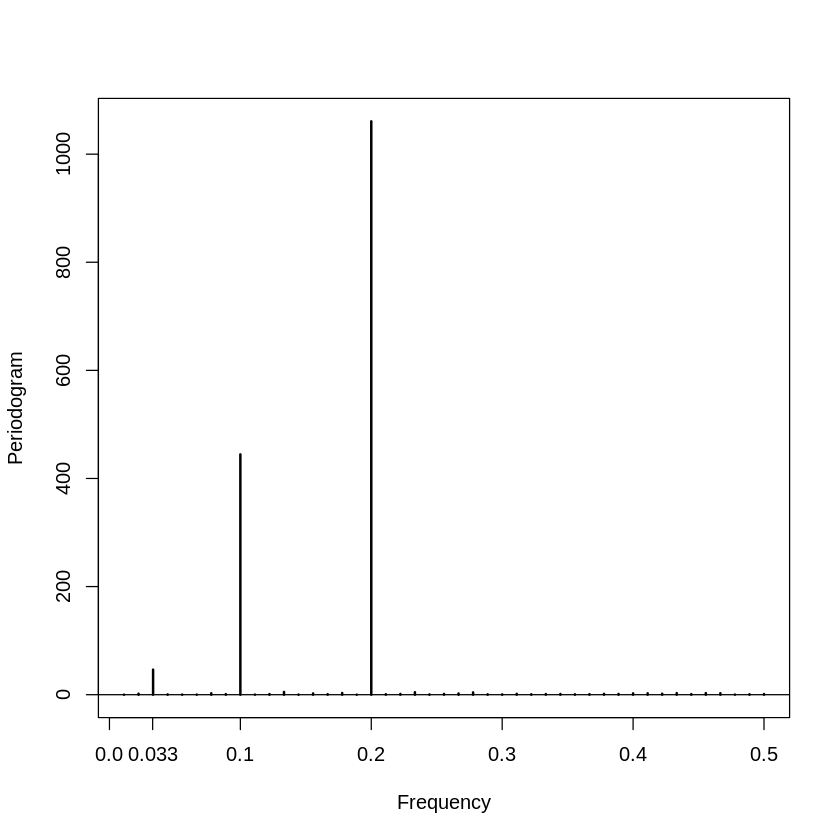

In [ ]:
## Using the output from the TATSAIR Example

## generate the periodogram
periodogram(x)

## add a x-axis line
abline(h = 0)

## add an axis labels for 1/30
axis(1, at = 0.033)

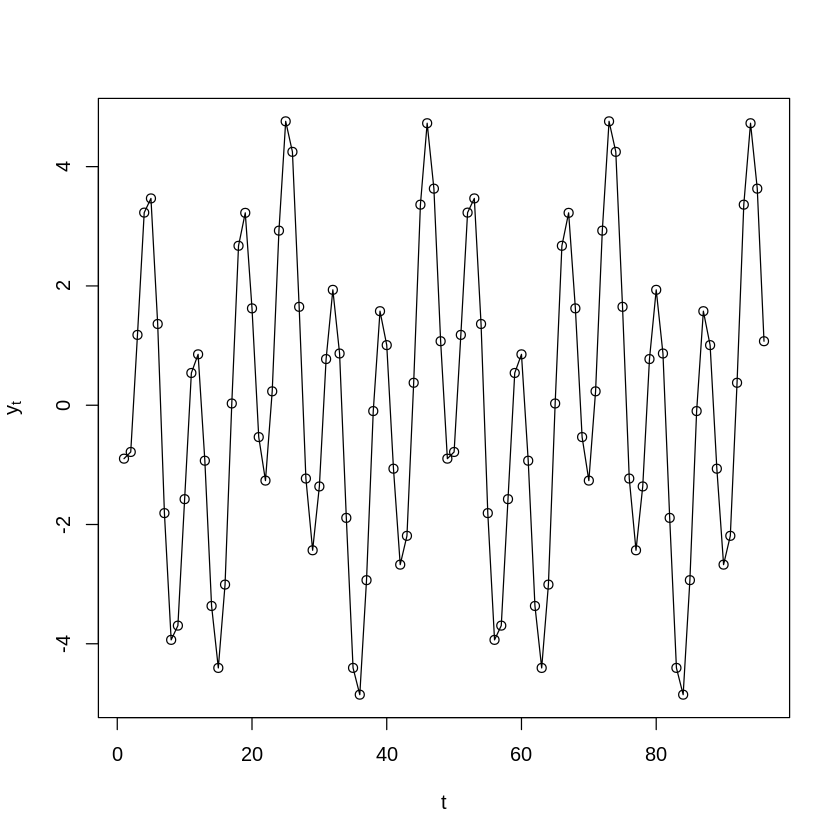

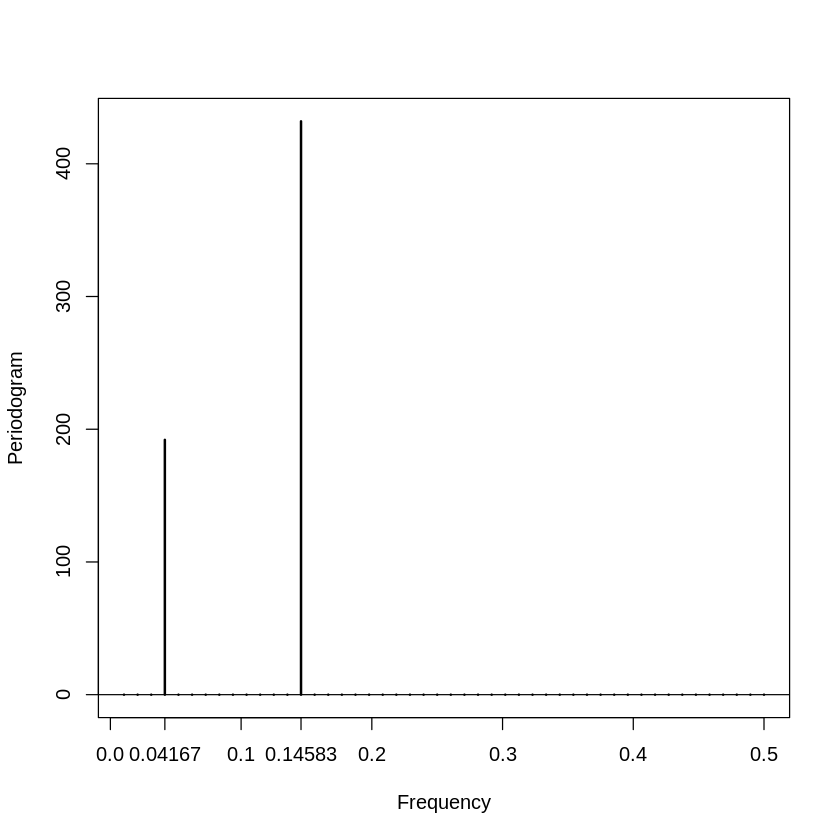

In [ ]:
## Using a second example from TSAAR

t <- 1:96 ## time indices
cos1 <- cos(2*pi*t*4/96) ## 4/96 = 1/24
cos2 <- cos(2*pi*(t*14/96+.3)) ## = cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + sin(2*\pi*0.3) sin(2*pi*(t*14/96)) ;
## f = 14/96 = 7/48

## full series
y=2*cos1+3*cos2
## y = 2 cos(2*pi*t*4/96) + 3 cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + 3 sin(2*\pi*0.3) sin(2*pi*(t*14/96))
plot(t,y,type='o',ylab=expression(y[t]))

## generate the periodogram
periodogram(y)

## add a x-axis line
abline(h = 0)

## add axis labels
axis(1,at=c(0.04167,.14583))

List of 16
 $ freq     : num [1:48] 0.0104 0.0208 0.0312 0.0417 0.0521 ...
 $ spec     : num [1:48] 8.78e-29 7.51e-29 5.35e-29 1.92e+02 2.18e-28 ...
 $ coh      : NULL
 $ phase    : NULL
 $ kernel   : NULL
 $ df       : num 2
 $ bandwidth: num 0.00301
 $ n.used   : int 96
 $ orig.n   : int 96
 $ series   : chr "x"
 $ snames   : NULL
 $ method   : chr "Raw Periodogram"
 $ taper    : num 0
 $ pad      : num 0
 $ detrend  : logi FALSE
 $ demean   : logi TRUE
 - attr(*, "class")= chr "spec"


[1] 0.01041667 0.02083333 0.03125000 0.04166667 0.05208333 0.06250000
 [7] 0.07291667 0.08333333 0.09375000 0.10416667 0.11458333 0.12500000
[13] 0.13541667 0.14583333 0.15625000 0.16666667 0.17708333 0.18750000
[19] 0.19791667 0.20833333 0.21875000 0.22916667 0.23958333 0.25000000
[25] 0.26041667 0.27083333 0.28125000 0.29166667 0.30208333 0.31250000
[31] 0.32291667 0.33333333 0.34375000 0.35416667 0.36458333 0.37500000
[37] 0.38541667 0.39583333 0.40625000 0.41666667 0.42708333 0.43750000
[43] 0.44791667 0.45833333 0.46875000 0.47916667 0.48958333 0.50000000

[1] 8.783450e-29 7.509381e-29 5.345534e-29 1.920000e+02 2.177778e-28
 [6] 5.619360e-28 1.903221e-28 4.095288e-29 9.497746e-29 3.536726e-29
[11] 1.279343e-28 1.405279e-28 6.719125e-28 4.320000e+02 5.873772e-28
[16] 7.068112e-29 1.003380e-28 1.491804e-28 3.650833e-28 9.597808e-30
[21] 1.723564e-28 5.803727e-31 2.685440e-28 8.646244e-29 1.315117e-28
[26] 7.372973e-29 7.364500e-29 6.943619e-29 1.803620e-30 1.973179e-28
[31] 7.658877e-29 1.766720e-31 3.965909e-30 2.061556e-28 3.758522e-28
[36] 9.565887e-29 1.247835e-28 1.349610e-28 5.716152e-29 5.956936e-29
[41] 1.095383e-28 1.284210e-28 5.648860e-29 5.259073e-29 1.688687e-28
[46] 3.305416e-28 7.022202e-28 2.221958e-29

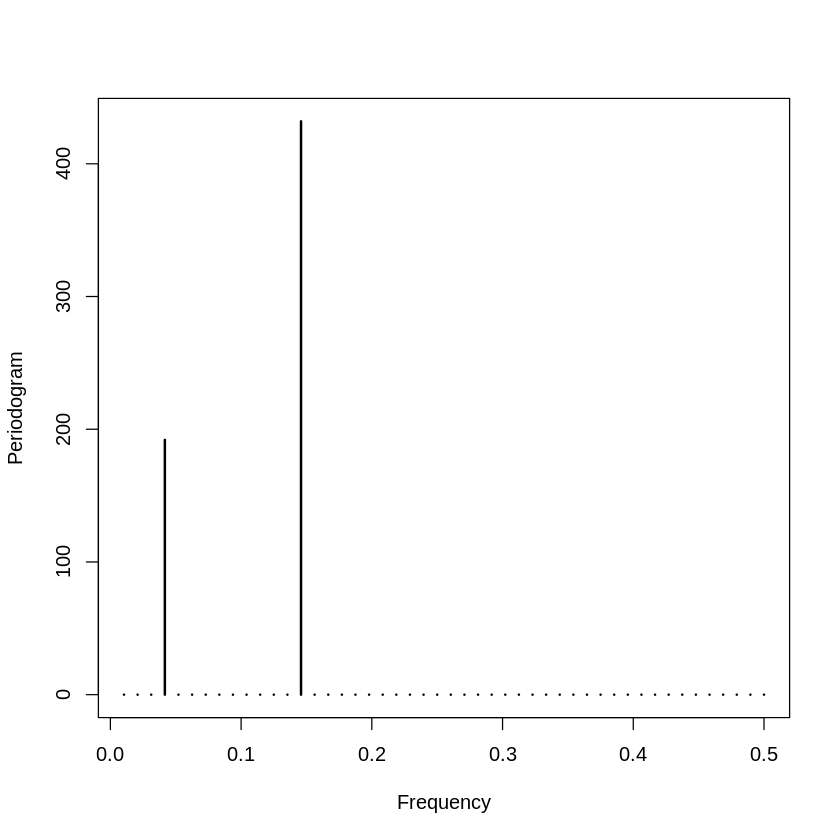

In [ ]:
## How to Extract the periodogram values

## Look at the objects inside the periodogram
str(periodogram(y))

## Frequency
periodogram(y)$freq

## Spectral Value
periodogram(y)$spec

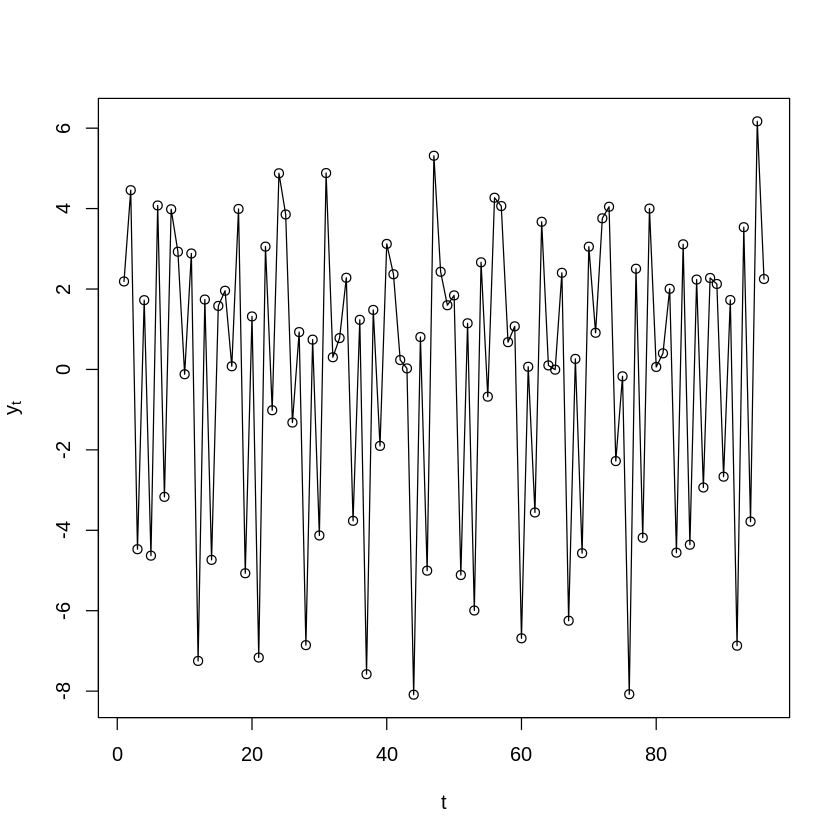

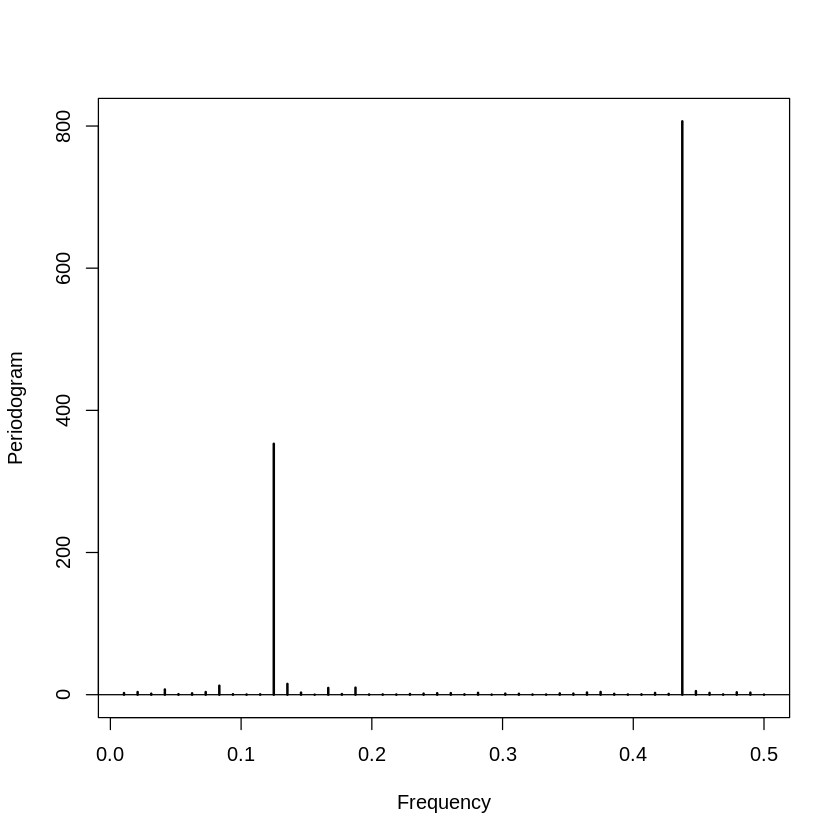

,freq,spec
,<dbl>,<dbl>
12,0.1250,352.9672
42,0.4375,806.5975


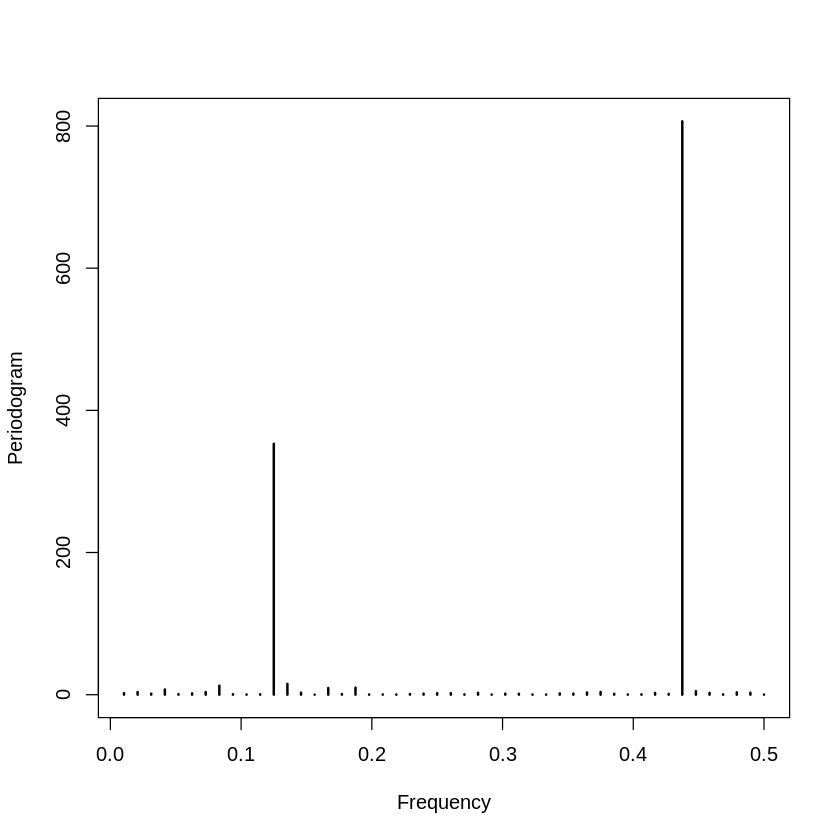

In [ ]:
## Periodogram of Data with Hidden Periodicities

## Time Index
t <- 1:96

## Setting seed for random sample
set.seed(134)

## randomized frequency selected
integer <- sample(48,2)
freq1 <- integer[1]/96
freq2 <- integer[2]/96

## Randomly selecting coefficients
A1 <- rnorm(1,0,2)
B1 <- rnorm(1,0,2)
A2 <- rnorm(1,0,3)
B2 <- rnorm(1,0,3)

## Angle*time
w <- 2*pi*t

## Y Series generated
y <- A1*cos(w*freq1)+B1*sin(w*freq1)+A2*cos(w*freq2)+ B2*sin(w*freq2)+rnorm(96,0,1)

## Plot the data
plot(t,y,type='o',ylab=expression(y[t]))

## Periodogram

periodogram(y)
abline(h=0)

## Data Frame

dat1 <- data.frame(freq = periodogram(y)$freq, spec = periodogram(y)$spec)

dat1[which(dat1$spec > 200),]

From the periodogram, the two spikes seem to have been at $f = 1/8$ with $I(1/8) = 352.97 $ and $f= 7/16$ with $I(7/16) = 806.60 $. The different non-zero periodogram values were by nature of the randomness of the $A$ and $B$ terms.

Let's use a real data from TSAAR, the data on Variable Star Brightness on 600 Consecutive Nights.

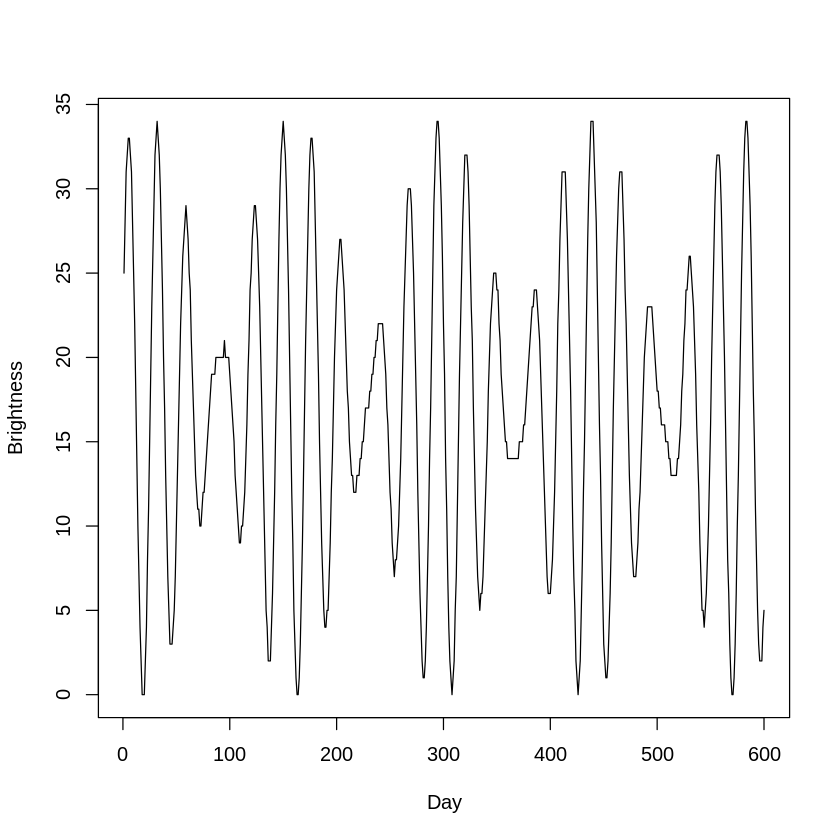

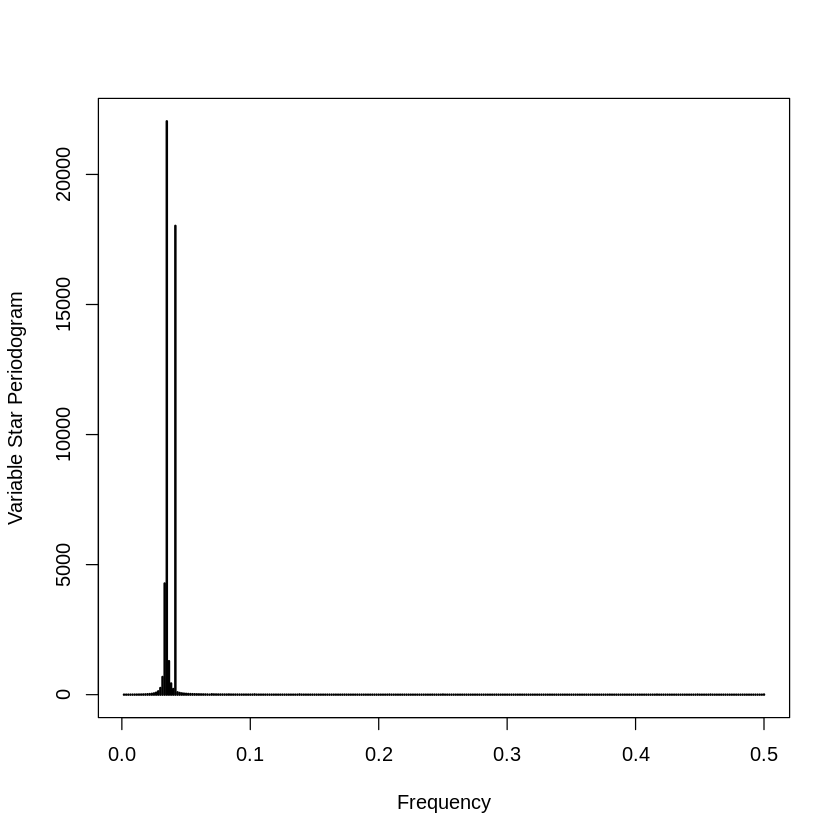

,freq,spec
,<dbl>,<dbl>
21,0.03500000,22041.6
25,0.04166667,18022.0


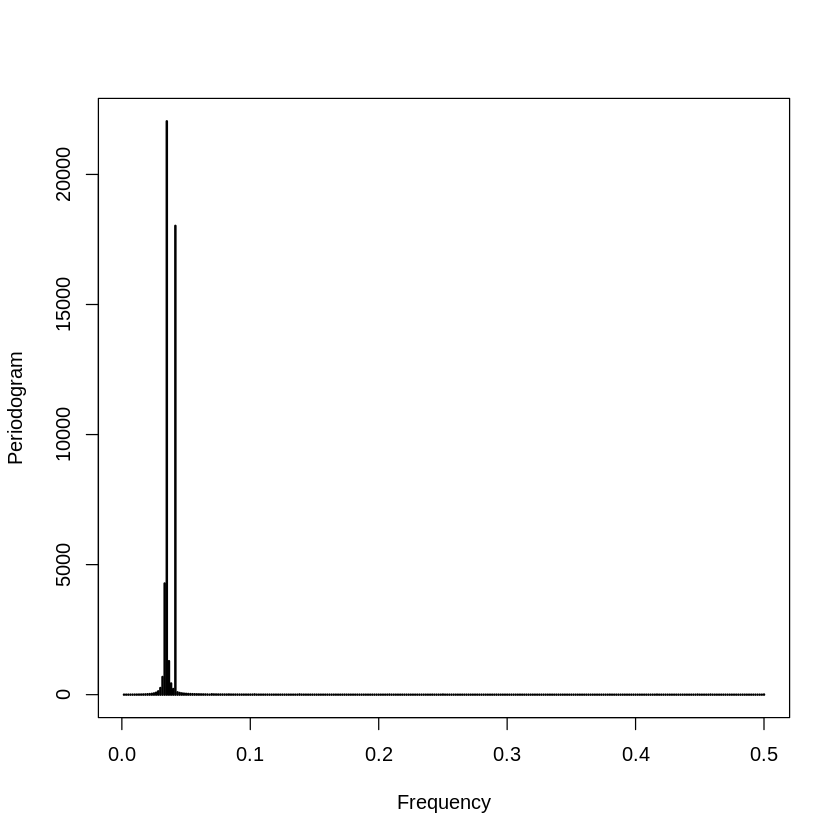

In [ ]:
## Variable Star Brightness on 600 Consecutive Nights Example

## Attach data
data(star)

## Plot data
plot(star,xlab='Day',ylab='Brightness')

## Plot Periodogram
periodogram(star,ylab='Variable Star Periodogram')

## Extract Periodogram Values
periodogram_data <- data.frame(freq = periodogram(star)$freq, spec = periodogram(star)$spec)

## Which frequencies had large peaks
periodogram_data[which(periodogram_data$spec > 15000), ]

## Peaks were at f = 0.035 & f = 0.04166...
## equivalent to 1/f = 1/0.035 = 28.57 or about 29 days, which TSAAR used
## and 1/f = 1/0.04166... = 24 days

In [ ]:
## Running a Harmonic Regression Model with the given frequencies

## Sample Size
n <- length(star)

## Time Index
t <- 1:n

## Frequencies
f1 <- 1/29
f2 <- 1/24

## Sin Cos Pairs
sin1 <- sin( 2*pi* f1 * t)
cos1 <- cos( 2*pi* f1 * t)
sin2 <- sin( 2*pi* f2 * t)
cos2 <- cos( 2*pi* f2 * t)

## Regression Estimation

hm1 <- lm(star ~ sin1+cos1+sin2+cos2)

summary(hm1)

## There is a very high R-Squared of 99.9%, Indicating an almost perfect fit.


Call:
lm(formula = star ~ sin1 + cos1 + sin2 + cos2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60716 -0.23237 -0.01491  0.20676  0.82649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.08580    0.01238  1380.4   <2e-16 ***
sin1         7.98648    0.01755   455.2   <2e-16 ***
cos1         6.06876    0.01753   346.2   <2e-16 ***
sin2         6.84309    0.01754   390.1   <2e-16 ***
cos2        -1.83495    0.01753  -104.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3031 on 595 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 1.313e+05 on 4 and 595 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 194.1, df = 10, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  residuals(hm1)
W = 0.98737, p-value = 4.725e-05


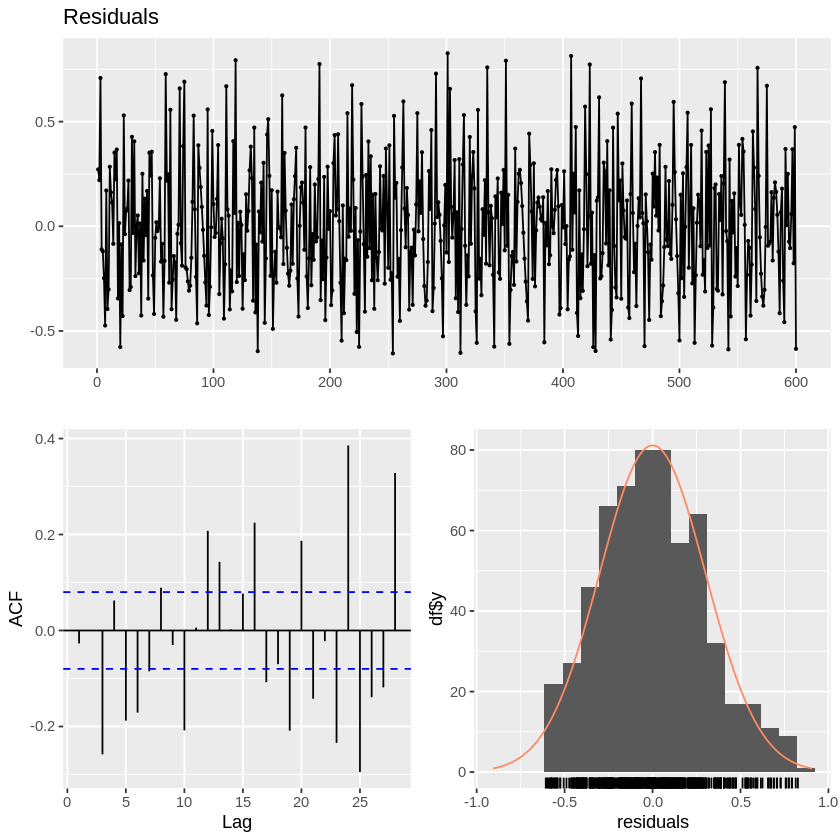

In [ ]:
## Residual Diagnostics

checkresiduals(hm1)
shapiro.test(residuals(hm1))

## There are still some problems with the regression in terms of autocorrelation and normality.
## With normality, we can use robust approaches, but autocorrelation may be indicative of
## other frequencies still being relevant or other time series features being more useful.

We can extend the definition of the period beyond Fourier frequencies to any frequency $0 \le f \le 1/2$:

$$I \left( f \right) =\frac{n}{2} \left( \hat{A}_f^2 + \hat{B}_f^2  \right) $$

where

$$\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi f t \right) \quad , \quad \hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi f t \right) $$

In this method, the frequencies are estimated in finer detail than the Fourier frequencies and generally plotted smoothly.

Comments (TSAAR):
* We only note of positive frequencies $f$ since what can be expressed in $-f$ is also seen in $f$ by the symmetry of sine and cosine functions. Note that later, we will use both negative and positive frequencies because of nice properties.
* We only look at frequencies $0 ≤ f \le 0.5$ to avoid the phenomenon of *aliasing*. This is because if our data is sampled at a frequency $f$, then $f/2$ is its *folding frequency* or *Nyquist frequency* of which in discrete time points, the two frequencies will have similar data points.
* This means that a frequency $f$ may be aliased by another frequency $f + k \times (1/2)$, and thus we limit only for $0 \le f \le 1/2$.

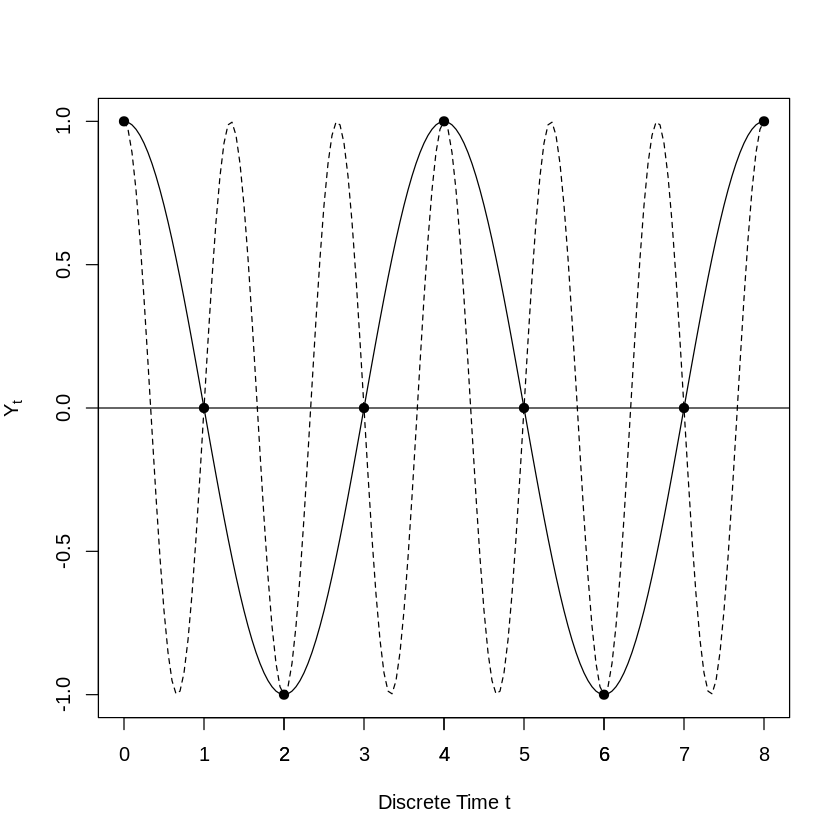

In [ ]:
## Phenomenon of Aliasing (TSAAR)
t <- seq(0,8,by=.05)
plot(t,cos(2*pi*t/4),axes=F,type='l',ylab=expression(Y[t]), xlab='Discrete Time t')
axis(1,at=c(1,2,3,4,5,6,7));axis(1); axis(2); box()
lines(t,cos(2*pi*t*3/4),lty='dashed',type='l'); abline(h=0)
points(x=c(0:8),y=cos(2*pi*c(0:8)/4),pch=19)

## Spectral Representation and Spectral Distribution (TSAAR)

Suppose we have a time series based on the harmonic regression model:

$$Y_t = \sum_{j=1}^m \left[ A_j \cos(2\pi f_j t) + B_j \sin(2\pi f_j t) \right]$$

Except that $A_j, B_j \sim ind. N(0, \sigma_j^2)$. This is described as a *purely discrete spectrum* process, also called a *line spectrum process*.

Then, $E(Y_t) = 0$ and the autocovariance $\gamma_k = Cov(Y_t, Y_{t-k})$ is

$$ \gamma_k = \sum_{j=1}^m \sigma_j^2 \cos(2\pi f_j k) $$

And that the variance of $Y_t$ is equal to the total variances from each frequency since $\cos (0) = 1$:

$$ Var (Y_t) = \gamma_0 = \sum_{j=1}^m \sigma_j^2 $$

Note that we can represent $Y_t$ in terms of stochastic integrals (don't worry, we won't talk about stochastic calculus) called the *spectral representation* such that

$$Y_t = \int_0^{1/2} \cos(2 \pi f t) da(f) + \int_0^{1/2} \sin(2 \pi f t) db(f)$$

Where $a(∘)$ and $b(∘)$ are sums of the random variables:

$$a(f) = \sum_{ \left\{ j | f_j \le f \right\} } A_j \quad , \quad b(f) = \sum_{ \left\{ j | f_j \le f \right\} } b_j $$

In fact, the integral representation can be derived from all zero-mean stationary processes. It implies that any stationary process can be expressed as an infinite sum of sine and cosine functions from different frequencies between 0 and 1/2.

The functions $a(f)$ and $b(f)$ are also zero-mean stationary processes indexed by $0 \le f \le 1/2$ with uncorrelated increments within each function and between the functions.

Another important feature is:

$$Var \left[  \int_{f_1}^{f_2}  da(f) \right] = Var \left[  \int_{f_1}^{f_2}  db(f) \right] = F(f_2) - F(f_1)$$

where $F(\circ)$ is defined as the spectral distribution function, which for a purely discrete spectrum has the formula:

$$ F(f) = \sum_{ \left\{ j | f_j \le f \right\} } \sigma^2_j $$

The properties of spectral distribution function $F(\circ)$ are:

1. F is monotone nondecreasing: for $f_1 < f_2$, $F(f_1) \le F(f_2)$.
2. F is right continuous: $lim_{x → f^+} F(x) = F(f)$.
3. $lim_{x → 1/2} F(x) = Var(Y_t) = \gamma_0$

Note that we can have a CDF if we consider the scaled function $F(f)/\gamma_0$.

The spectral distribution can be interpreted as follows: for $ 0\le f_1 < f_2 \le 1/2$,

$$\int_{f_1}^{f_2} dF(f) $$

describe the magnitude (not proportion) of $Var(Y_t) = F(1/2) = \gamma_0$ that is attributable for the frequencies $f_1$ to $f_2$

## Spectral Density (TSAAR)

### Sample Spectral Density

From hereon out, we assume $Y_t$ is a zero-mean stationary process without loss of generality, e.g., $Y_t = Y_t^* - \mu^*$ where $ Y_t^*$ is a stationary proces with mean $ \mu^* = E( Y_t^*)$.

Also for mathematical convenience, from hereon we will assume that all function with frequencies as inputs like the periodogram $I(f)$ is defined with domain $(-1/2, 1/2]$ of which the periodogram is symmetric at the vertical axis anyway, i.e., $I(|f|)=I(f)$.

The *sample spectral density* or *sample spectrum* is defined as:

$$\hat{S}(f) = \frac{1}{2} I(f) \quad, \quad f \in (-1/2, 1/2)$$
$$ \hat{S}(1/2) = I(1/2)$$

Alternatively, we can express the sample spectral density in terms of the autocovariance values of $Y_t$, a special case of the *Wiener-Khinchin theorem*.

$$\hat{S}(f) = \hat{\gamma}_0 + 2 \sum_{k=1}^{n-1} \hat{\gamma}_k \cos (2 \pi k f) $$

where
$$\hat{\gamma}_k = \frac{1}{n} \sum_{t= k+1}^{n} (Y_t -\bar{Y}) (Y_{t-k} -\bar{Y}) $$

In Fourier analysis, there is an inverse relationship between $S(f)$ and $\gamma_k$:

$$\hat{\gamma}_k  = \int_{-1/2}^{1/2} \hat{S}(f) \cos (2 \pi k f) df$$

In particular, at $k=0$ the sample spectral density has the sample variance as its total area:

$$\hat{\gamma}_0  = \int_{-1/2}^{1/2} \hat{S}(f) df =  \frac{1}{n} \sum_{t= 1}^{n} (Y_t -\bar{Y})^2 $$

Comment:
* This means that the spectral density and the autocovariance (and autocorrelation) functions have similar information.
* In some situations, the autocovariance function may be preferable, in other situations, the spectral density is preferred. However, both still give the same information.


### Theoretical (or Population) Spectral Density

We define the theoretical or population spectral density of a zero-mean stationary process for $-1/2 < f \le 1/2$ as

$$ S(f)= \gamma_0 + 2 \sum_{k=1}^{\infty} \gamma_k \cos (2 \pi k f) = \sum_{k=-\infty}^{\infty} \gamma_k e^{-2 \pi i k f} $$

where $i = \sqrt{-1}$ And the inverse to generate the population autocovariance function $\gamma_k$ is

$${\gamma}_k  = \int_{-1/2}^{1/2} {S}(f) \cos (2 \pi k f) df = \int_{-1/2}^{1/2} {S}(f)  e^{-2 \pi i k f}  df$$

Also note that the spectral density is related to the spectral distribution function:

$$ F(f) = \int_0^f S(f) df \quad , \quad 0 \le f \le 1/2$$

Thus, $ 2 \int_{f_1}^{f_2} S(f) df =$ portion (not proportion) of variance attributed to the sine-cosine pairs with associated frequencies from $f_1$ to $f_2$.

Note:
* For stationary processes, $\gamma_k = \gamma_{-k}$; there is symmetry in the autocovariance function.
* the far-right sums in the spectral density and autocovariance function are used in signal processing and harmonic analysis, especiall physics and engineering.






### Time-Invariant Linear Filter

A *time-invariant linear filter* is a sequnece of absolutely summable constants $\{c_j\}_{j=-\infty}^{+\infty} = \{..., c_{-2}, c_{-1}, c_0, c_1, c_2,... \}$ such that for a time series $X_t$ a new filtered time series $Y_t$ by the equation:

$$ Y_t = \sum_{j = -\infty}^{+\infty} c_j X_{t-j} \quad , \quad  \sum_{j = -\infty}^{+\infty} |c_j| < \infty $$

Comment:
* The summation $c_j$ and $X_t$ in the filter is often called the *discrete convolution*

* Examples of linear filters: centered $(2m+1)$-term moving average filter where $c_j = \frac{1}{2m+1}$ for $j= -m, -m+1,...,-1,0,1,..., m-1, m$ amd $c_j = 0$ otherwise

$$ Y_t^{[centered]} =  \sum_{j = -m}^{m} \frac{1}{2m+1} X_{t-j} $$

* If $c_j = 0$ for $j < 0$, then the filter is *causal*, meaning the filtering will involve present and past values and without use of future values of $X_t$

* Example of causal filter: AR(1) process with $c_j = \phi^j$ for $j \ge 0$

$$Y_t - \phi Y_{-1} = \epsilon_t  ⇒ Y_t = \frac{1}{1- \phi B} \epsilon_t ⇒ Y_t = \sum_{j=0}^{\infty} \phi^j \epsilon_{t-j} $$

* In fact, stationary $SARMA(p,q)\times(P,Q)_m$ processes are causal filters; for $Y_t \sim SARMA(p,q)\times(P,Q)_m$:

$$ Y_t = \sum_{j=0}^{\infty} \psi_j \epsilon_{t-j} $$
$$\psi_j: \psi(B) = \sum_{j=0}^{+\infty} \psi_j B^j = \frac{\left( 1 + \sum_{j=1}^{q} \theta_j B^j \right) \left( 1 + \sum_{j=1}^{Q} \Theta_j B^{mj} \right) }{ \left( 1 - \sum_{j=1}^{p} \phi_j B^j \right) \left( 1 - \sum_{j=1}^{P} \Phi_j B^{mj} \right) } \quad , \quad \sum_{j=0}^{\infty} |\psi_j| < \infty $$

* $\psi_j$ in the preceding equation is known as the *impulse response function* at $j$. $\psi_0 = 1$.




### Spectral Densities of ARMA Processes

Suppose we have a time-invariant linear filter with coefficients $\{ c_j \}_{-\infty}^{+\infty}$ and let $X_t$ be a stationary time series and $Y_t$ is the filtered time series of the form

$$ Y_t = \sum_{j = -\infty}^{+\infty} c_j X_{t-j}$$

In addition, let $C(z) = \sum_{j = -\infty}^{+\infty} c_j z^{ j }$, so

$$C\left(e^{-2 \pi i f } \right) = \sum_{j = -\infty}^{+\infty} c_j e^{-2 \pi i f j }$$

Then to solve the spectral density of $Y_t$ given the spectral density of $X_t$ with linear filter $\{ c_j \}_{-\infty}^{+\infty}$, the formula is (TSAAR)

$$S_Y (f) = \left| C\left(e^{-2 \pi i f } \right) \right|^2 S_X (f)$$

Comment:
* The function $ \left| C\left(e^{-2 \pi i f } \right) \right|^2$ is often called the *(power) transfer function* of the filter.




#### White Noise Process

Recall that

$$ S(f)= \gamma_0 + 2 \sum_{k=1}^{\infty} \gamma_k \cos (2 \pi k f) $$

But since white noise time series $\epsilon_t  \sim iid. N(0,\sigma_\epsilon^2)$ has $\gamma_k = 0$ for $k>0$ and $\gamma_0 = \sigma_\epsilon^2$, then

$$ S(f)= \sigma_\epsilon^2 $$

which means that every frequency contributes equally. In terms of light, every frequency of color shines equally, thus the color white. So THAT WHY IT'S WHITE NOISE LOL.

#### The Property of Spectral Densities of ARMA (TSAAR)

If $Y_t \sim SARMA(p,q)\times(P,Q)_m$ process with white noise $\epsilon_t  \sim iid. N(0,\sigma_\epsilon^2)$, then the spectral density is

$$S_Y (f) = \sigma_\epsilon^2  \left| \psi \left(e^{-2 \pi i f } \right) \right|^2$$
$$\psi \left(e^{-2 \pi i f } \right) = \sum_{j = 0}^{+\infty} \psi_j e^{-2 \pi i f j }$$




##### Spectral Density of MA(1)

Suppose we have an $Y_t \sim MA(1)$, given by

$$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1}$$

Its associated $\psi(z)$ function is

$$\psi(z) = 1 + \psi_1 z= 1 +  \theta_1  z \quad , \quad \psi_1 = \theta_1$$

And thus the spectral density is derived as follows:

$$S_Y (f) = \sigma_\epsilon^2  \left| \psi \left(e^{-2 \pi i f } \right) \right|^2 = \sigma_\epsilon^2  \left| 1 +  \theta_1  e^{-2 \pi i f }   \right|^2 $$

By definition of absolute value of complex numbers

$$ S_Y (f) = \sigma_\epsilon^2 \left[\sqrt{ \left( 1 +  \theta_1  e^{-2 \pi i f } \right) \left( 1 +  \theta_1  e^{2 \pi i f } \right) } \right]^2$$

The square and square root cancel each other and we do the operations inside

$$ S_Y (f) = \sigma_\epsilon^2 \left[ 1 + \theta_1 \left( e^{2 \pi i f } + e^{-2 \pi i f } \right) + \theta_1^2  \right]$$

And the mathematical equality $\cos (x) =\frac{e^{ix} + e^{-ix}}{2}$, we finally get

$$ S_Y (f) = \sigma_\epsilon^2 \left[ 1 + 2 \theta_1 \cos (2 \pi f)  + \theta_1^2  \right]$$

Note:

* I will not be showing how the next ARMA examples are derived.

Now, let's show some of the example $MA(1)$ spectra at $\theta_1 = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

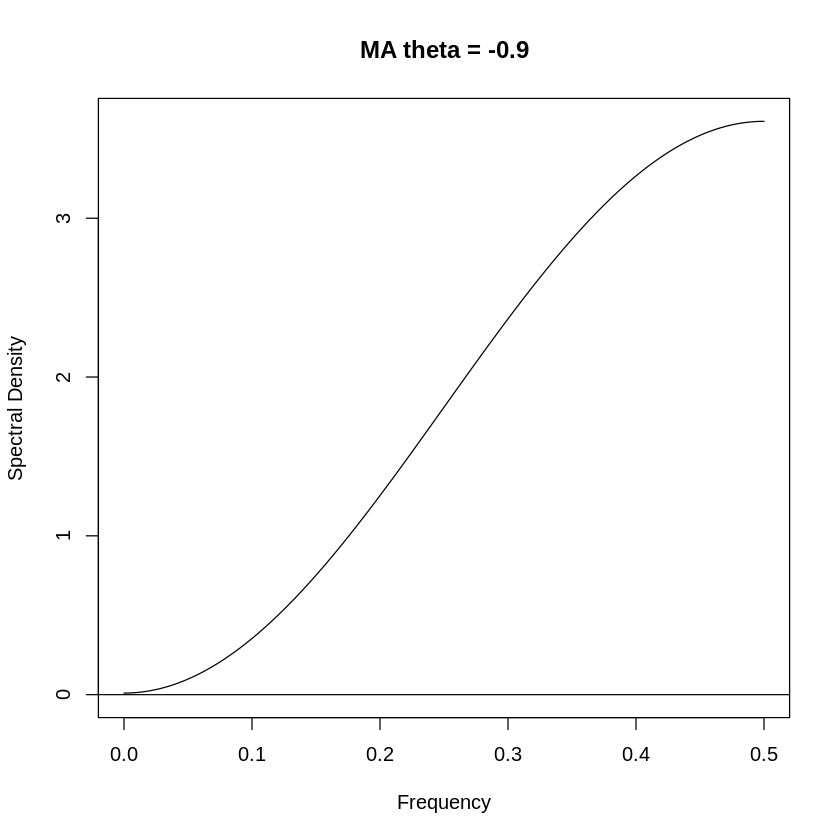

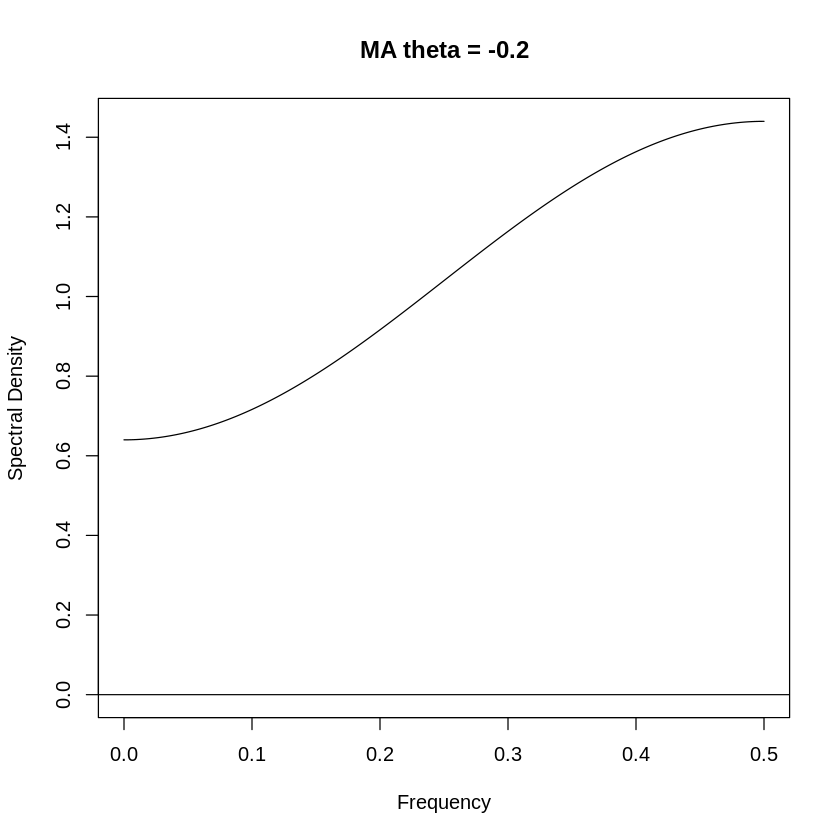

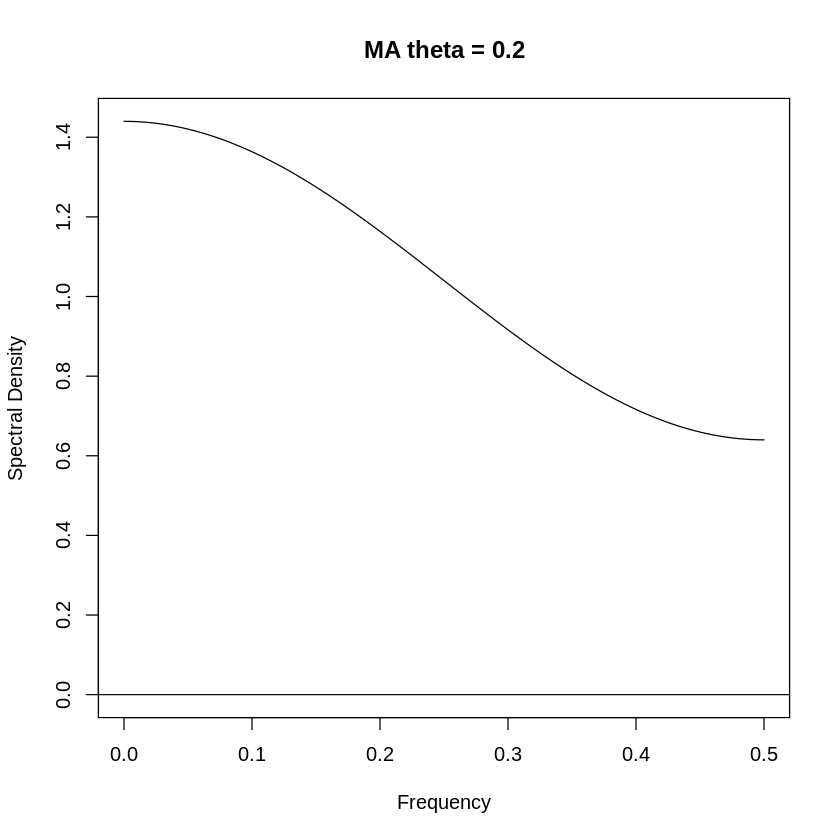

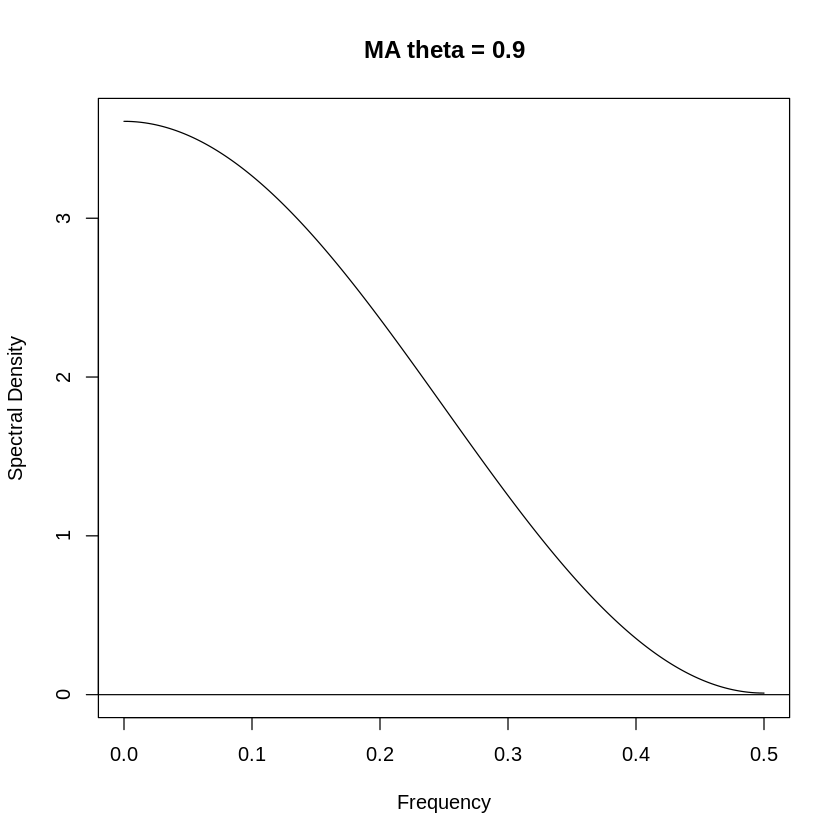

In [ ]:
## Sample of MA Spectra

## Sample thetas
theta <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ma = theta[i]  # MA Parameter
                      ),
          main = paste0("MA theta = ", theta[i]) ## Title of plot
  )
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

Note:

* As can be seen in the plots, negative MA parameters have higher density in the higher frequencies. This is because with negative MA terms, the time series tends to fluctuate from negative to positive and vice-versa very fast, and thus indicating stronger high frequency fluctuations.

* When the MA parameter is close to zero, which is closer to white noise, it seems flatter.

* When the MA parameter is positive, the low frequency spectral values are higher. This is because positive MA terms means higher persistence of shocks or errors from the past. Thus, change may be slow and thus low frequency bands are more pronounced.

##### Spectral Density of AR(1)

For AR(1), the solution is:

$$S_Y (f) = \frac{\sigma_\epsilon^2}{1 + \phi^2 -2\phi \cos(2 \pi f)}$$

Now, let's show some of the example $AR(1)$ spectra at $\phi = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

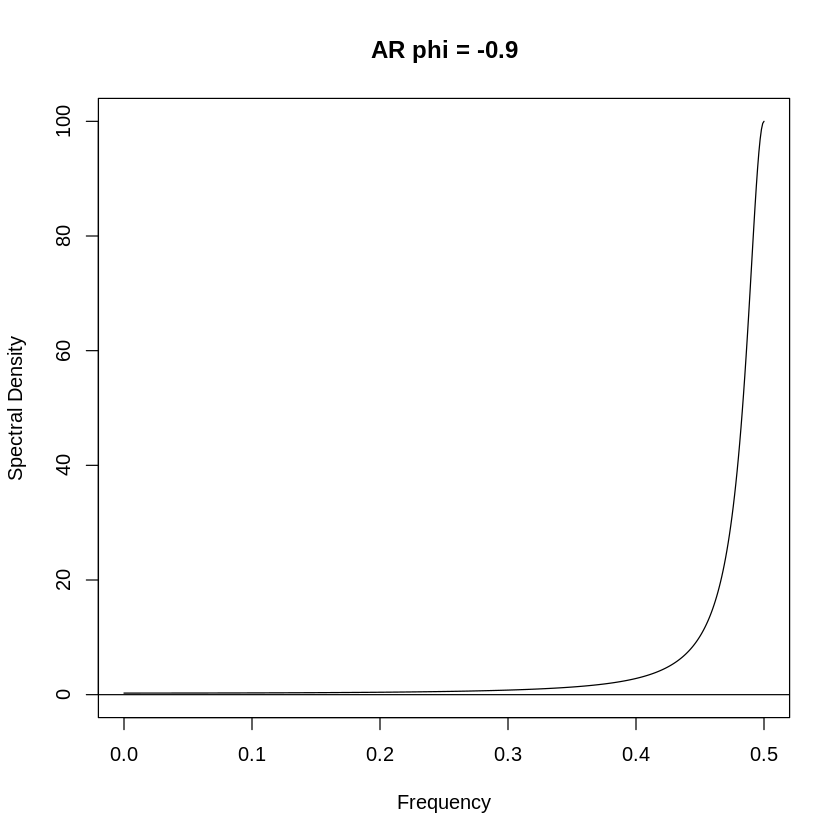

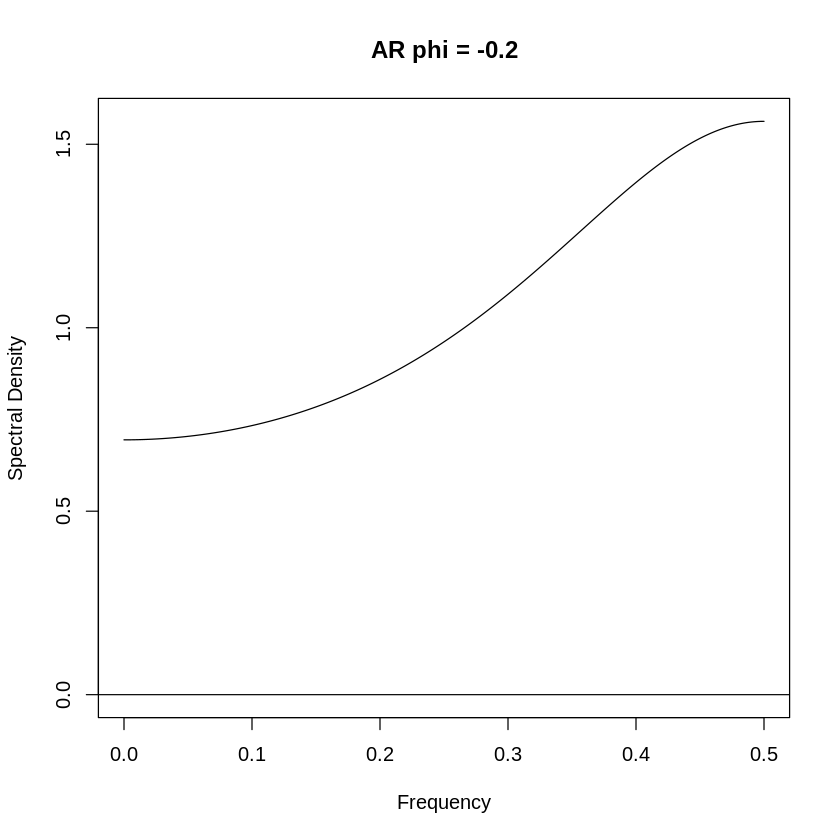

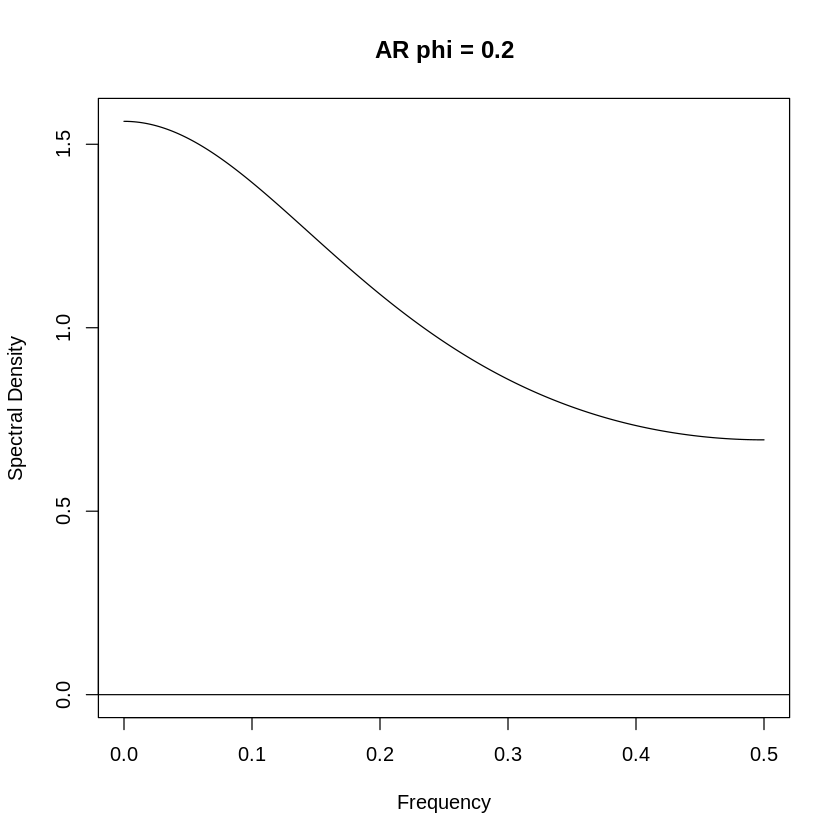

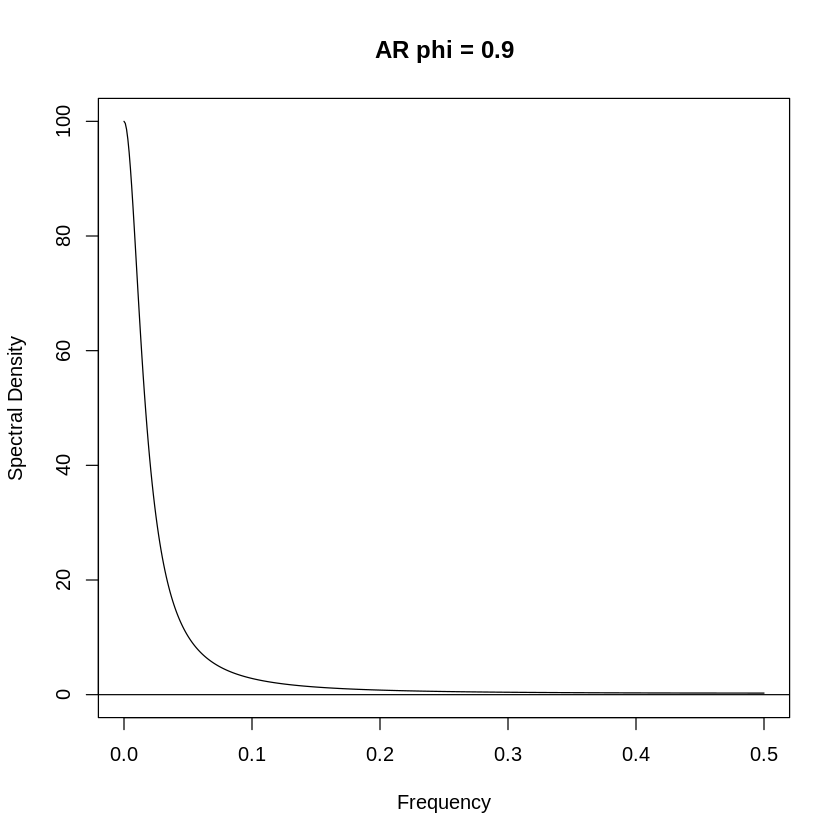

In [ ]:
## Sample of AR Spectra

## Sample phis
phi <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ar = phi[i]  # AR Parameter
                      ),
          main = paste0("AR phi = ", phi[i]) ## Title of plot
  )
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

##### Spectral Density of ARMA(1,1)

For ARMA(1,1), the solution is:

$$S_Y (f) = \frac{\sigma_\epsilon^2 \left[ 1 + 2 \theta_1 \cos (2 \pi f)  + \theta_1^2  \right] }{1 + \phi^2 -2\phi \cos(2 \pi f)}$$

Now, let's show some of the example $ARMA(1,1)$ spectra with combinations from $\phi = -0.9, -0.2, 0.2,$ and $ 0.9$ and $\theta = -0.9, -0.2, 0.2,$ and $ 0.9$. We assume in these plots that $\sigma_\epsilon^2  = 1$

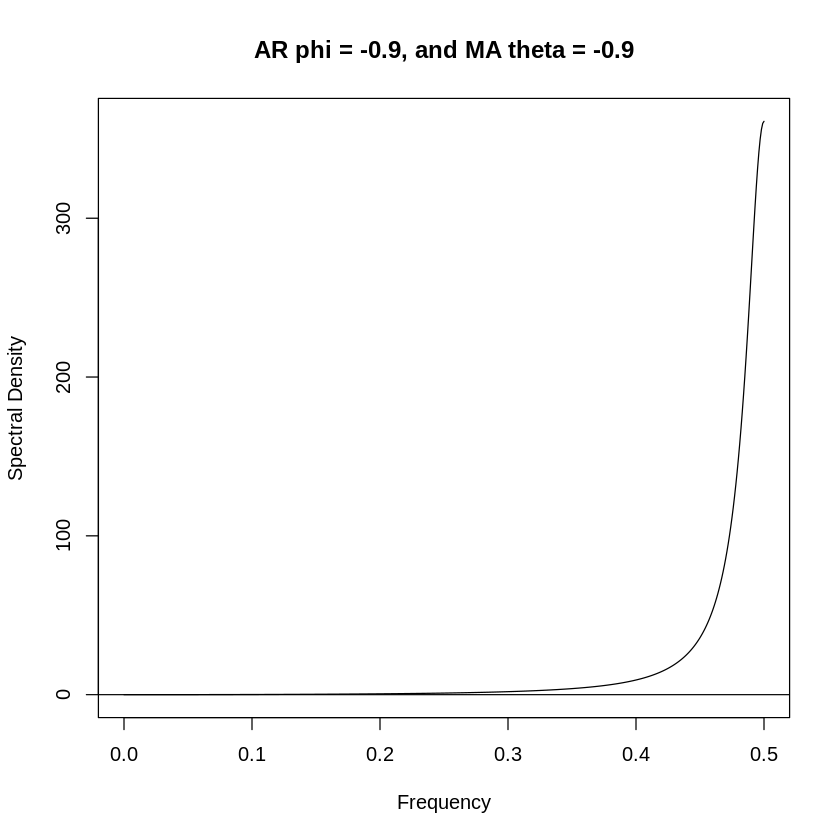

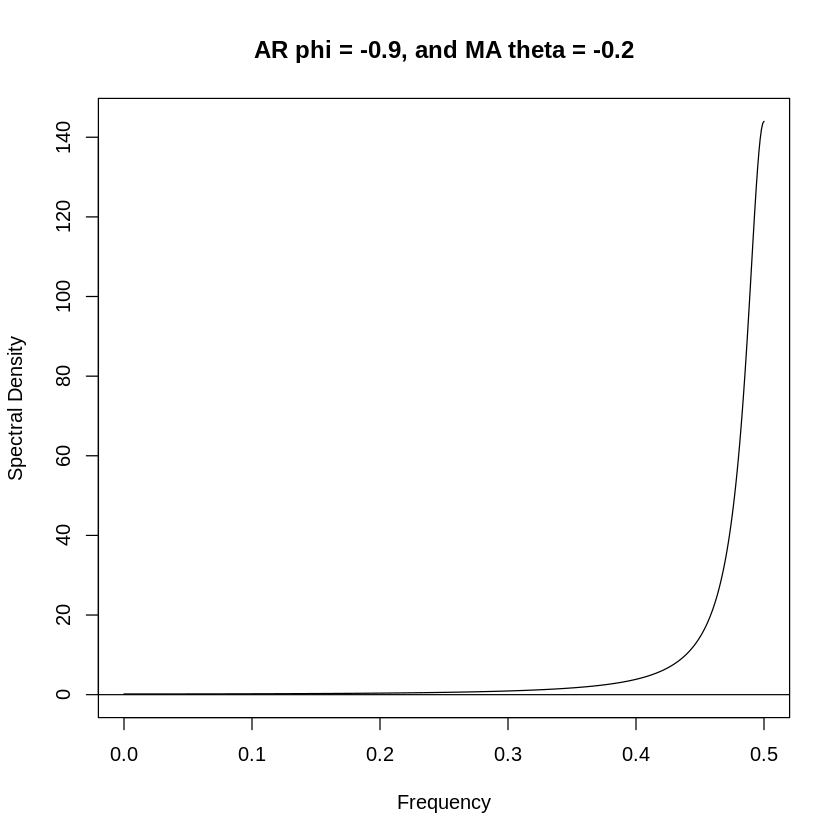

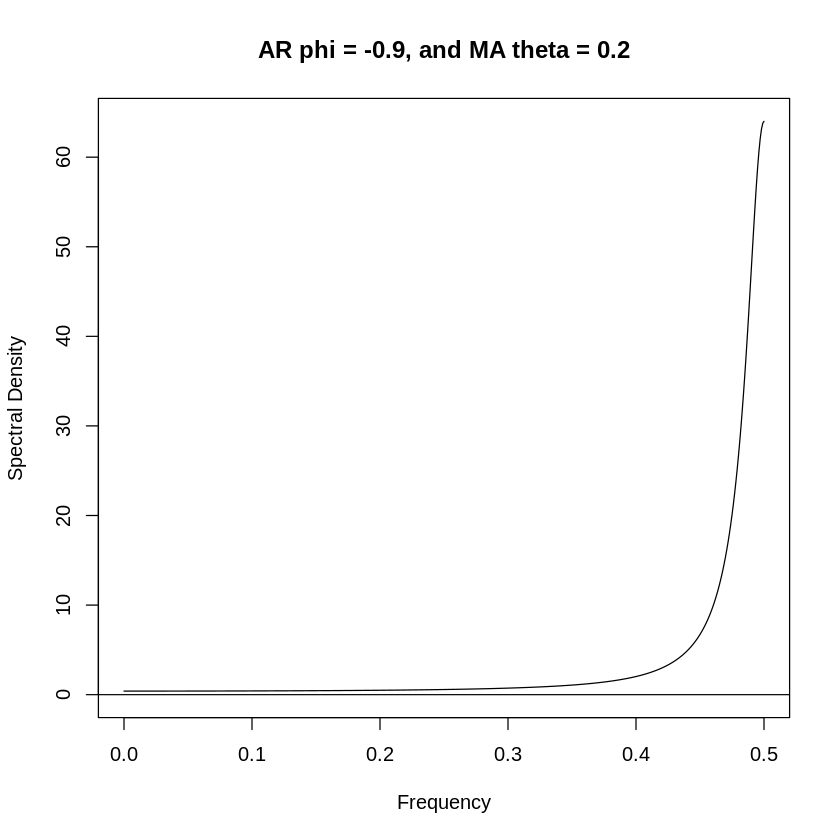

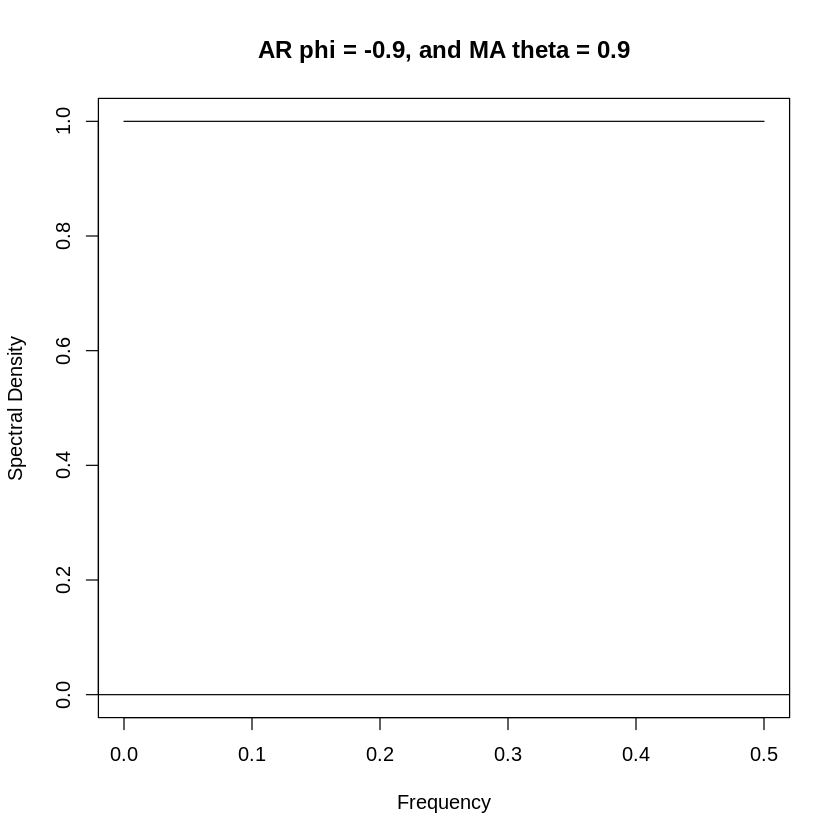

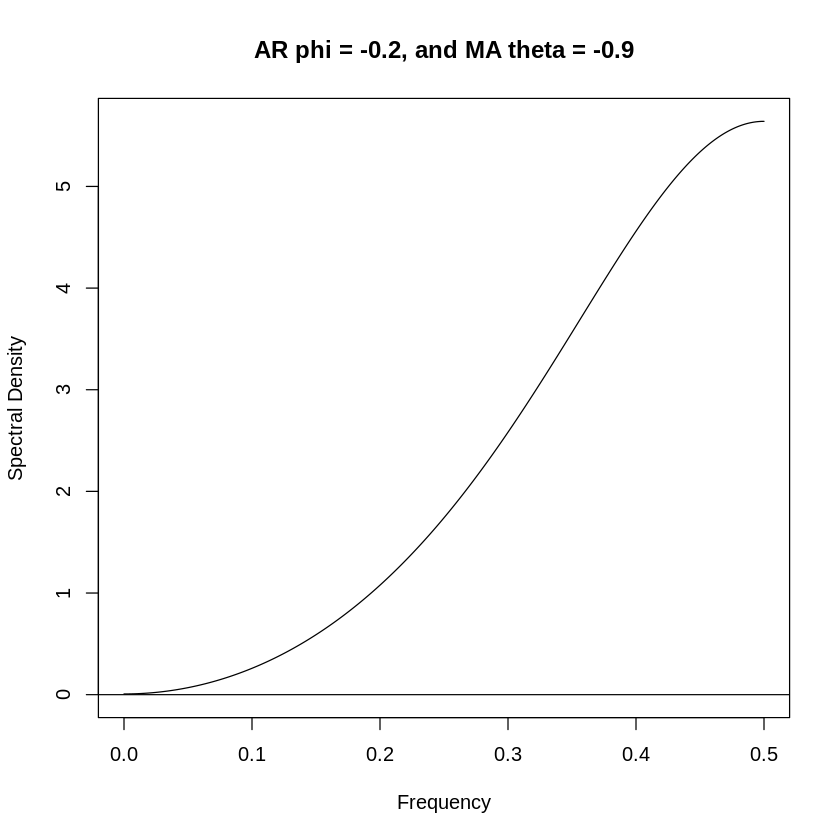

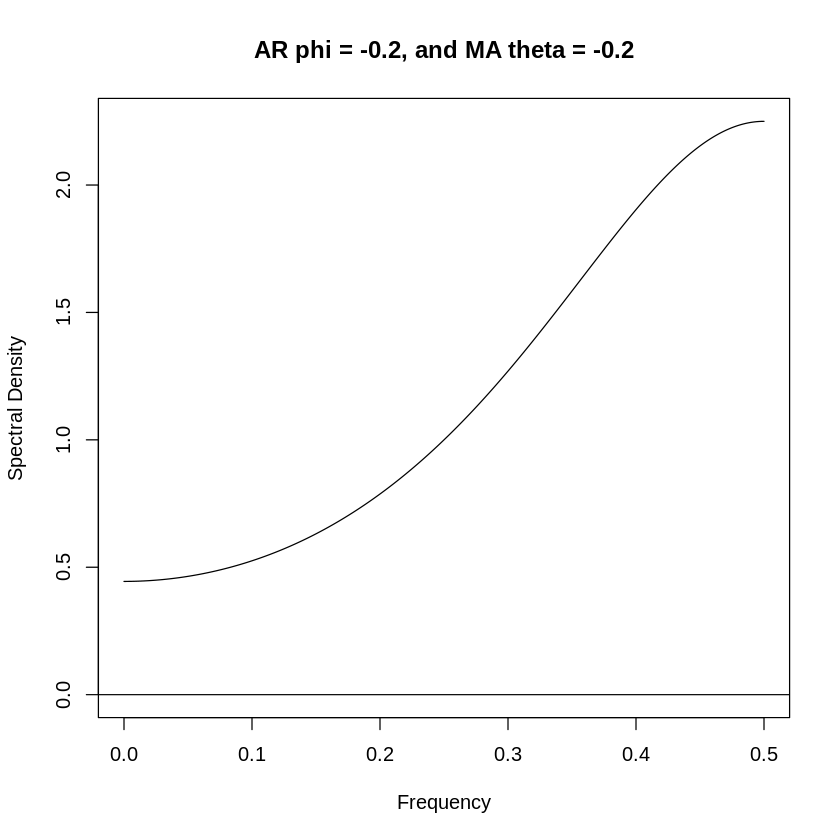

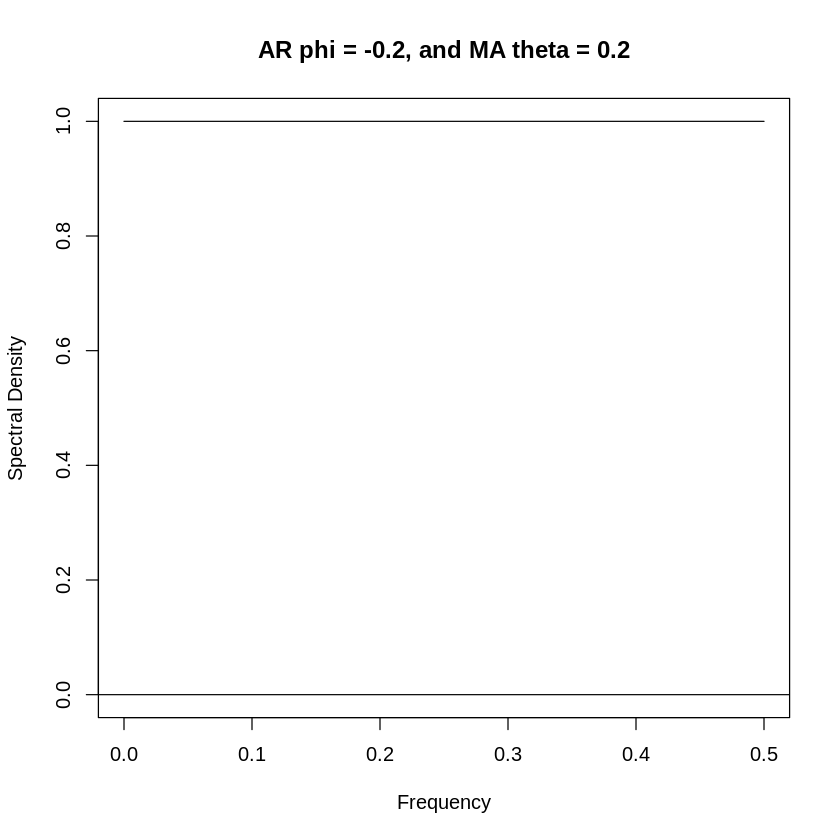

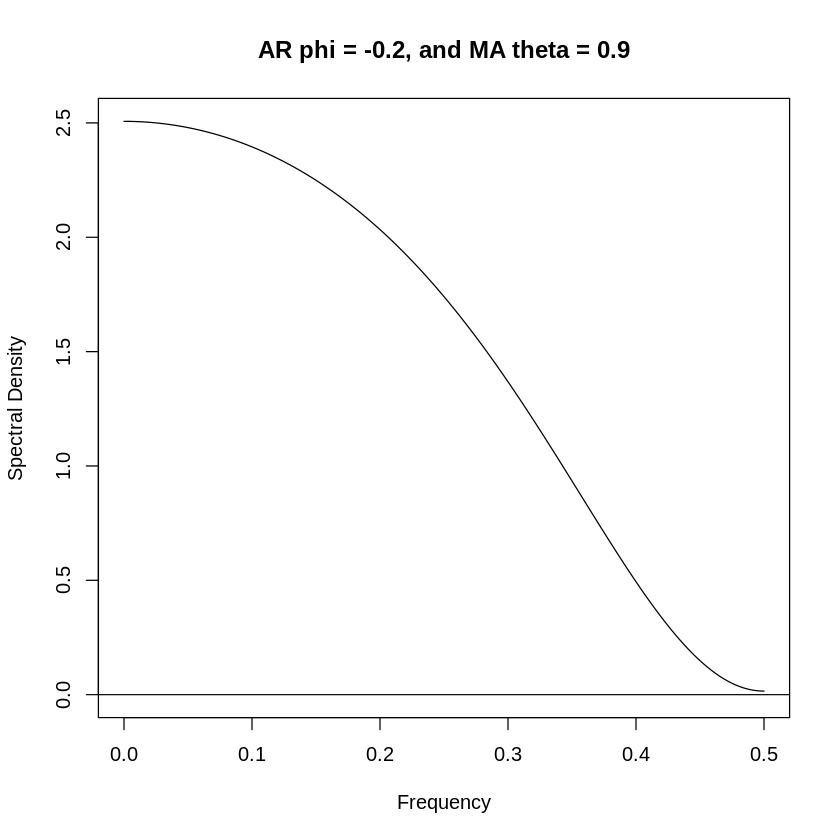

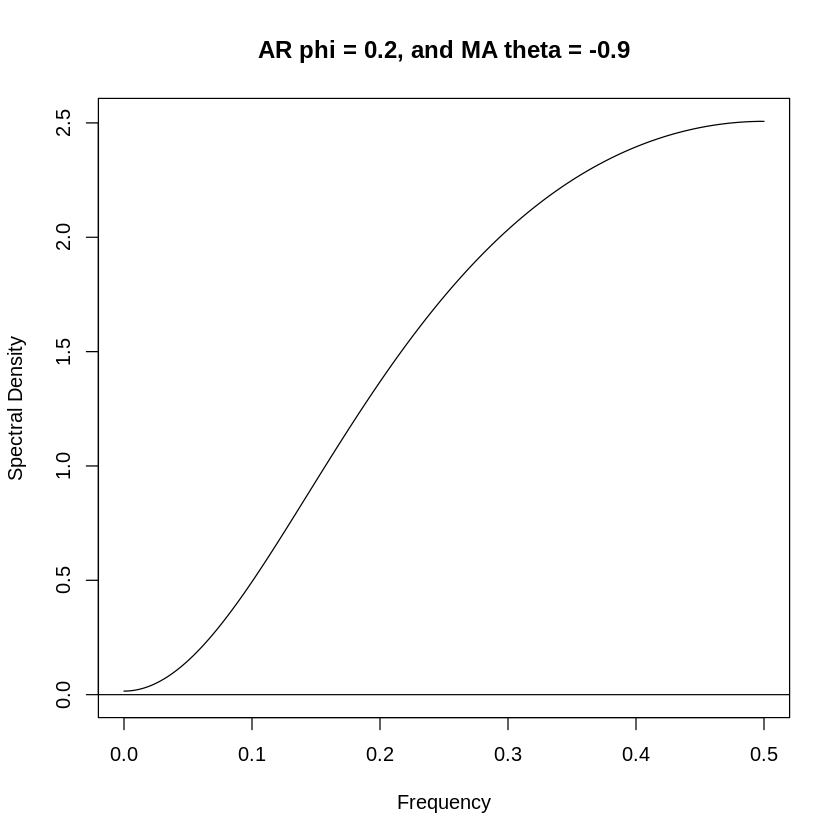

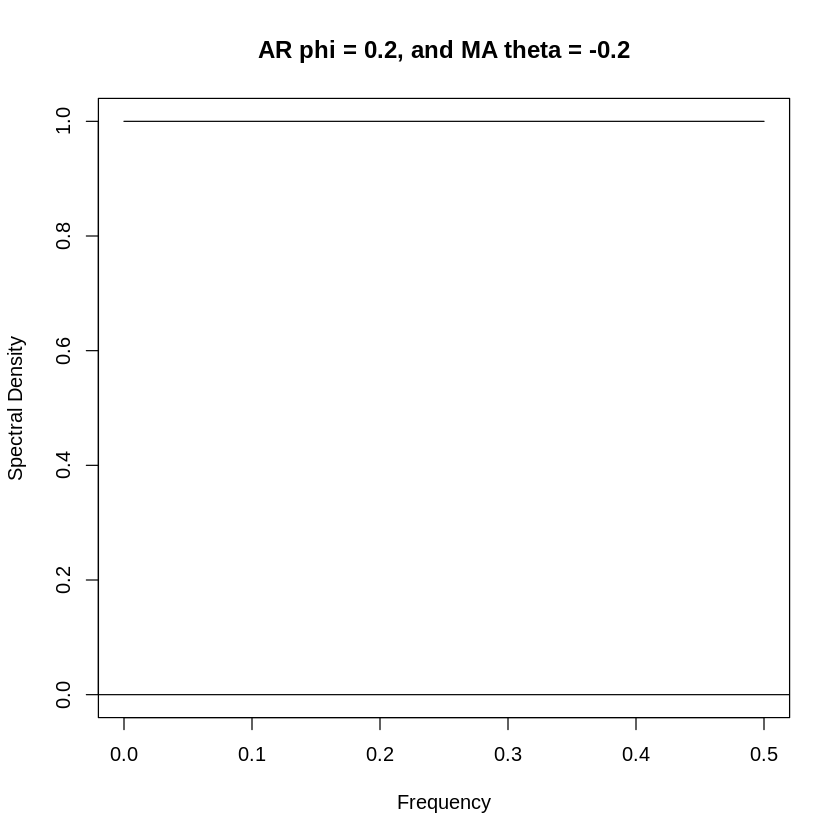

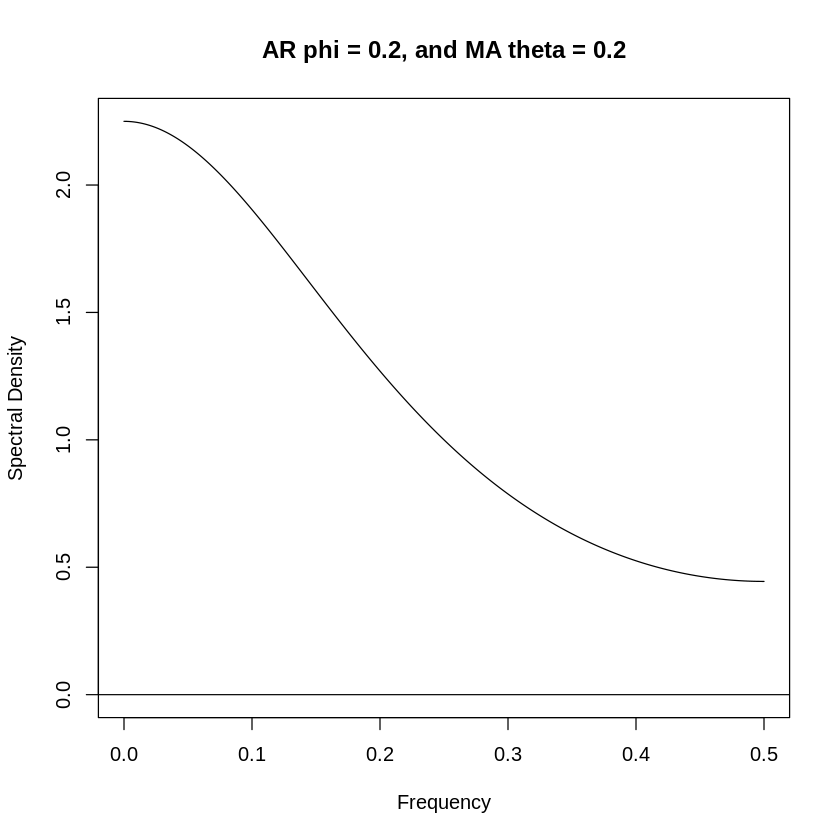

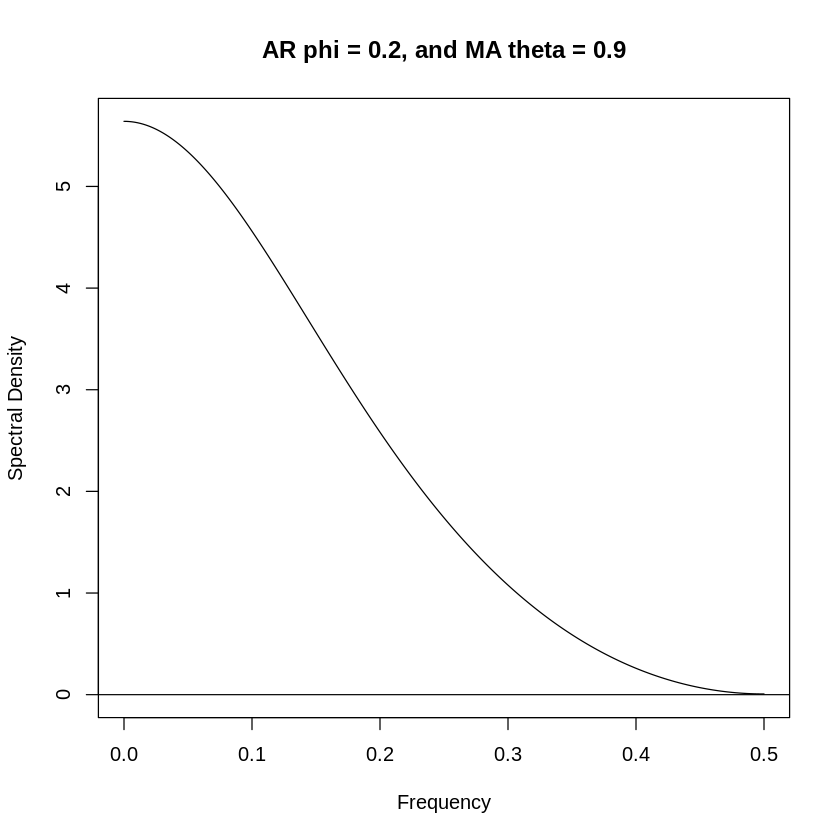

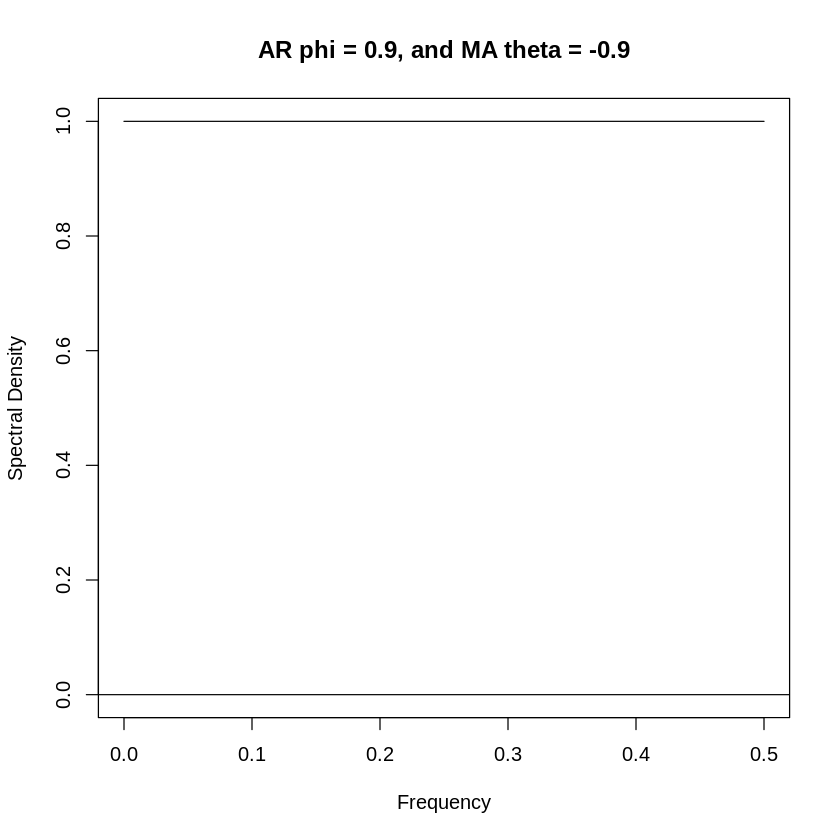

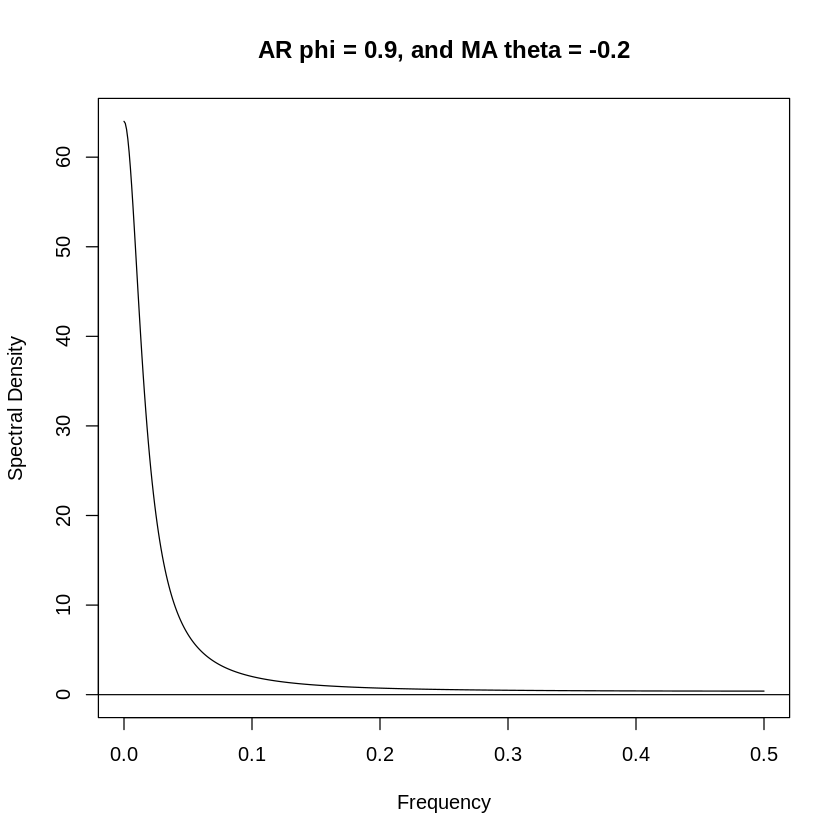

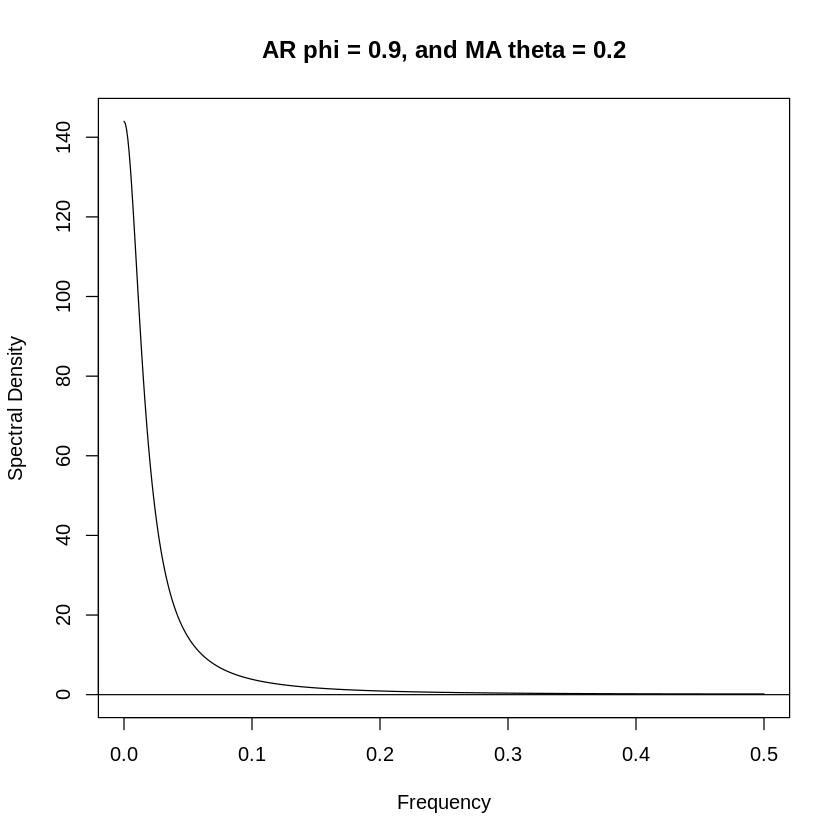

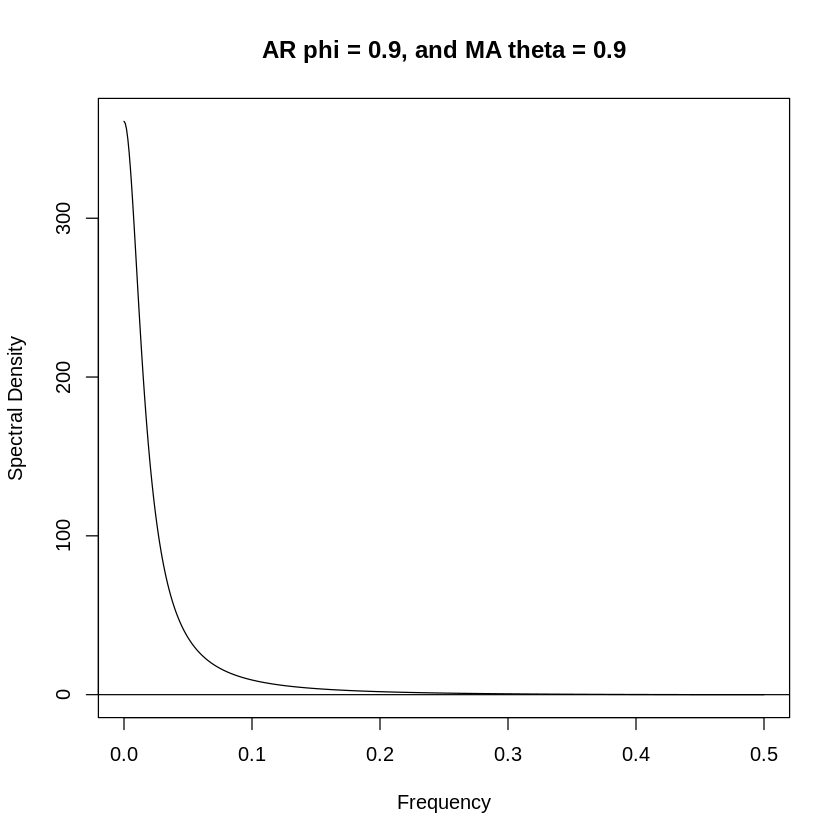

In [ ]:
## Sample of AR Spectra

## Sample phis
phi <- c( -0.9, -0.2, 0.2, 0.9)

## Sample thetas
theta <- c( -0.9, -0.2, 0.2, 0.9)

## Display all plots

for (i in 1:4) {
  for (j in 1:4) {
  ARMAspec(  ## function for displaying ARMA spectra
          model = list( # Model specification in the form of a list
                       ar = phi[i],  # AR Parameter
                       ma = theta[j]
                      ),
          main = paste0("AR phi = ", phi[i], ", and MA theta = ", theta[j]) ## Title of plot
  )
  }
}

## Note: I think there is a problem in TSAAR's display, which I have corrected.

##### Spectral of SARMA(1,0)x(1,0)m

The solution is

$$S_Y (f) = \frac{\sigma_\epsilon^2}{\left[ 1 + \phi^2 -2\phi \cos(2 \pi f) \right] \left[ 1 + \Phi^2 -2\Phi \cos(2 \pi m f) \right] }$$

We will show 1 example only: when $\phi = 0.5$, $\Phi = 0.9$, and $m = 12$

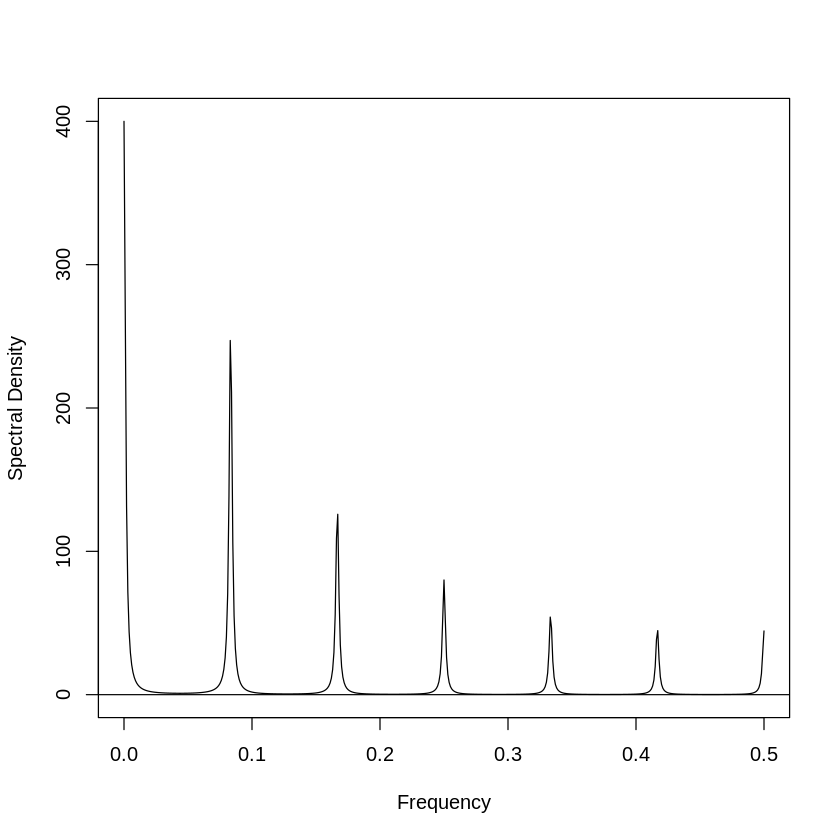

In [ ]:
phi=.5; PHI=.9
ARMAspec(model=list(ar=phi,seasonal=list(sar=PHI,period=12)))

The spikes are in the Fourier frequencies of the seasonality $m$: $f=0/m , 1/m,..., 1/2$.

##### Spectral of SARMA(0,1)x(0,1)m

The solution is

$$S_Y (f) =\sigma_\epsilon^2 \left[ 1 + 2 \theta \cos (2 \pi f)  + \theta^2  \right] \left[ 1 + 2 \Theta \cos (2 \pi m f)  + \Theta^2  \right]$$

We will show 1 example only: when $\theta = 0.4$, $\Theta = 0.9$, and $m = 12$

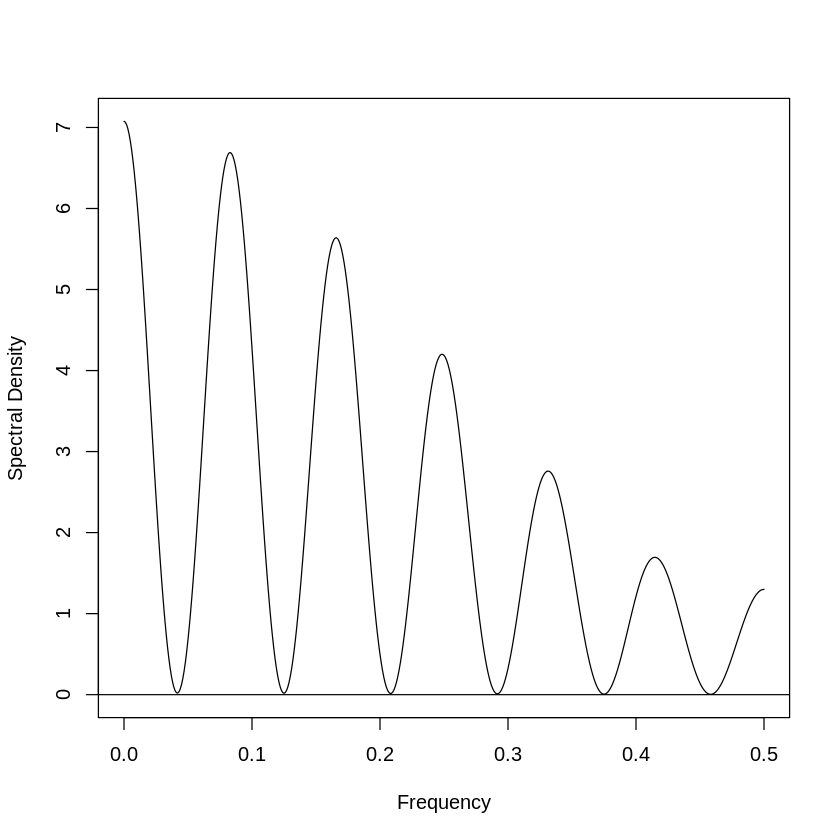

In [ ]:
theta=.4; Theta=.9
ARMAspec(model=list(ma=theta,seasonal=list(sma=Theta,
period=12)))

### Sample Properties of the Sample Spectral Density (TSAAR)

Let's show a sample simulation of an AR(1) process with its theoretical spectrum.

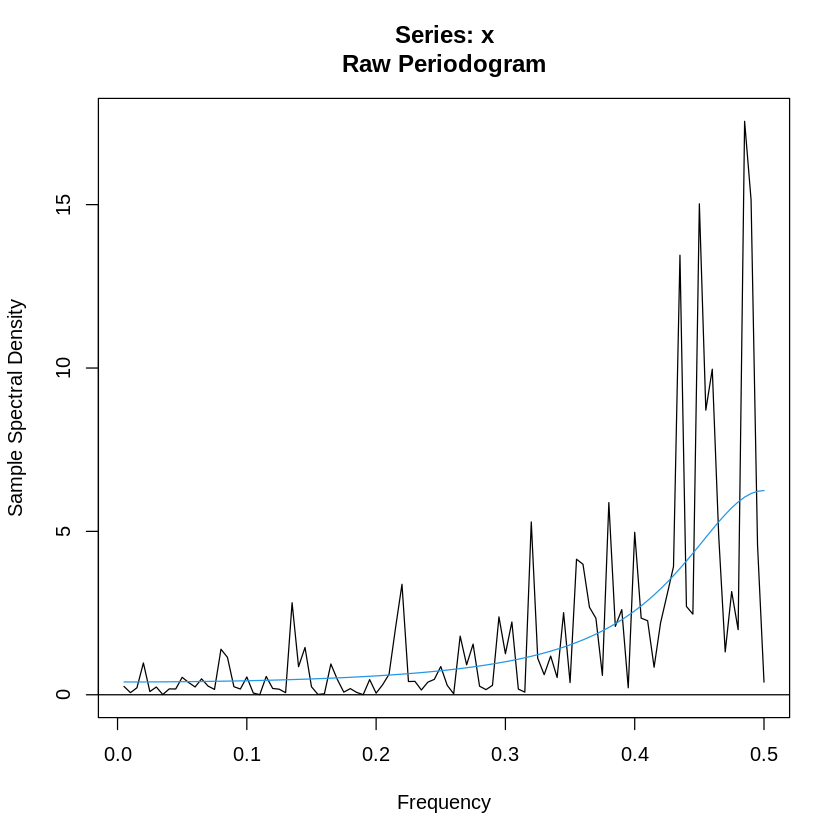

In [ ]:
set.seed(271435) #set seed for randomization
n=200 #sample size
phi=-0.6 #assumed phi
y <- arima.sim(model=list(ar=phi),n=n) #simulation
sp <- TSA::spec(y,log='no',xlab='Frequency', ylab='Sample Spectral Density',sub='') # Sample spectral density estimation
lines(sp$freq,ARMAspec(model=list(ar=phi),freq=sp$freq, plot=F)$spec,col = 4) # additional plot of theoretical
abline(h=0)

Though it seems centered around the theoretical spectral density, it seems volatile. We will give context with this matter.



Let's assume that $Y_t \sim iid. N(0,\gamma_0)$, without loss of generality. Recall that for the harmonic regression model with $Y_t$:

$$\hat{A}_f = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi f t \right) \quad  and \quad \hat{B}_f = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi f t \right) $$

Let's consider nonzero Fourier frequencies in which $f=j/n < 1/2$.

Here are the properties of $\hat{A}_f$ and $\hat{B}_f$:

* $\hat{A}_f \sim iid. N(0, 2 \gamma_0 /n )$ and $\hat{B}_f \sim iid.  N(0, 2 \gamma_0 /n ) $,
* $\hat{A}_f$ and $\hat{B}_f$ are independent of each other
* For $f_1 \ne f_2$, $\hat{A}_{f_1}$, $\hat{A}_{f_2}$, $\hat{B}_{f_1}$, and $\hat{B}_{f_2}$ and jointly independent.

Note that by these properties, and that $S(f) =\gamma_0$ for white noise, that

$$\frac{n}{2 \gamma_0} \left[ \hat{A}_f^2 + \hat{B}_f^2 \right]= \frac{2 \hat{S}(f) }{{S}(f) } \sim \chi_{(df = 2)}^2$$

From here, we can infer the following:

* For $f_1 \ne f_2$, $ \hat{S}(f_1)$ and $ \hat{S}(f_2)$ are independent

* $E[\hat{S}(f)] = {S}(f)$, which means it is unbiased

* $Var[\hat{S}(f)] = {S}^2(f)$, this is problematic as the variance is not a function of $1/n$ and thus does not improve with increase in sample size; it is ***inconsistent***.

Thus, what we saw from the example simulation, even with large sample size, our estimation of the population spectrum is inconsistent.

We need a better way, which we will talk about in the next section.

# Estimation of the Spectral Density



## Confidence Interval of the Spectral Density

From the distribution of $2 \hat{S}(f) / S(f) \sim \chi^2_{(df = 2)}$, the $(1-\alpha)100\%$ confidence interval for $S(f)$ is

$$ \left( \frac{2 \hat{S}(f) }{ \chi^2_{1-(\alpha /2), df = 2}} \quad , \quad  
 \frac{2 \hat{S}(f) }{ \chi^2_{\alpha /2, df = 2}}\right)$$

In terms of the log transform, the confidence interval

$$\left( \log(\hat{S}(f)) + \log (2 / \chi^2_{1-(\alpha /2), df = 2} ) \quad , \quad  \log(\hat{S}(f)) + \log (2 /\chi^2_{\alpha /2, df = 2} ) \right) $$

## Smoothing the Spectral Density

A basic approach is to use a $(2m+1)$ centered moving average filter is applied to generate the *smoothed sample spectral density*:

$$\bar{S}(f) = \frac{1}{2m+1} \sum_{j=-m}^{m} \hat{S} \left( f +\frac{j}{n}\right)$$

When frequencies to smoothen are close to $0$ or $1/2$, we use the symmetry of $\hat{S}(f)$ in $0$ and $1/2$ for spectral values outside the range to solve the smoothed value; i.e.,

$$\hat{S}(f) = \hat{S}(-f) = \hat{S}(1-f)$$

We can generalize the smoother to a weight function $W_m(k) , -m \le k \le m$ called the *spectral window* with the following properties:

* nonnegative weights: $W_m(k) \ge 0$
* symmetric weights: $W_m(k) = W_m(-k)$
* normalized weights to 1: $\sum_{k=-m}^{m} W_m(k) =1$

And the general smoothed estimator of the spectral density is  

$$\bar{S}(f) =  \sum_{k=-m}^{m} W_m(k) \hat{S} \left( f +\frac{k}{n}\right)$$

The $(2m+1)$ centered moving average filter such that

$$W_m(k) = \frac{1}{2m+1} \quad, \quad -m \le k \le m $$

is often called the *Daniell spectral window*.

Let's show some examples with an AR(1) process.

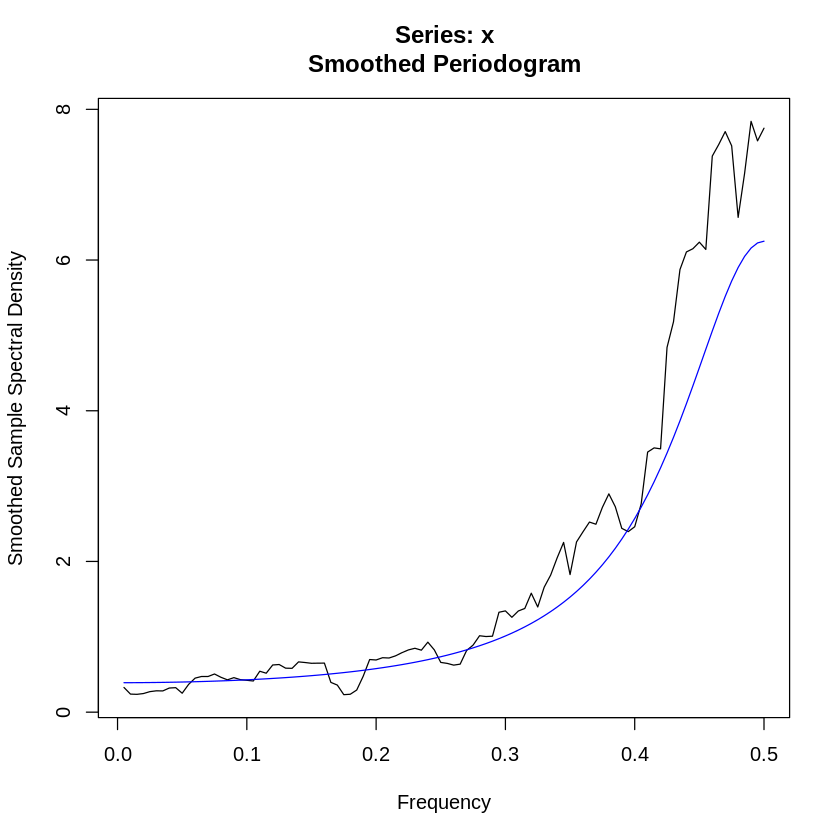

In [ ]:
## Example Smoothed Spectra with a simulated AR(1) process

set.seed(271435) ## random seed for reproducibility

n <- 200 # sample size

phi <- -0.6 # assumed phi for the AR(1) process, note that this is a high frequency process

y <- arima.sim(model=list(ar=phi),n=n)  # simulated AR process

k <- kernel('daniell',m=5) ## set kernel definition;
## https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/kernel for more help

sp <- TSA::spec(y,kernel=k,log='no',sub='',xlab='Frequency', ylab='Smoothed Sample Spectral Density')
## Estimate the spectrum of the data

lines(sp$freq,ARMAspec(model=list(ar=phi),freq=sp$freq,plot=F)$spec,col = "blue") ## add theoretical spectral density

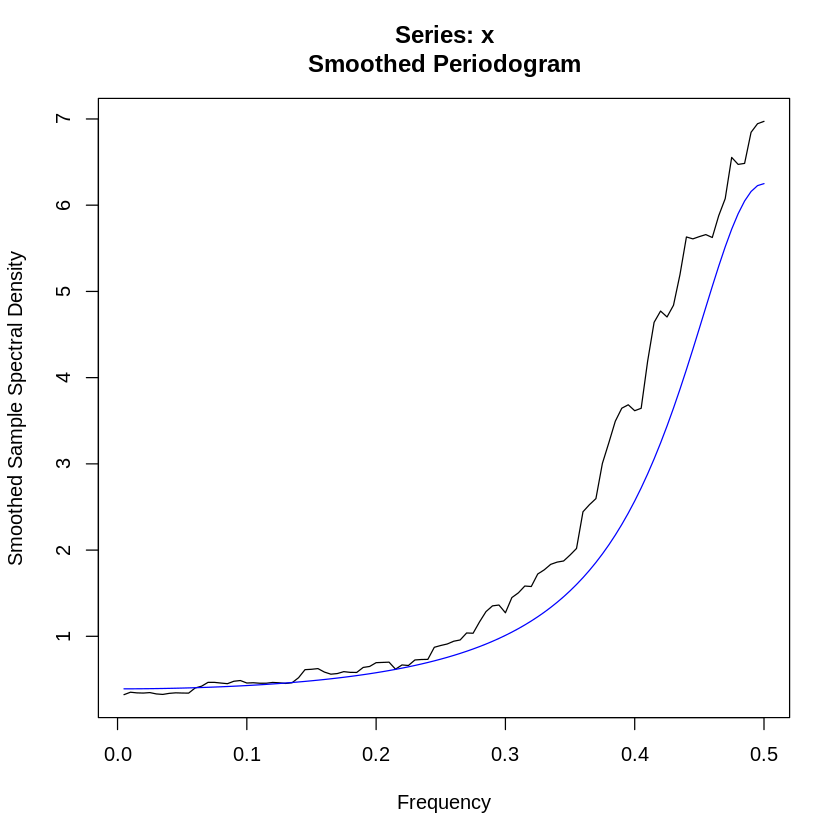

In [ ]:
## Continuation of the Example of a Smoothed Spectra with a simulated AR(1) process
## Now, the Daniell window is increased

k <- kernel('daniell',m=15) ## set kernel definition

sp <- TSA::spec(y,kernel=k,log='no',sub='',xlab='Frequency', ylab='Smoothed Sample Spectral Density')
## Estimate the spectrum of the data

lines(sp$freq,ARMAspec(model=list(ar=phi),freq=sp$freq,plot=F)$spec,col = "blue") ## add theoretical spectral density

Note:

You can use other spectral windows beyond the Daniell window. Some examples are:

* Tukey window (TATSAIR):
$$ W_m(k) = \frac{1}{2m} \left[ 1+ \cos \left(  \frac{\pi k}{m} \right) \right] $$

* Parzen window  (TATSAIR), where $W^*_m(k)$ is the unscaled weights:
$$ W^*_m(k) = 1- 6 \left( \frac{|k|}{m} \right)^2 +  6 \left( \frac{|k|}{m} \right)^3 \quad , \quad 0 \le k \le m/2$$
$$ W^*_m(k) = 2 \left( 1-  \frac{|k|}{m} \right)^3 \quad , \quad m/2 < k \le m$$
$$W_m(k) = \frac{W^*_m(k)}{ \sum_{j=-m}^{m} W^*_m(j)}$$

* Hann window (TATSAIR), or *Hanning*

$$W_1(k) = \frac{1}{2} - \frac{|k|}{4}, k = -1,0,1$$

* Hamming window (TATSAIR)
$$W_1(k) = 0.54 - 0.31|k|, k = -1,0,1$$

* modified Daniell window (TSAAR):
$$ W_m(k) =  \frac{1}{2m}, -m +1 \le k \le m-1$$
$$ W_m(k) =  \frac{1}{4m}, k = -m, m$$

You can also makes a sequence of convolutions to the Daniell and modified Daniell windows that maintains symmetry but the weights converge to some bell-shaped curve.

You also have to liberty to apply different symmetric kernels of your choice using the *stats::kernel* function.

[1] 1

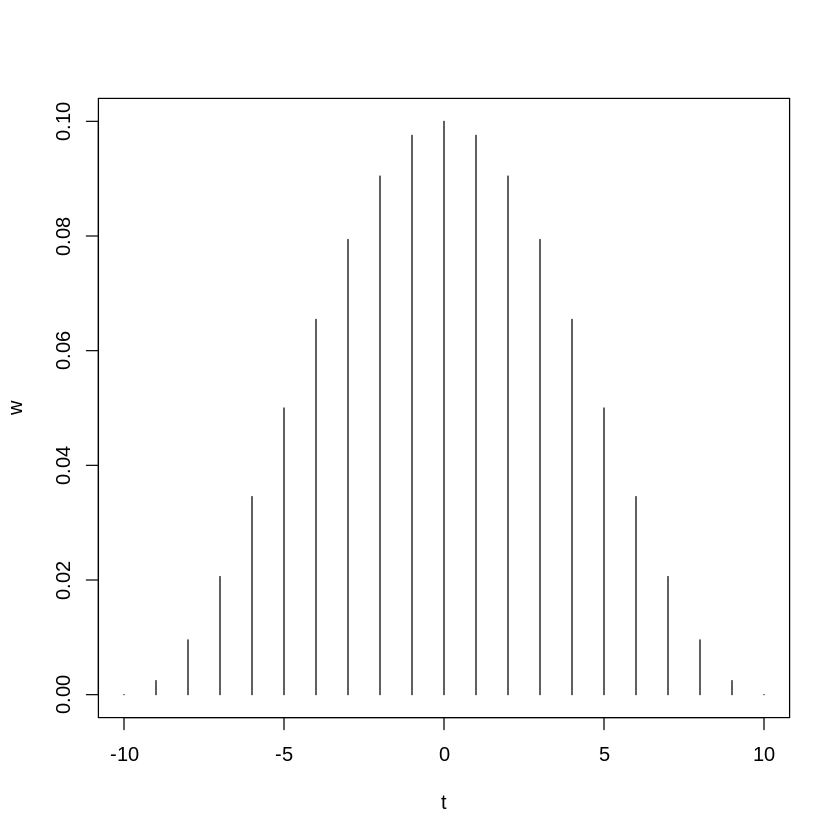

In [ ]:
## Example Tukey Window

M <- 10
t <- seq(-M, M, by = 1)

w <- 0.5 * (1 +cos(pi*t/M)) / M

plot(t,w, type = "h")

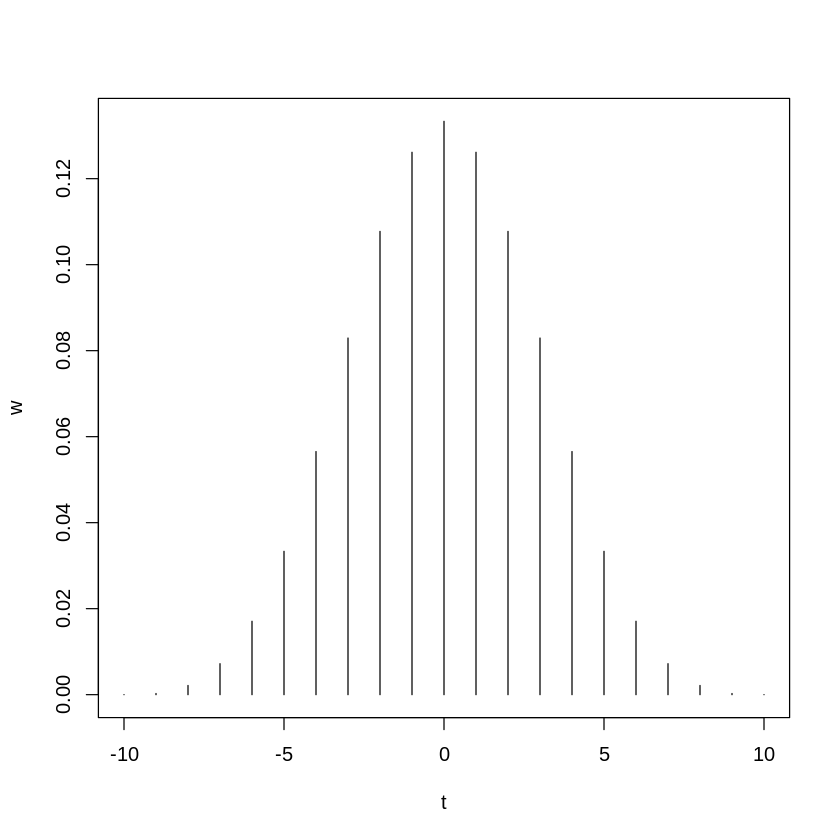

In [ ]:
## Example Parzen Window

M <- 10
t <- seq(-M, M, by = 1)

w_unscaled <- ifelse(abs(t) <= M/2, 1 - 6* (abs(t)/M)^2 + 6* (abs(t)/M)^3, 2*(1-abs(t)/M)^3  )
w <- w_unscaled/sum(w_unscaled)

plot(t,w, type = "h")

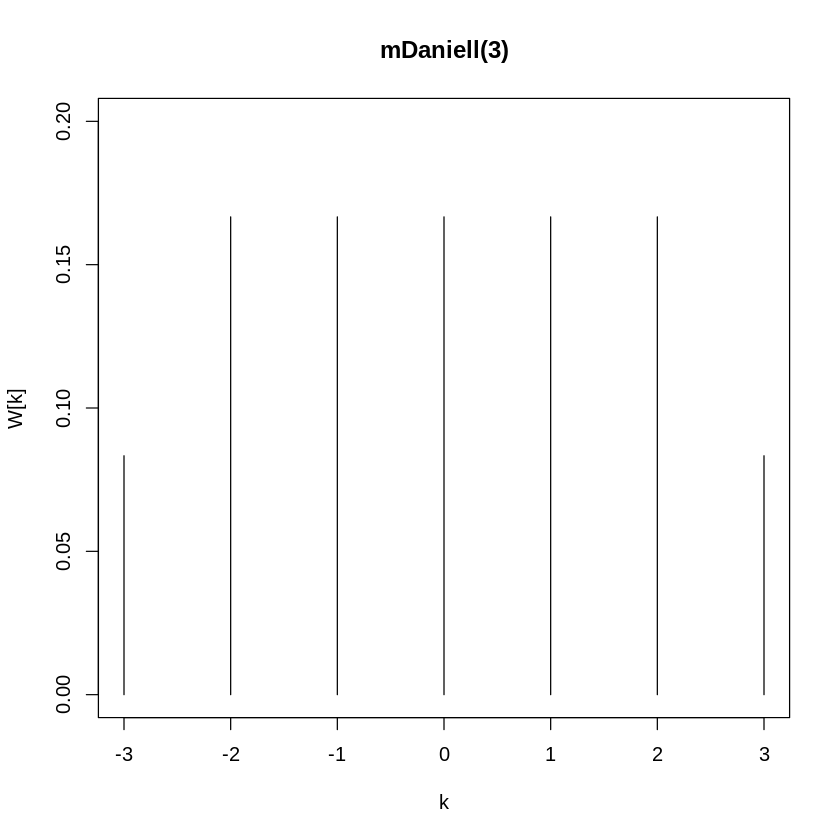

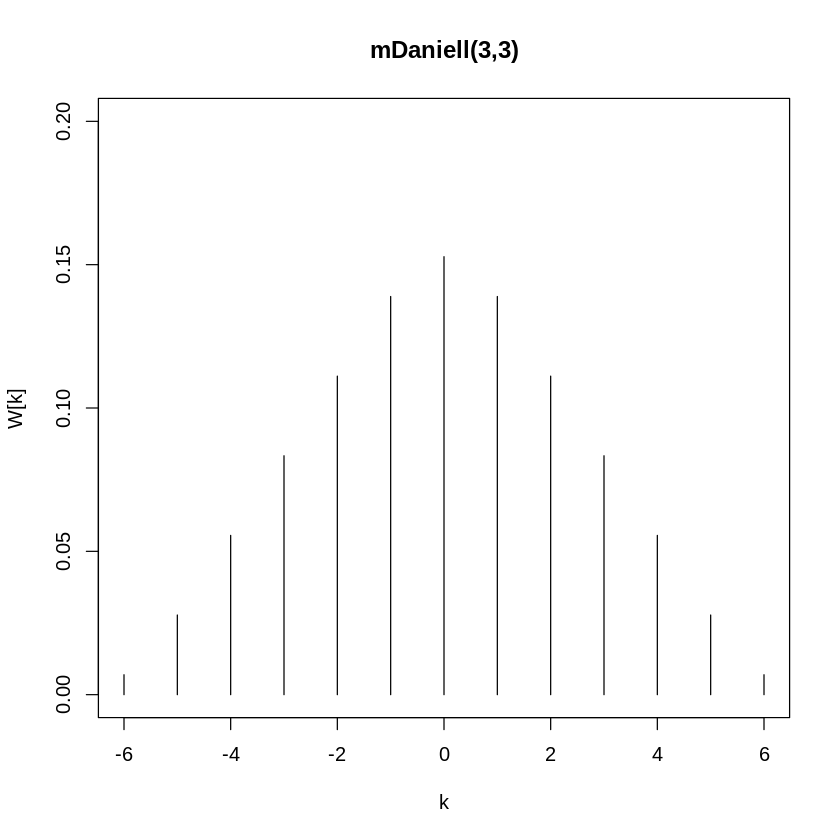

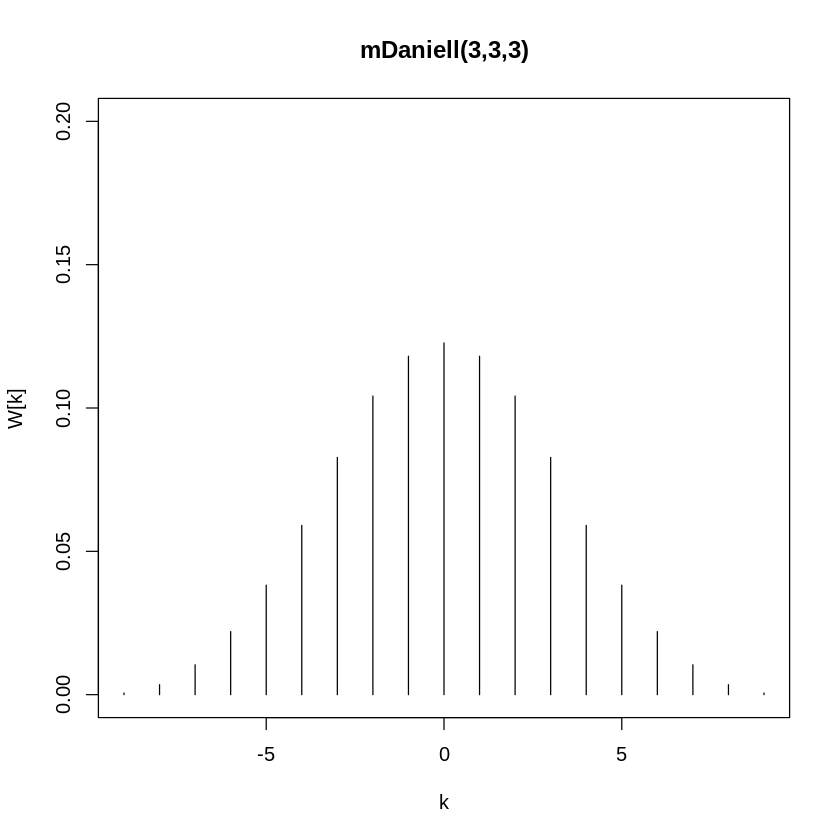

In [ ]:
## Examples of Convoluted Modified Daniell Kernels

M <- 3 ## initial radius of modified Daniell kernel

dk1 <- kernel("modified.daniell", m = M) ## First modified Daniell kernel

plot(dk1, ylim = c(0,0.2))

dk2 <- kernel("modified.daniell", m = c(M,M) ) ## 2-term convolution Daniell kernel
# Note: this makes the final radius = 6
## PS: you can play with differing numbers per step of the convolution, e.g., c(3,4)

plot(dk2, ylim = c(0,0.2))

dk3 <- kernel("modified.daniell", m = c(M,M,M) ) ## 3-term convolution Daniell kernel

plot(dk3, ylim = c(0,0.2))

## Bias and Variance with Smoothed Spectral Densities

Solving for the expected value of the smoothed spectral density (TSAAR),

$$E[ \bar{S}(f) ] \approx S(f) + \frac{S''(f)}{2n^2} \sum_{k=-m}^{m} k^2 W_m(k)$$

Thus, the bias is equal to

$$bias  \approx \frac{S''(f)}{2n^2} \sum_{k=-m}^{m} k^2 W_m(k)$$

It seems that for a fixed radius $m$, the bias can be reduced by a large sample size.

Specifically for the Daniell rectangular window,

$$\frac{1}{n^2} \sum_{k=-m}^{m} k^2 W_m(k) = \frac{2}{n^2 (2m+1)} \left( \frac{m^3}{3} + \frac{m^2}{2} + \frac{m}{6}  \right)$$

which means that for large sample sizes, i.e., $n \rightarrow \infty$, bias can be reduced so long as $m/n$ is very small, i.e., $m/n \rightarrow 0$.

In terms of the variance of the smoothed sample spectral density,

$$Var[\bar{S}(f)] \approx S^2 (f) \sum_{k=-m}^{m} W^2_m(k)   $$

Specifically for the Daniell spectral window,

$$\sum_{k=-m}^{m} W^2_m(k) = \frac{1}{2m+1}  $$

thus if $m \rightarrow \infty$ as $n \rightarrow \infty$, i.e., $m$ is very large as sample size gets large, variance can be reduced.

Note:

* Sample size $n$ is often fixed so the choice of $m$ introduces a *bias-variance tradeoff* in which large $m$ reduces variance but may risk higher bias, and vice versa.

* Small $m$ can highlight the peaks of $S(f)$ but may be spurious because of volatility of the result from a small window smoothing.

* Large $m$ may have smaller variance, but may produce too smooth of a curve that important frequencies are hidden.

* Some rules of thumb: use $m = [[\sqrt{n}]]$, $m = 2[[\sqrt{n}]]$, or $m = [[\frac{1}{2} \sqrt{n}]]$ to have some rough idea.

## Bandwidth of the Spectral Window

The *bandwidth* $BW$ of the spectral window is defined as

$$BW = \frac{1}{n} \sqrt{ \sum_{k=-m}^{m} k^2 W_m(k) } $$

Note:

* $bias = \frac{S''(f)}{2} [BW]^2$
* $BW$ is a measure of the width of the band of frequencies used in smoothing.
* if two peaks are closed together relative to the bandwidth, then the two peaks will be expressed as 1 peak by the spectral window used.

## Confidence Interval based on the Smoothed Spectral Density

For constructing the confidence interval, the pivot is

$$\frac{v \bar{S}(f) }{S(f)} \sim \chi^2_{(df = v)} \quad , \quad v = \frac{2}{\sum_{k=-m}^{m} W^2_m(k)}$$

which gives us the $(1-\alpha)100\%$ confidence interval for $S(f)$ based on $ \bar{S}(f) $  is

$$ \left( \frac{v \bar{S}(f) }{ \chi^2_{1-(\alpha /2), df = v}} \quad , \quad  
 \frac{v \bar{S}(f) }{ \chi^2_{\alpha /2, df = v}}\right)$$

In terms of the log transform, the confidence interval

$$\left( \log(\bar{S}(f)) + \log (v/\chi^2_{1-(\alpha /2), df = v} ) \quad , \quad  \log(\bar{S}(f)) + \log (v/ \chi^2_{\alpha /2, df = v} ) \right) $$

[1] 8.948929

[1] 62

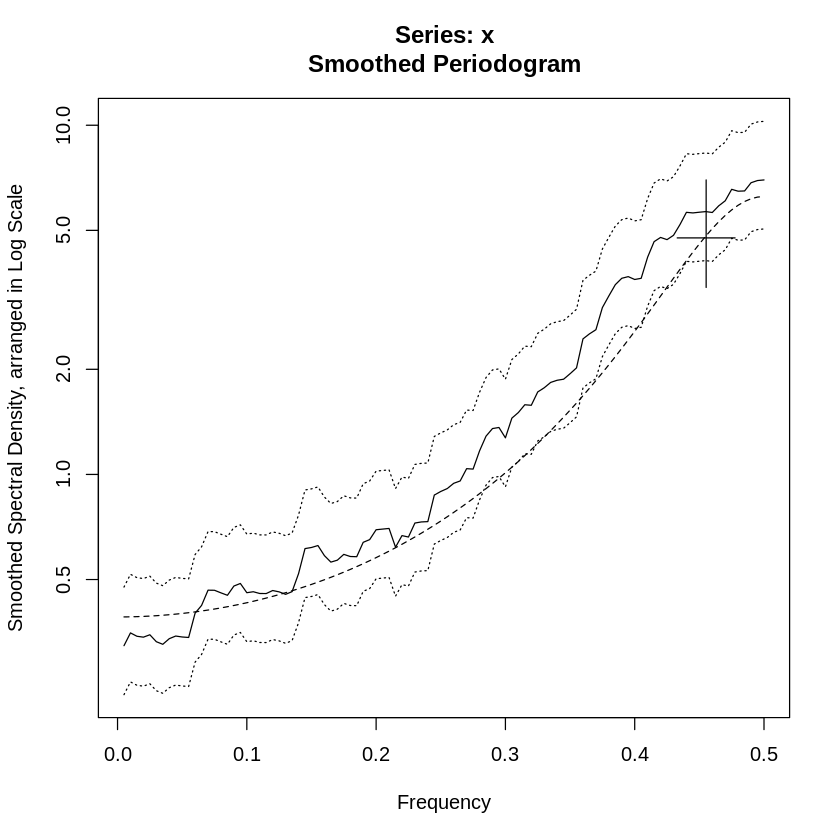

In [ ]:
## Setup for Examples

set.seed(271435)
n <-200
phi <- -0.6

k <- kernel('daniell',m=15)

## Example Bandwidth

bandwidth.kernel(k)
## = 8.95, which means a radius of about 9 Fourier frequencies are affected by the spectral window.

## Example Degree of Freedom of the Spectral Window

df.kernel(k)
## = 62, which is close to symmetric as the degree of freedom is very large.
## chi^2 with df = v --> N(v, 2v)

## Example Confidence Interval for the Smoothed Spectral Density in Log Transform

y <- arima.sim(model=list(ar=phi),n=n) ## Simulated AR

sp <- TSA::spec(y,kernel=k,sub='',xlab='Frequency', ylab='Smoothed Spectral Density, arranged in Log Scale', ci.plot=T,ci.col=TRUE)
## Spectral Density, arranged in logarithmic scale
lines(sp$freq,ARMAspec(model=list(ar=phi),sp$freq,plot=F)$spec, lty='dashed')

## The Case of Leakage and Tapering

There are possible instances when the frequency underlying the data is not a Fourier frequency.

Using TSAAR's example, let's simulate with the harmonic regression model but the frequencies would be $f_1 = 0.088$, non-Fourier frequency, and $f_2 = 14/96$ for $n=96$.

$$Y_t = 3 cos[2 \pi (0.088) t] + sin \left[ 2 \pi \left( \frac{14}{96} \right) t \right]$$



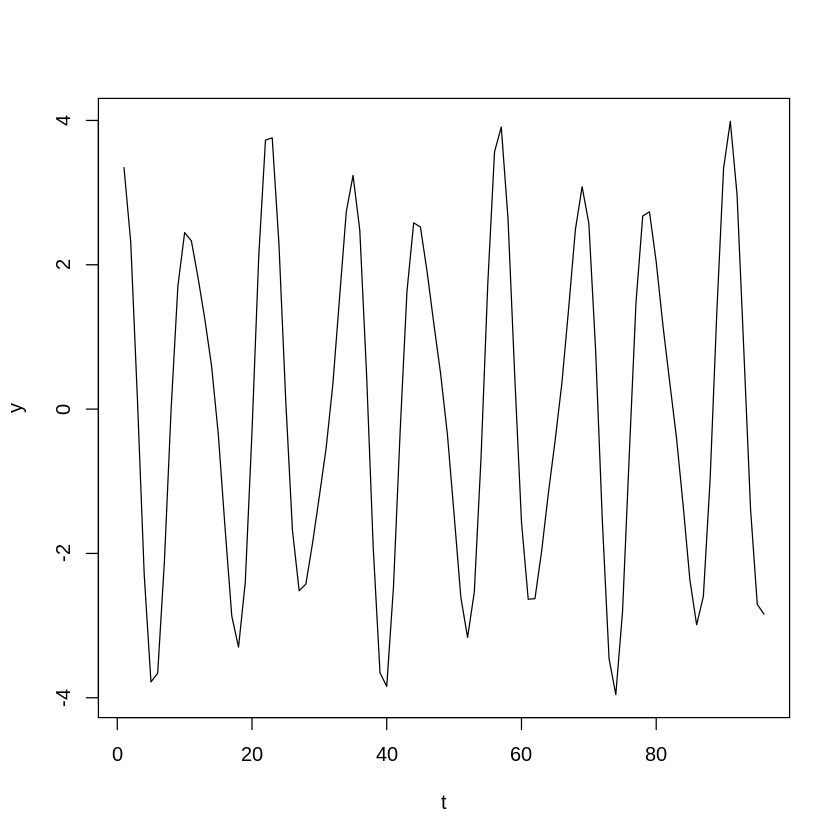

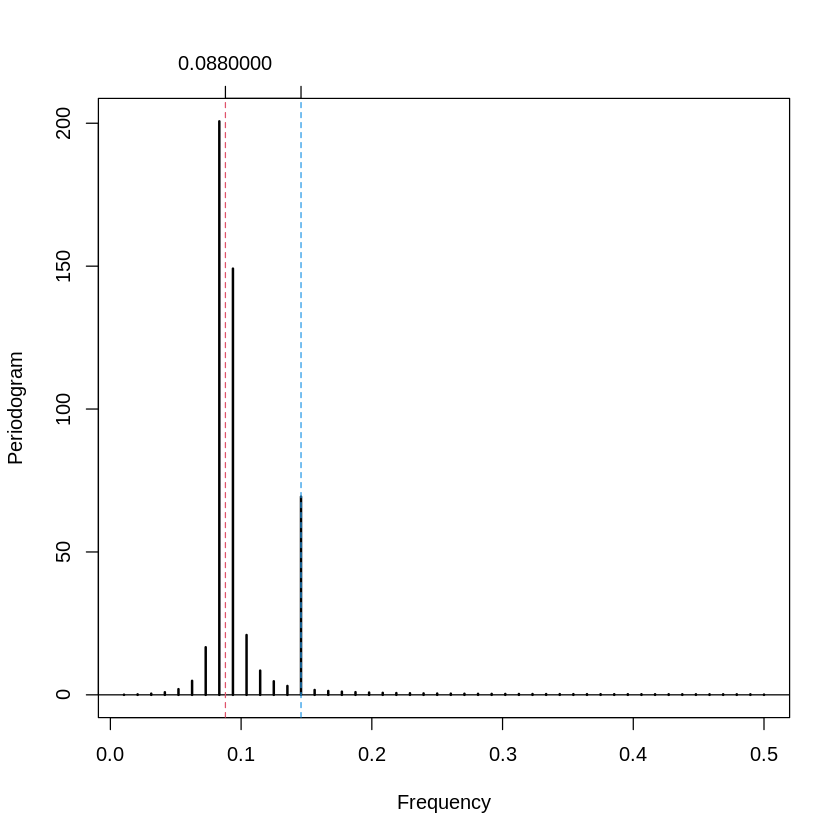

In [ ]:
## Example of a Leaking Periodogram

t <- 1:96 # Sample periods
f1 <- 0.088 # non-Fourier frequency
f2 <- 14/96 # Fourier Frequency

y <- 3*cos(f1*2*pi*t)+sin(f2*2*pi*t) # Simulated Series

plot(t,y, type = "l") # Plot of Simulated data

periodogram(y) ## Estimated Periodogram
abline(h=0)
axis(3, at = c(0.0880, 14/96))
abline(v = 0.0880, col = 2, lty = 2)
abline(v = 14/96, col = 4, lty = 2)


Looking at the periodogram, we see the definite spike at $f_2 = 14/96$. However with $f_1 = 0.088$ being a non-Fourier frequency, its power has leaked to other frequencies thus appearing as a wider peak.

The periodogram can be seen as the application of the *Dirichlet spectral window* given by

$$D(f) = \frac{1}{n} \frac{\sin(n \pi f)}{\sin (\pi f)} $$

Note that for the Fourier frequencies $f= j/n, j \in ℤ, 0 \le j \le n/2$. $D(f) = 0$ so the kernel has no impact. However, for relevant non-Fourier frequencies, it produces a leakage manifesting into significant "side-lobes" on the sides of the significant peaks.



To improve on estimation given the issue with side lobes, decreasing the data magnitudes at both ends of the series, called *tapering*, is done so that values move gradually toward the data mean of zero.

A common tapering approach is the based on the *cosine bell*.

Let $Y_t$ be the original series, then the tapered series $\tilde{Y}_t = h_t Y_t$ where $h_t$ is the cosine bell given by

$$h_t = \frac{1}{2} \left\{ 1 - \cos \left[ \frac{2 \pi (t-0.5) }{n} \right] \right\}$$

We show some graphical representation of the Dirichlet kernel before and after tapering with the cosine bell

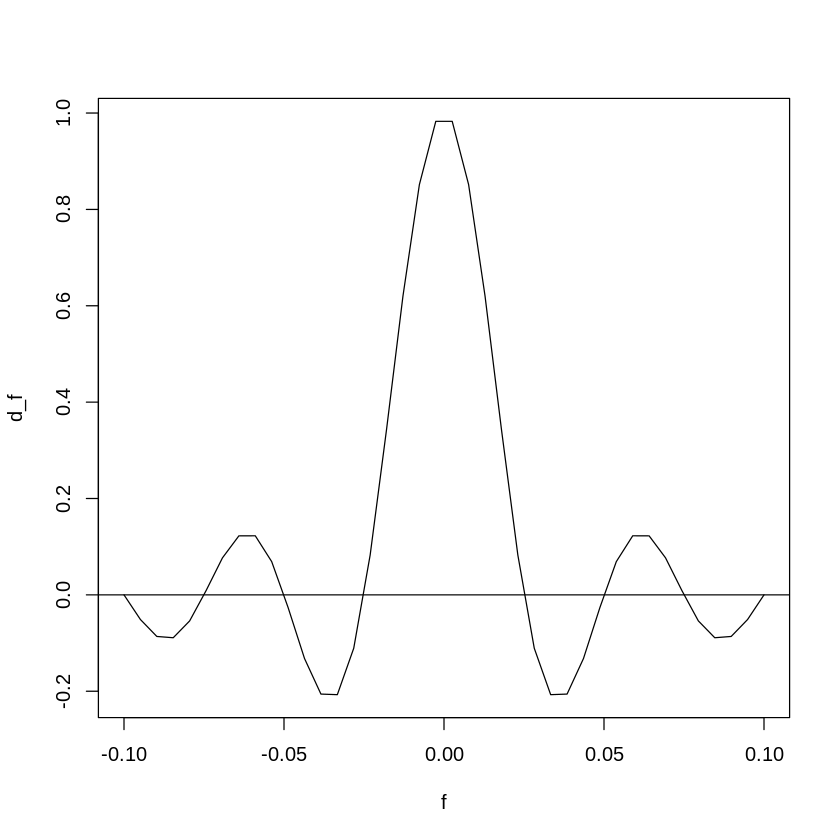

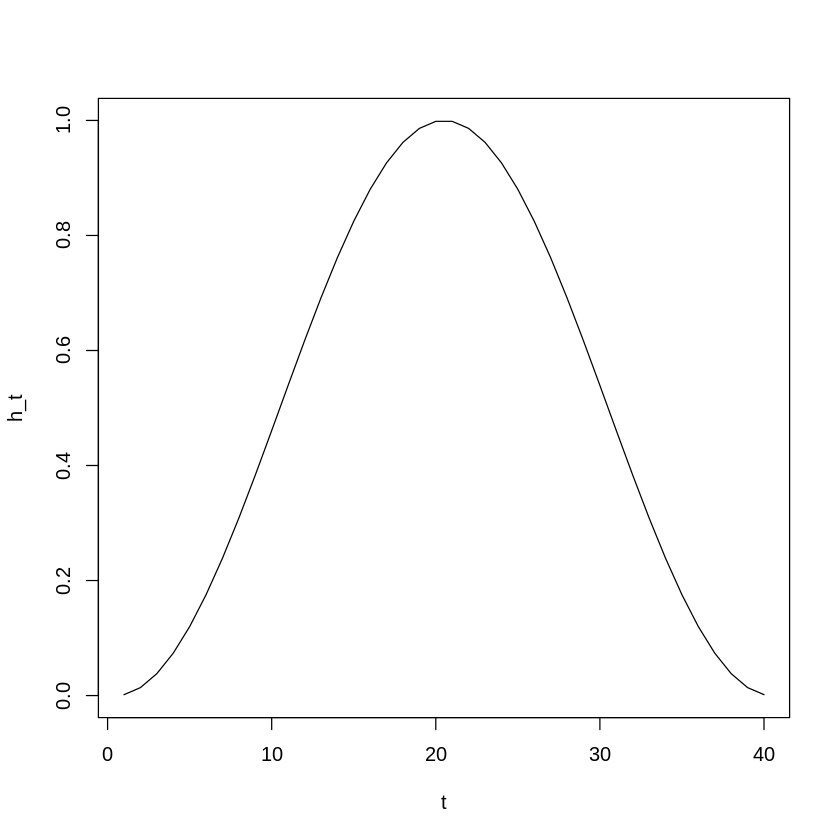

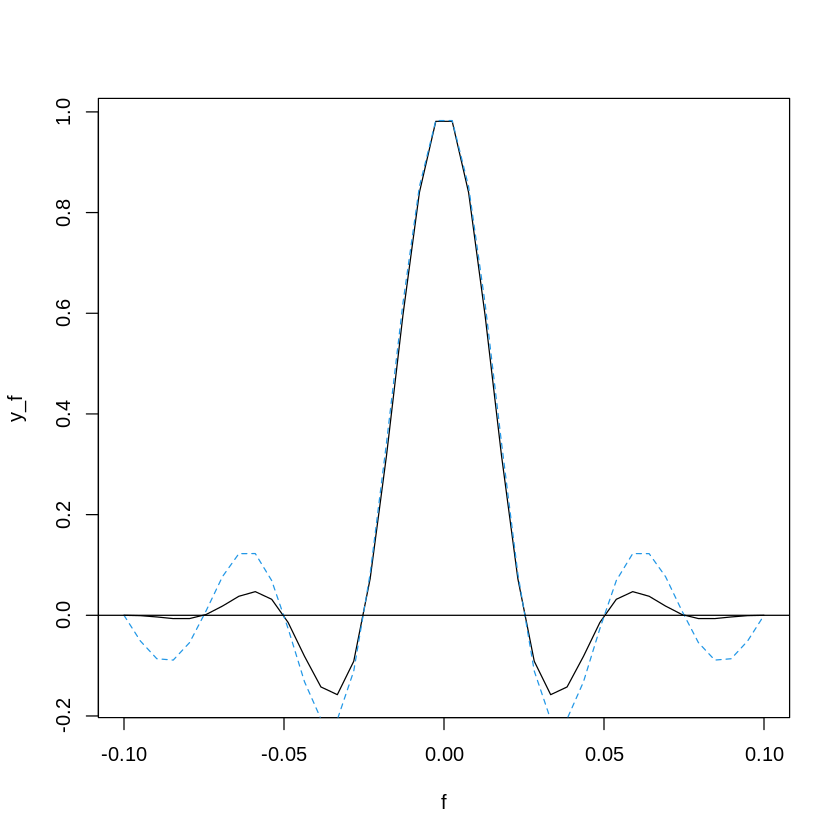

In [ ]:
## Frequency Indices

n = 40

f <- seq( -0.1, 0.1, length.out = n)
t <- 1:n

## Plotting the Dirichlet Kernel

d_f <-  1/n * sin(n*pi*f)/sin(pi * f)

plot(f, d_f, type = "l")
abline(h=0)

## Plotting the Cosine Bell

h_t <- 1/2*(1-cos(2*pi*(t-0.5)/n))

plot(t, h_t, type = "l")

## Plotting the Tapered Dirichlet kernel

y_f <- d_f * h_t

plot(f, y_f, type = "l")
lines(f, d_f, lty = 2, col = 4)
abline(h=0)

Another function used for tapering is the *split cosine bell* function, defined as:

$ h_t =  \frac{1}{2} \left\{ 1 - \cos \left[ \frac{ \pi (t-0.5) }{m} \right] \right\} \quad , \quad 1 \le t \le m$
$ h_t = 1 \quad , \quad m+1 \le t \le n - m $
$ h_t = \frac{1}{2} \left\{ 1 - \cos \left[ \frac{ \pi (n - t + 0.5) }{m} \right] \right\} \quad , \quad n-m+1 \le t \le n$

which taper $ = 100p\%$, where $p = 2m/n$

We will show the $20\%$ split cosine bell taper in the code below.

Typically, a $10\%$ to $20\%$ taper is used.

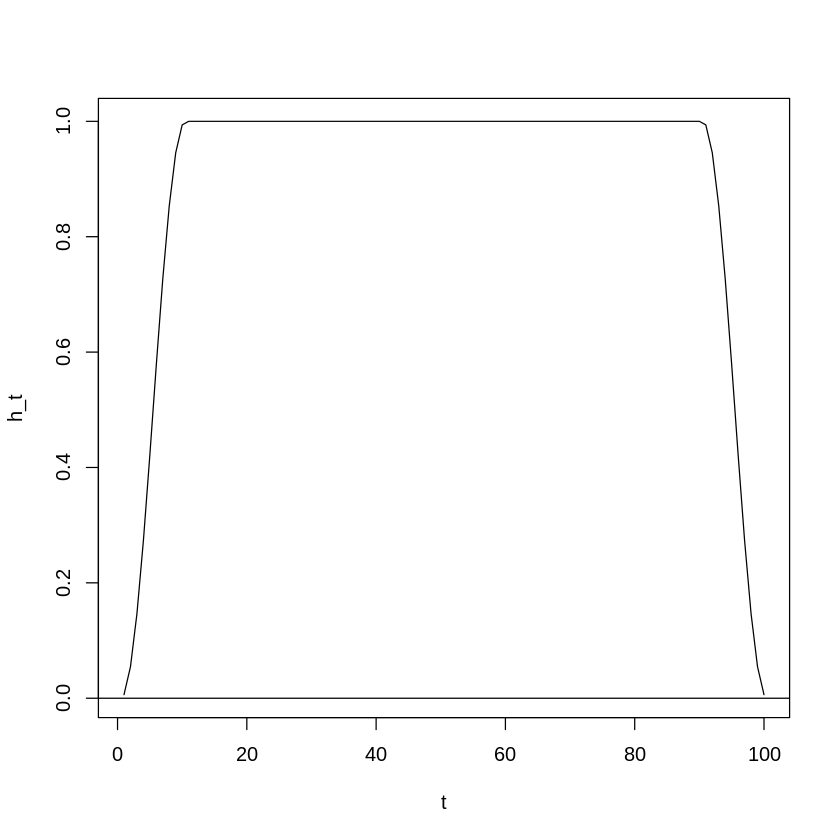

In [ ]:
## Sample Size
n <- 100

t <- 1:n

## Taper Parameter
p = 0.2

m = n*p/2

## Solving the Tapering function

h_t <- rep(NA, times = n)

for (i in 1:m) { h_t[i] <- 1/2 *(1 - cos(pi*(i-0.5)/m))}
for (i in (m+1):(n-m)) {h_t[i] <- 1}
for (i in (n-m+1):n) { h_t[i] <- 1/2 *(1 - cos(pi*(n - i + 0.5)/m))}

## PLotting the Function

plot(t, h_t, type = "l")
abline(h=0)


As an example, we will show the effect of tapering in the *star* dataset



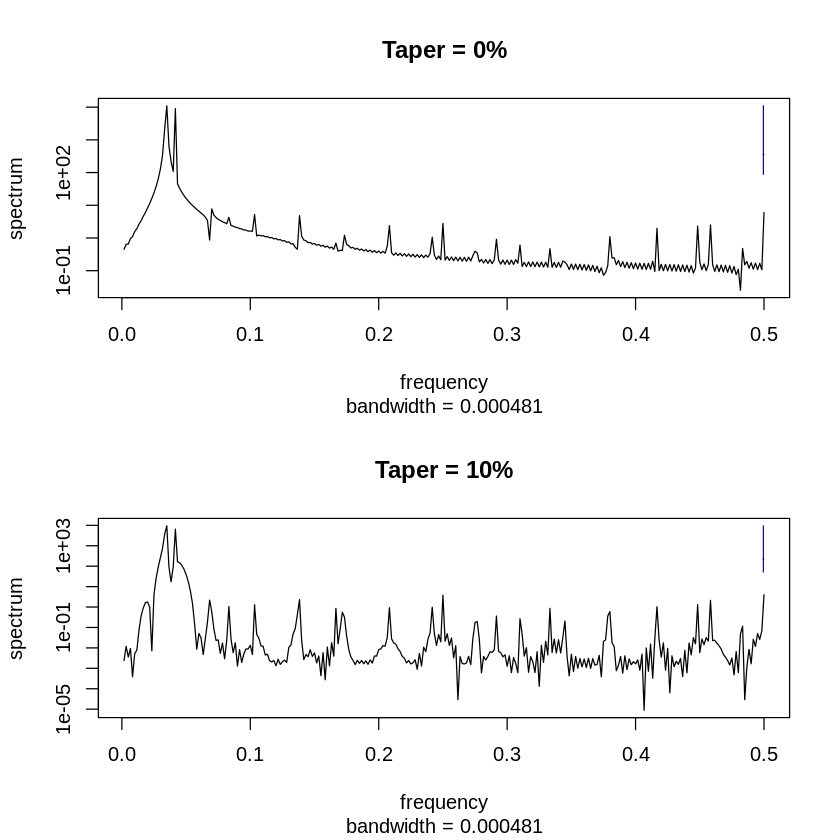

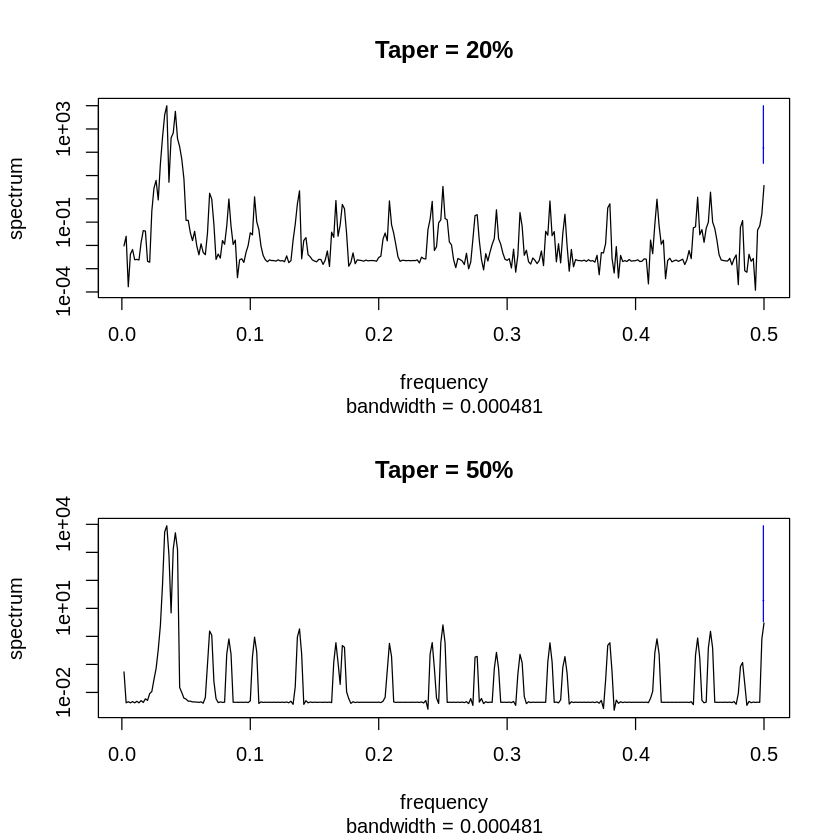

In [ ]:
data(star)

par(mfrow =c(2,1))
spec_00 <- TSA::spec(star, log = 'yes',  taper = 0, plot= TRUE, main = "Taper = 0%") # Taper = 0%
spec_10 <- TSA::spec(star, log = 'yes',  taper = 0.1, plot= TRUE, main = "Taper = 10%")  # Taper = 10%
spec_20 <- TSA::spec(star, log = 'yes',  taper = 0.2, plot= TRUE, main = "Taper = 20%")  # Taper = 20%
spec_50 <- TSA::spec(star, log = 'yes',  taper = 0.5, plot= TRUE, main = "Taper = 50%")  # Taper = 50%

## Autoregressive Spectrum Estimation

In much of the previous examples, we have always derived the spectral density using the information from the periodogram.

However, we can impose a model, typically an ARMA model, to be used in the estimation of the spectral density, as shown in a previous sample of many ARMA spectral densities.

Often, AR models are imposed in the estimation of the spectrum, and thus is used in R.

Let us shown an example using an AR(1) model with $\phi = -0.6$ with $n = 200$

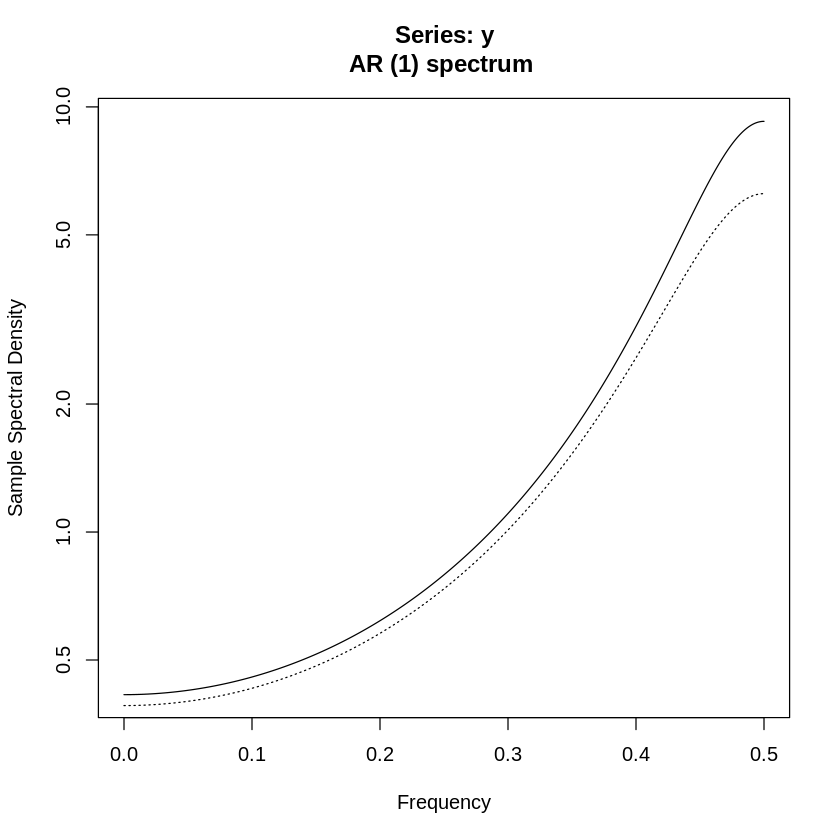

In [ ]:
set.seed(271435) #set seed for randomization
n=200 #sample size
phi=-0.6 #assumed phi
y <- arima.sim(model=list(ar=phi),n=n) #simulation
sp <- spec.ar(y, xlab='Frequency', ylab='Sample Spectral Density',sub='') # AR-Based spectral density estimation
lines(sp$freq,ARMAspec(model=list(ar=phi),freq=sp$freq, plot=F)$spec,lty='dotted') ## theoretical spectral density

## Example with Simulated Data (TSAAR)

1. AR(2) with $\phi_1 = 1.5$, $\phi_2 = -0.75$: Spectrum with a Peak

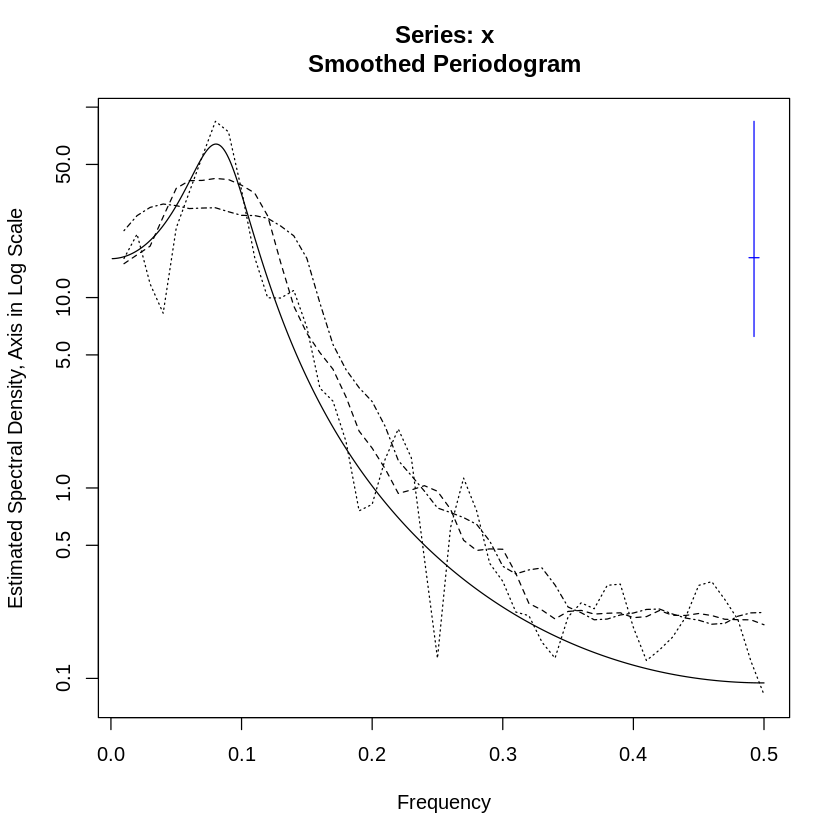

In [ ]:
##Simulation Settings

set.seed(271435) ## Random Seed for Reproducibility
n <- 100 ## Sample Size

## AR(2) Parameters
phi1 <- 1.5
phi2 <- -.75

## Simulation
y <- arima.sim(model=list(ar=c(phi1,phi2)),n=n)


## Plotting Spectral Densities using the Periodogram Approach

## span = 2m + 1 of Daniell window
## initial plot with span = 3
sp1 <- TSA::spec(y,spans=3,sub='',lty='dotted', xlab='Frequency', ylab='Estimated Spectral Density, Axis in Log Scale')

## 2 additional spans
sp2 <- TSA::spec(y,spans=9,plot=F)
sp3 <- TSA::spec(y,spans=15,plot=F)
lines(sp2$freq,sp2$spec,lty='dashed')
lines(sp3$freq,sp3$spec,lty='dotdash')

f <- seq(0.001,.5,by=.001)

## theoretical spectral density
lines(f,ARMAspec(model=list(ar=c(phi1,phi2)),freq=f,plot=F)$spec,lty='solid')

[1] "AR (2) spectrum "

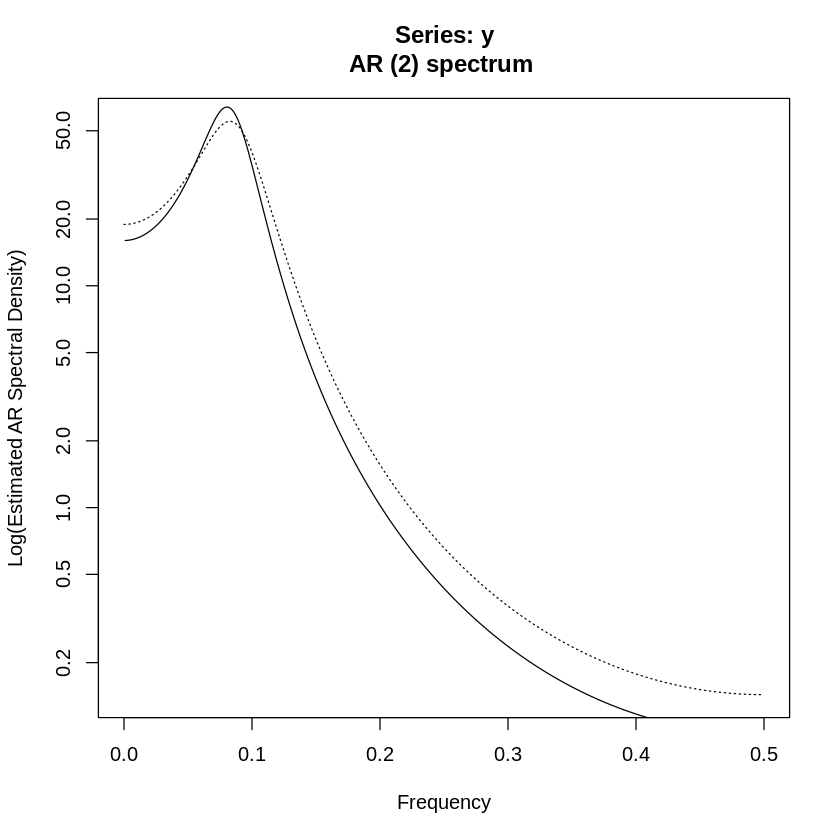

In [ ]:
##  Estimation of Spectral Density Using AR method

sp4 <- spec.ar(y,lty='dotted', xlab='Frequency',ylab='Log(Estimated AR Spectral Density)')

## Theoretical Spectral Density
f <- seq(0.001,0.5, by = 0.001)
lines(f,ARMAspec(model=list(ar=c(phi1,phi2)),freq=f, plot=F)$spec,lty='solid')

sp4$method # This will tell you order of the AR model selected

2. AR(2) with $\phi_1 = 0.1$, $\phi_2 = 0.4$: Spectrum with a Peak

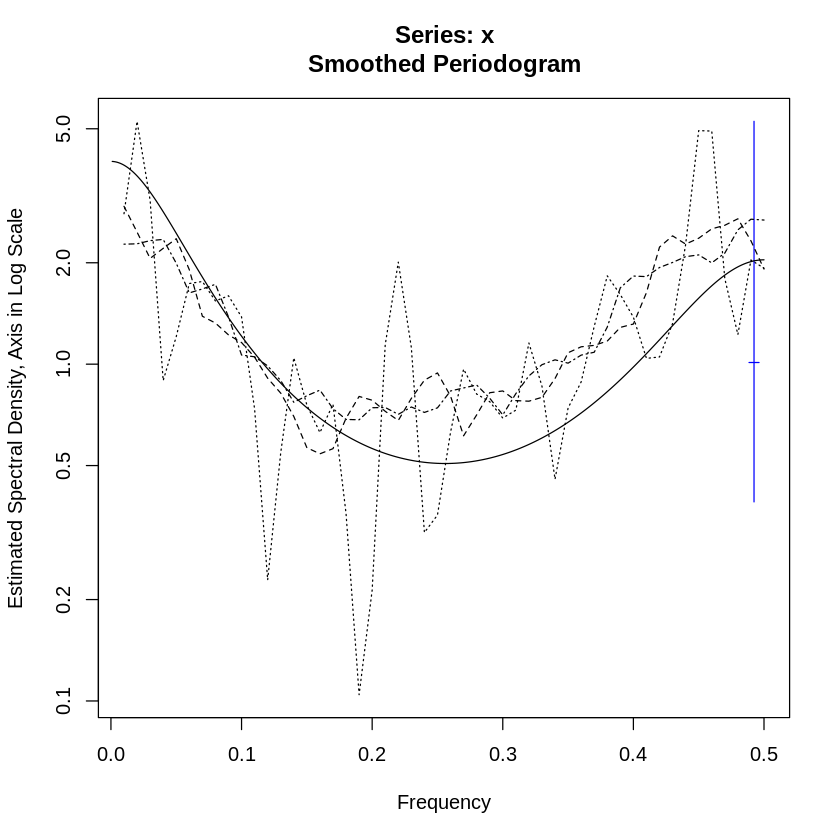

[1] "AR (2) spectrum "

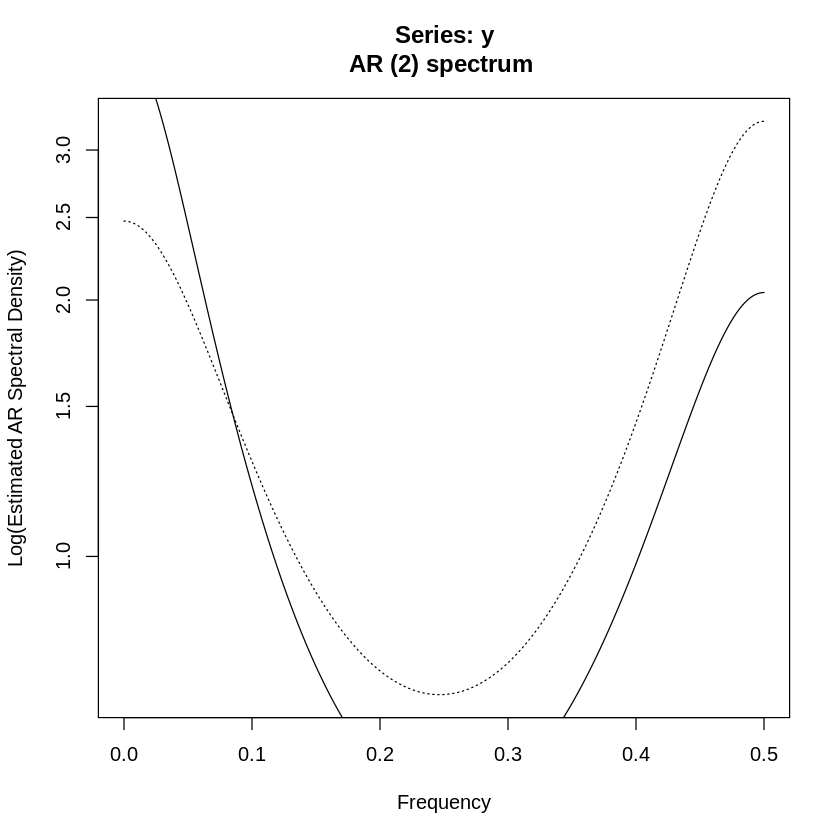

In [ ]:
##Simulation Settings

set.seed(271435) ## Random Seed for Reproducibility
n <- 100 ## Sample Size

## AR(2) Parameters
phi1 <- 0.1
phi2 <- 0.4

## Simulation
y <- arima.sim(model=list(ar=c(phi1,phi2)),n=n)


## Plotting Spectral Densities using the Periodogram Approach

## span = 2m + 1 of Daniell window
## initial plot with span = 3
sp1 <- TSA::spec(y,spans=3,sub='',lty='dotted', xlab='Frequency', ylab='Estimated Spectral Density, Axis in Log Scale')

## 2 additional spans
sp2 <- TSA::spec(y,spans=9,plot=F)
sp3 <- TSA::spec(y,spans=15,plot=F)
lines(sp2$freq,sp2$spec,lty='dashed')
lines(sp3$freq,sp3$spec,lty='dotdash')

f <- seq(0.001,.5,by=.001)

## theoretical spectral density
lines(f,ARMAspec(model=list(ar=c(phi1,phi2)),freq=f,plot=F)$spec,lty='solid')

##  Estimation of Spectral Density Using AR method
sp4 <- spec.ar(y,lty='dotted', xlab='Frequency',ylab='Log(Estimated AR Spectral Density)')

## Theoretical Spectral Density
f <- seq(0.001,0.5, by = 0.001)
lines(f,ARMAspec(model=list(ar=c(phi1,phi2)),freq=f, plot=F)$spec,lty='solid')

sp4$method # This will tell you order of the AR model selected

3. ARMA(1,1) with $\phi = 0.5$, $\theta = 0.8$

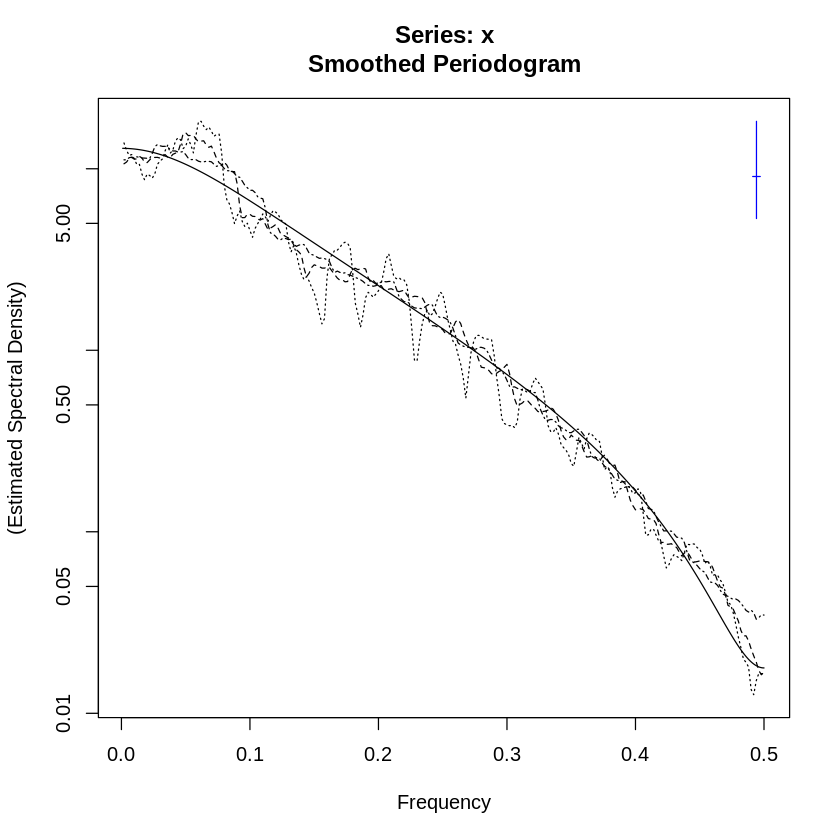

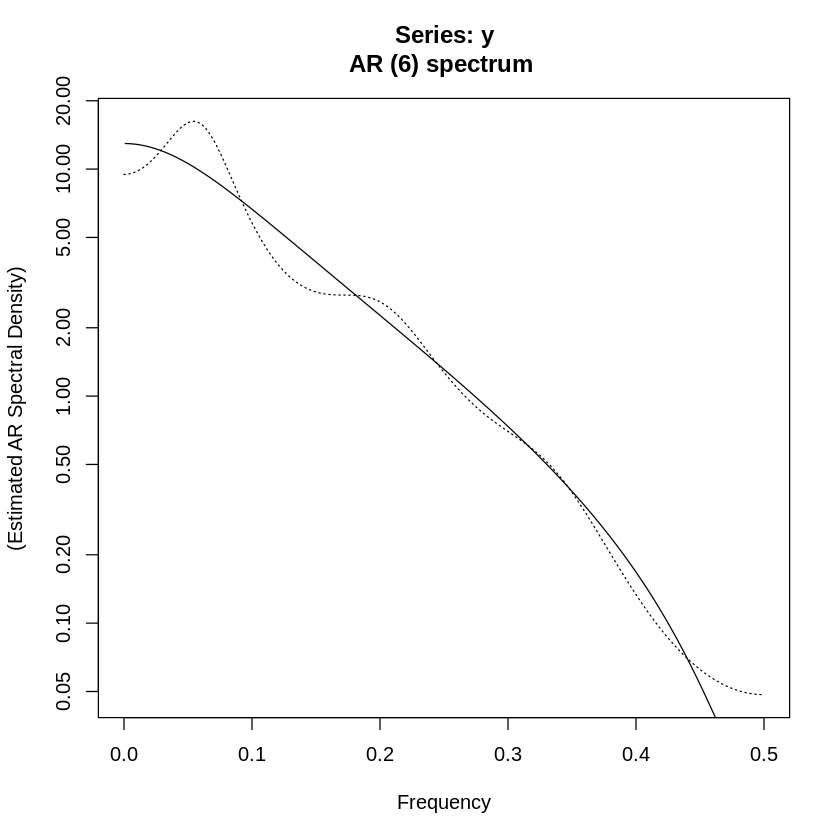

In [ ]:
## Simulations

set.seed(324135)
n=500
phi=.5
theta=.8
y=arima.sim(model=list(ar=phi,ma=theta),n=n)

## Spectral Density from Periodogram with span = 11 as baseline plot
sp1 <- TSA::spec(y,spans=11,sub='',lty='dotted',xlab='Frequency',ylab='(Estimated Spectral Density)')
sp2 <- TSA::spec(y,spans=23,plot=F)
sp3 <- TSA::spec(y,spans=45,plot=F) ## ideal span using the rule of thumb m = sqrt(500) ~ 22, so span = 2*22+1 = 45

## Spectral Density from other spans
lines(sp2$freq,sp2$spec,lty='dashed')
lines(sp3$freq,sp3$spec,lty='dotdash')

## Theoretical Spectral Density
f <- seq(0.001,.5,by=.001)
lines(f,ARMAspec(model=list(ar=phi,ma=theta),f,plot=F)$spec,lty='solid')

## Spectral Density using AR Method
sp4 <- spec.ar(y,lty='dotted', xlab='Frequency',ylab='(Estimated AR Spectral Density)')

## Theoretical Spectral Density
f <- seq(0.001,.5,by=.001)
lines(f,ARMAspec(model=list(ar=phi,ma=theta),f,plot=F)$spec,lty='solid')

4. Seasonal MA with $\theta = 0.4$, $\Theta = 0.9$, and $s = 12 $

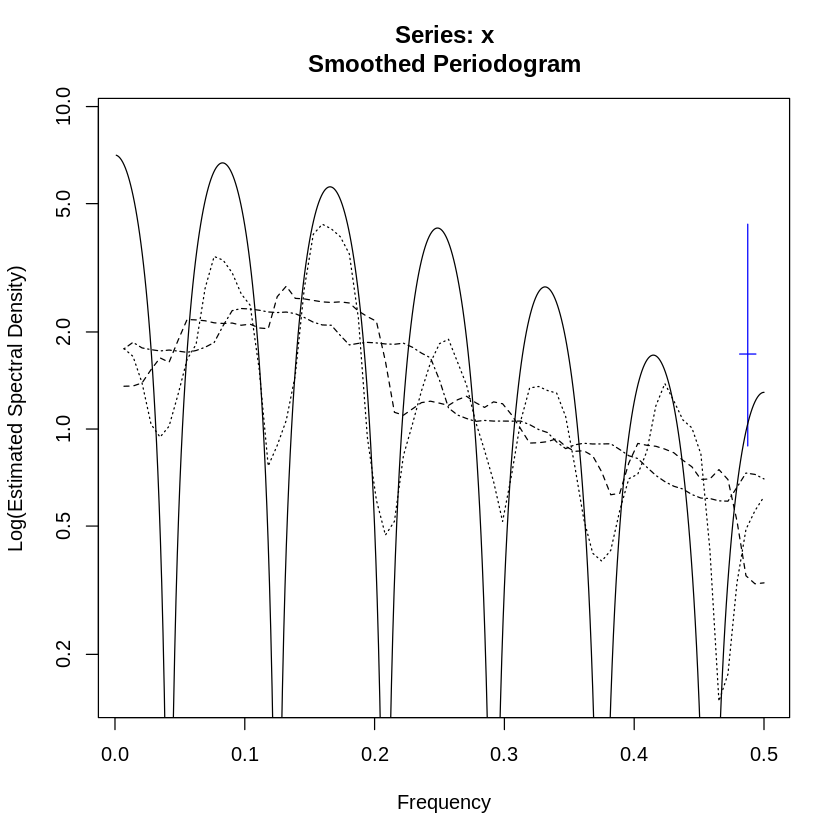

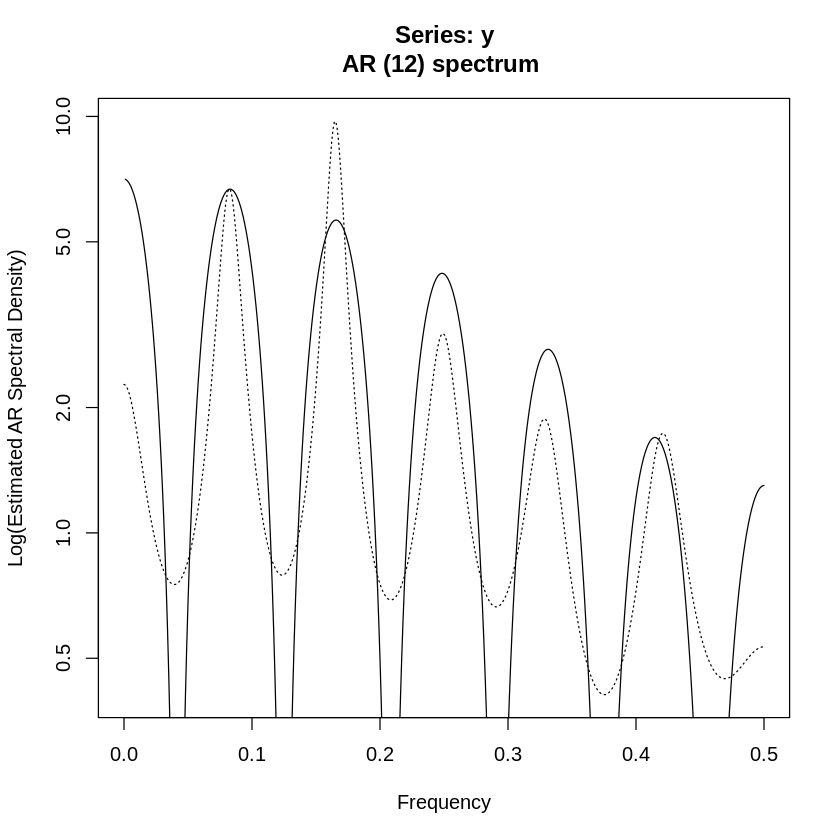

In [ ]:
## Simulations

set.seed(247135)
n <- 144
theta <- .4
THETA <- .9

y <- arima.sim(model=list(ma=c(theta,rep(0,10),THETA,theta*THETA)),n=n)

## Periodogram-based Spectral Densities
## Here, the rule of thumb is problematic since it can affect the detection of seasonality
sp1 <- TSA::spec(y,spans=7,sub='',lty='dotted',ylim=c(.15,9), xlab='Frequency',ylab='Log(Estimated Spectral Density)')
sp2 <- TSA::spec(y,spans=13,plot=F)
sp3 <- TSA::spec(y,spans=25,plot=F)
lines(sp2$freq,sp2$spec,lty='dashed')
lines(sp3$freq,sp3$spec,lty='dotdash')

## Theoretical Density
f <- seq(0.001,.5,by=.001)
lines(f,ARMAspec(model=list(ma=theta,seasonal=list(sma=THETA, period=12)),freq=f,plot=F)$spec,lty='solid')

## AR-based Spectra
sp4 <- spec.ar(y,lty='dotted', xlab='Frequency',ylab='Log(Estimated AR Spectral Density)')

## Theoretical Density
f <- seq(0.001,.5,by=.001)
lines(f,ARMAspec(model=list(ma=theta,seasonal=list(sma=THETA, period=12)),freq=f,plot=F)$spec,lty='solid')

## Example with Actual Data (TSAAR)

1. Industrial Robot

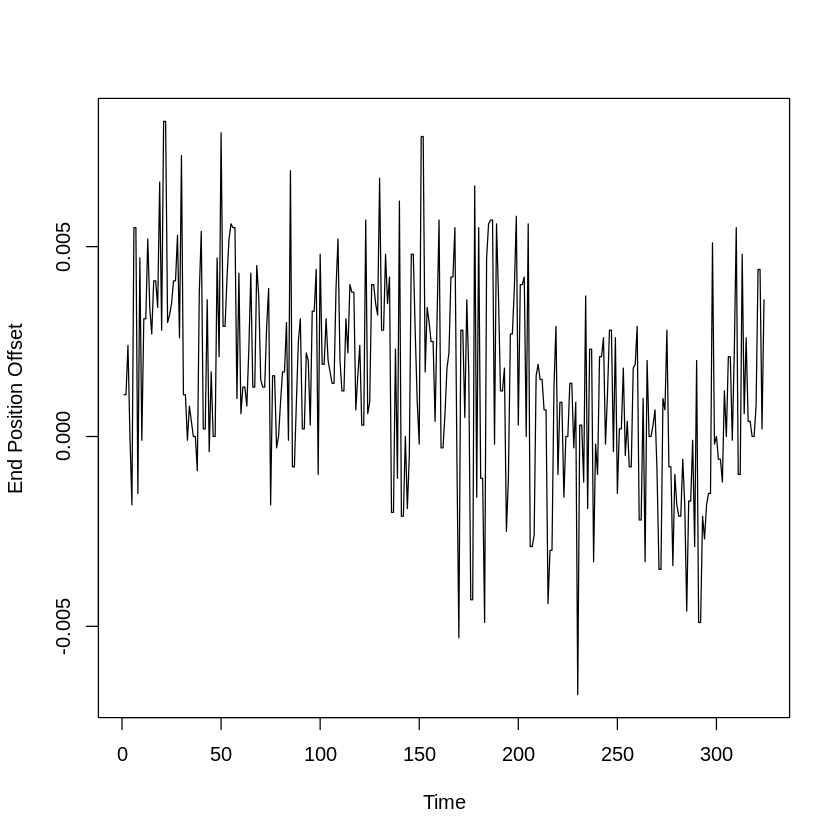

$freq
  [1] 0.003086420 0.006172840 0.009259259 0.012345679 0.015432099 0.018518519
  [7] 0.021604938 0.024691358 0.027777778 0.030864198 0.033950617 0.037037037
 [13] 0.040123457 0.043209877 0.046296296 0.049382716 0.052469136 0.055555556
 [19] 0.058641975 0.061728395 0.064814815 0.067901235 0.070987654 0.074074074
 [25] 0.077160494 0.080246914 0.083333333 0.086419753 0.089506173 0.092592593
 [31] 0.095679012 0.098765432 0.101851852 0.104938272 0.108024691 0.111111111
 [37] 0.114197531 0.117283951 0.120370370 0.123456790 0.126543210 0.129629630
 [43] 0.132716049 0.135802469 0.138888889 0.141975309 0.145061728 0.148148148
 [49] 0.151234568 0.154320988 0.157407407 0.160493827 0.163580247 0.166666667
 [55] 0.169753086 0.172839506 0.175925926 0.179012346 0.182098765 0.185185185
 [61] 0.188271605 0.191358025 0.194444444 0.197530864 0.200617284 0.203703704
 [67] 0.206790123 0.209876543 0.212962963 0.216049383 0.219135802 0.222222222
 [73] 0.225308642 0.228395062 0.231481481 0.234567901 0.23

[1] "AR (7) spectrum "

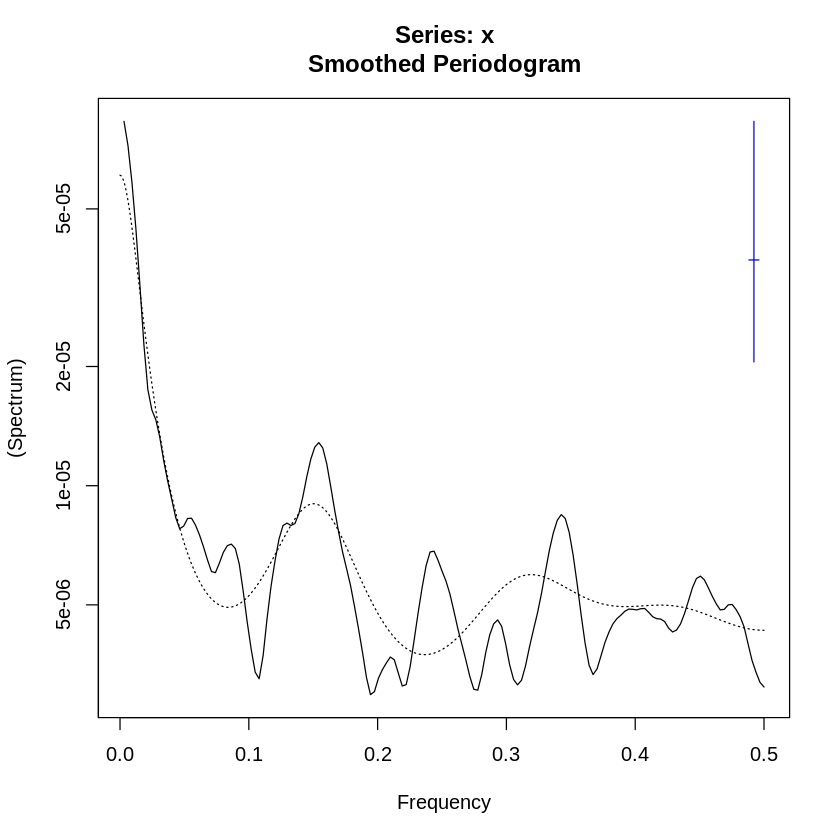

In [ ]:
data(robot)

# Plot Data
plot(robot,ylab='End Position Offset',xlab='Time')
# Plot Periodogram-based Spectrum
TSA::spec(robot,spans=c(7,7),taper=.1,sub='',xlab='Frequency', ylab='(Spectrum)')
# Add AR-based Spectrum
s <- spec.ar(robot, plot= F)
lines(s$freq,s$spec,lty='dotted')
s$method

Series: robot 
ARIMA(0,1,2) 

Coefficients:
          ma1      ma2
      -0.8088  -0.0930
s.e.   0.0540   0.0594

sigma^2 = 6.057e-06:  log likelihood = 1482.18
AIC=-2958.36   AICc=-2958.29   BIC=-2947.03

Series: robot 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.9472  -0.8062  0.0015
s.e.  0.0309   0.0609  0.0005

sigma^2 = 6.004e-06:  log likelihood = 1489.3
AIC=-2970.61   AICc=-2970.48   BIC=-2955.48

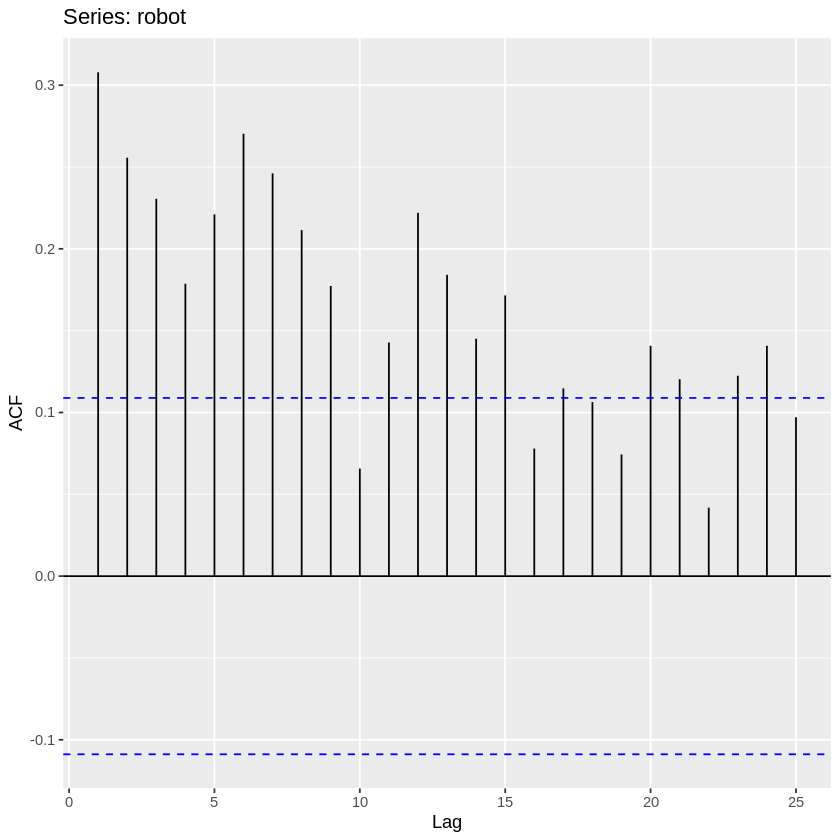


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 2.2128 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


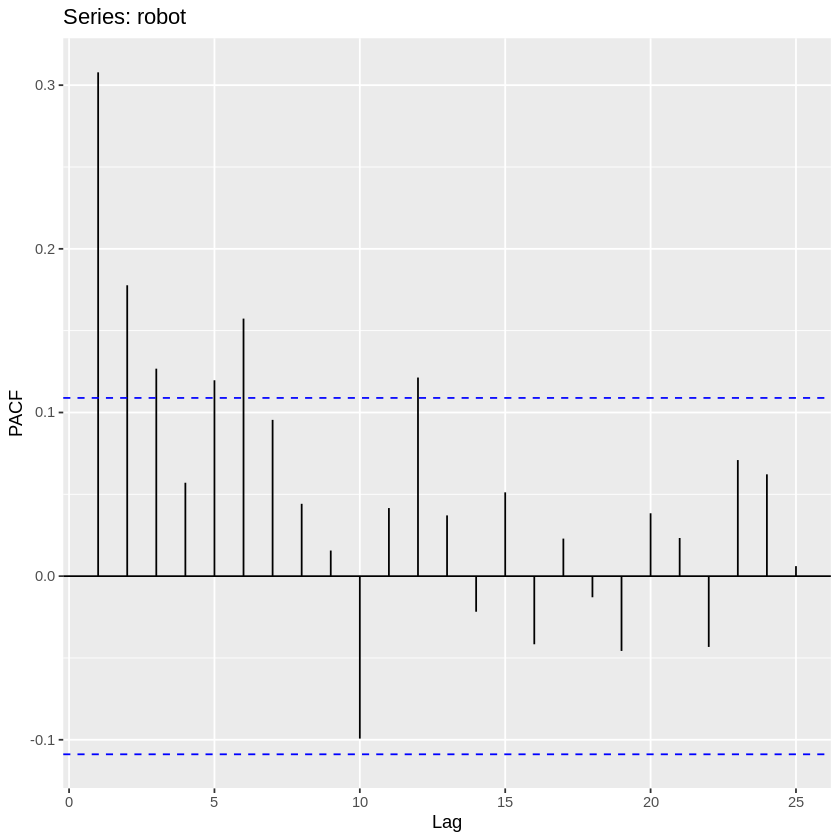

In [ ]:
## Testing other stat models

auto.arima(robot)

auto.arima(robot, d = 0) ## has better AICc, sigma^2, and likelihood.

ggAcf(robot)
ggPacf(robot)

library("urca")
summary(urca::ur.kpss(robot))
## Ho: robot is stationary
## Rej Ho if test-stat > crit value
## 2.2128 > 0.739 for alpha = 0.01
## Reject Ho, thus robot is nonstationary

Note:

* It seems that robot may be best modeled by an ARMA or an IMA model.
* The very high spike in low frequencies is often indicative of possible nonstationary which is seen with the KPSS test, slow decay of the ACF, and the selection of an ARIMA(0,1,2).

2. River Flow Time Series

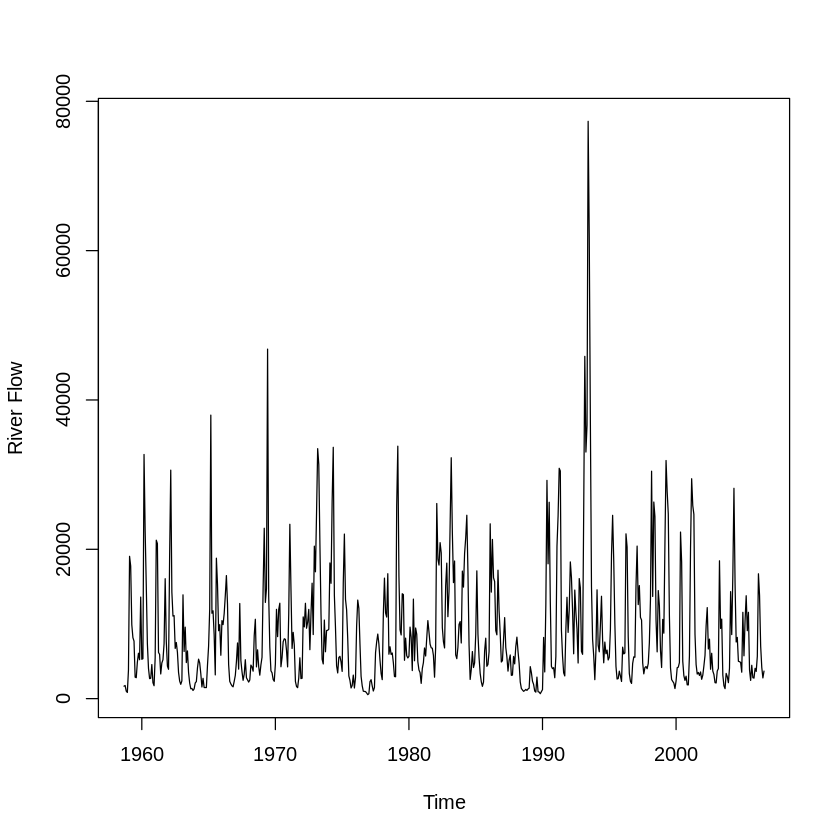

$freq
  [1] 0.001736111 0.003472222 0.005208333 0.006944444 0.008680556 0.010416667
  [7] 0.012152778 0.013888889 0.015625000 0.017361111 0.019097222 0.020833333
 [13] 0.022569444 0.024305556 0.026041667 0.027777778 0.029513889 0.031250000
 [19] 0.032986111 0.034722222 0.036458333 0.038194444 0.039930556 0.041666667
 [25] 0.043402778 0.045138889 0.046875000 0.048611111 0.050347222 0.052083333
 [31] 0.053819444 0.055555556 0.057291667 0.059027778 0.060763889 0.062500000
 [37] 0.064236111 0.065972222 0.067708333 0.069444444 0.071180556 0.072916667
 [43] 0.074652778 0.076388889 0.078125000 0.079861111 0.081597222 0.083333333
 [49] 0.085069444 0.086805556 0.088541667 0.090277778 0.092013889 0.093750000
 [55] 0.095486111 0.097222222 0.098958333 0.100694444 0.102430556 0.104166667
 [61] 0.105902778 0.107638889 0.109375000 0.111111111 0.112847222 0.114583333
 [67] 0.116319444 0.118055556 0.119791667 0.121527778 0.123263889 0.125000000
 [73] 0.126736111 0.128472222 0.130208333 0.131944444 0.13

[1] "AR (26) spectrum "

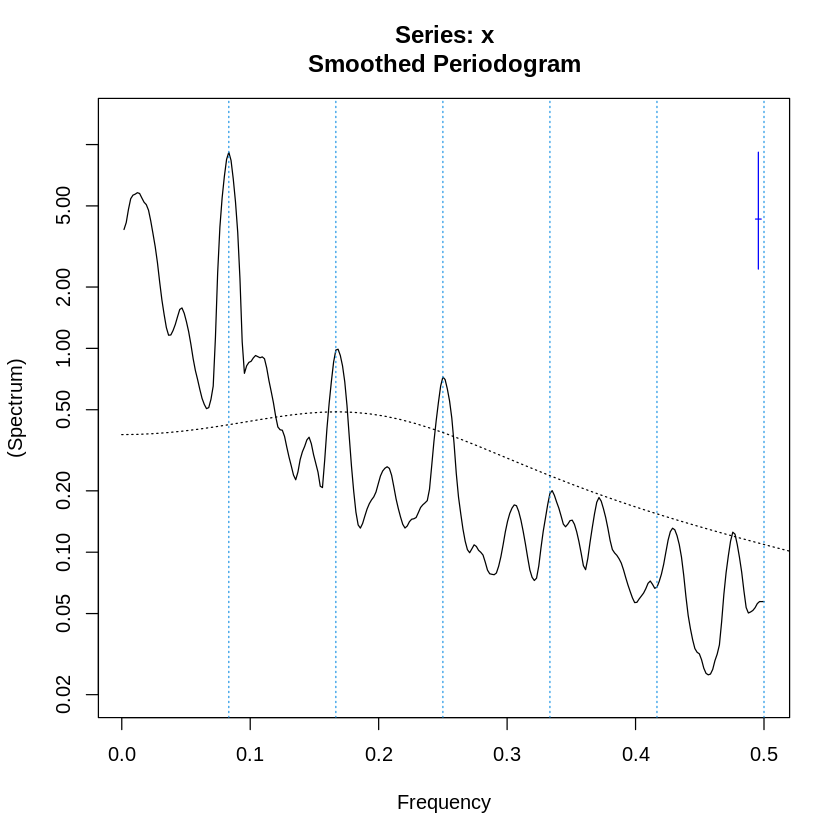

In [ ]:
data(flow)

plot(flow,ylab='River Flow')

TSA::spec(log(flow),spans=c(7,7),ylim=c(.02,13),sub='', ylab='(Spectrum)',xlab='Frequency')
abline(v=seq(1:6)/12,lty='dotted', col = 4)

s1 <- spec.ar(log(flow),plot=F)
lines(s1$freq,s1$spec,lty='dotted')

s1$method

In [ ]:
auto.arima(log(flow))

Series: log(flow) 
ARIMA(1,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1    sar2    mean
      0.7597  0.2561  0.1706  8.7314
s.e.  0.0271  0.0418  0.0426  0.1551

sigma^2 = 0.2791:  log likelihood = -449.18
AIC=908.35   AICc=908.46   BIC=930.13

Insights:

* There is strong seasonality with important frequencies around $f_j = 1/12, 2/12, 3/12$
* There is large behavior on low frequencies in the data
* the AR terms in the AR-based is too large, indicative of a possible MA term or far SAR lags.

3. Monthly Milk Production

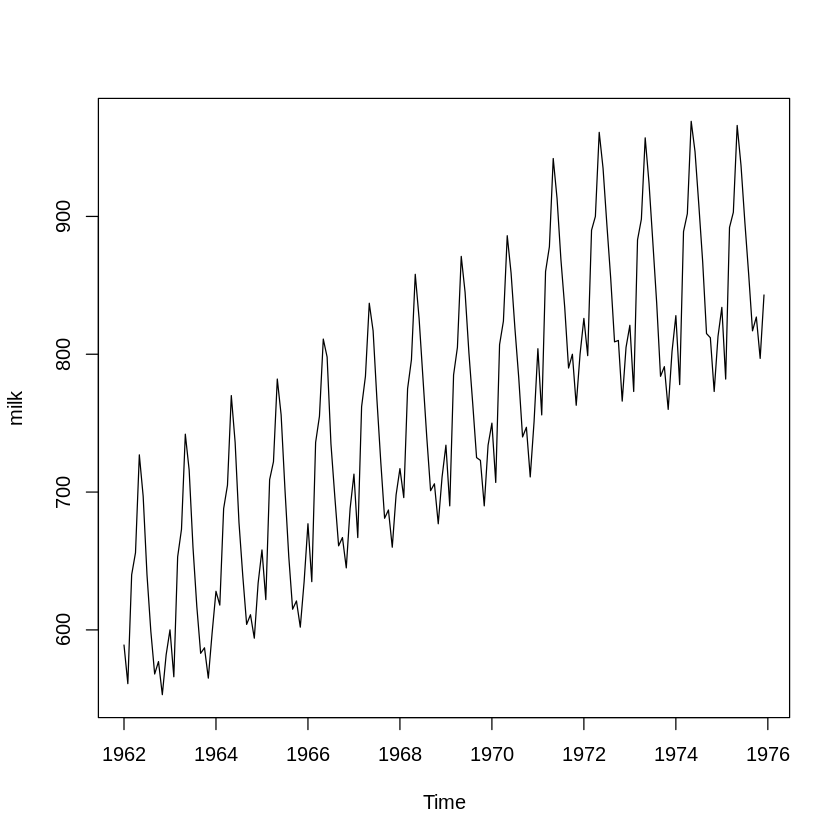

$freq
 [1] 0.005555556 0.011111111 0.016666667 0.022222222 0.027777778 0.033333333
 [7] 0.038888889 0.044444444 0.050000000 0.055555556 0.061111111 0.066666667
[13] 0.072222222 0.077777778 0.083333333 0.088888889 0.094444444 0.100000000
[19] 0.105555556 0.111111111 0.116666667 0.122222222 0.127777778 0.133333333
[25] 0.138888889 0.144444444 0.150000000 0.155555556 0.161111111 0.166666667
[31] 0.172222222 0.177777778 0.183333333 0.188888889 0.194444444 0.200000000
[37] 0.205555556 0.211111111 0.216666667 0.222222222 0.227777778 0.233333333
[43] 0.238888889 0.244444444 0.250000000 0.255555556 0.261111111 0.266666667
[49] 0.272222222 0.277777778 0.283333333 0.288888889 0.294444444 0.300000000
[55] 0.305555556 0.311111111 0.316666667 0.322222222 0.327777778 0.333333333
[61] 0.338888889 0.344444444 0.350000000 0.355555556 0.361111111 0.366666667
[67] 0.372222222 0.377777778 0.383333333 0.388888889 0.394444444 0.400000000
[73] 0.405555556 0.411111111 0.416666667 0.422222222 0.427777778 0.433

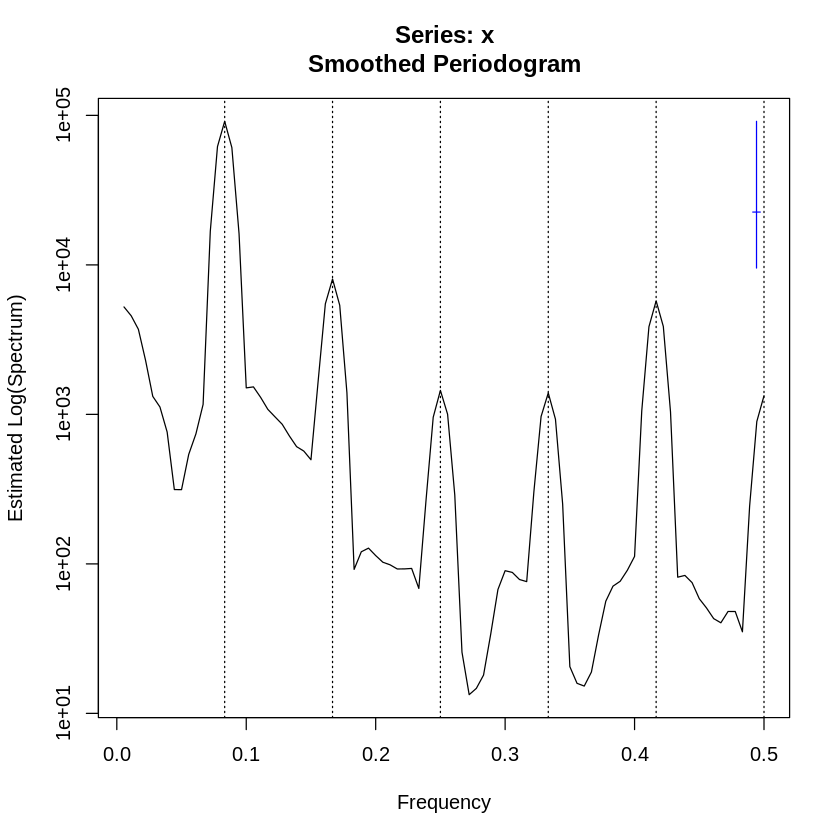

In [ ]:
data(milk)

plot(milk)

TSA::spec(milk,spans=c(3,3),detrend=T,sub='', ylab='Estimated Log(Spectrum)',xlab='Frequency')
abline(v=seq(1:6)/12,lty='dotted')

Insights:

* There is a trend in the data, so it is detrended with the linear trend model
* There is a very strong seasonality for all seasonal Fourier frequencies $f_j = k/12$, $k = 1,2, ..., 6$

## Example with Philippine Data

In [ ]:
qtr_data <- read.csv("/content/PhilQuarterData.csv")
mth_data <- read.csv("/content/PhilMonthlyData.csv")

## Data from UVLe

1. Personal (Household) Consumption Expenditure

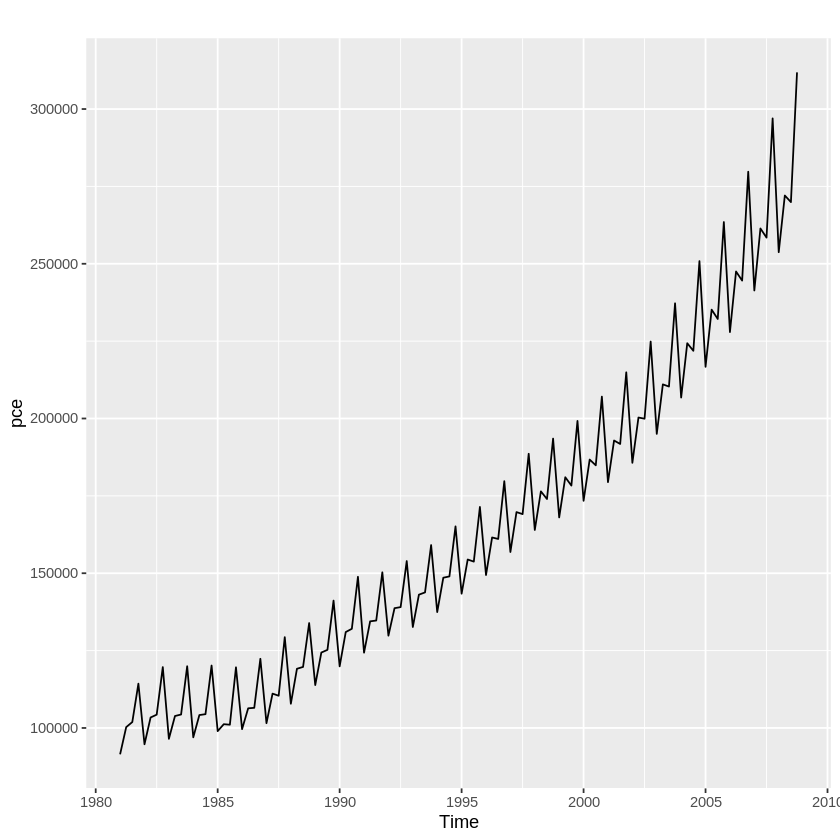

In [ ]:
## get data
pce <- ts(qtr_data$pce, start = 1981, frequency = 4)

## plot data
autoplot(pce)

We need to detrend the data. We will also use a log transform.

$freq
 [1] 0.008333333 0.016666667 0.025000000 0.033333333 0.041666667 0.050000000
 [7] 0.058333333 0.066666667 0.075000000 0.083333333 0.091666667 0.100000000
[13] 0.108333333 0.116666667 0.125000000 0.133333333 0.141666667 0.150000000
[19] 0.158333333 0.166666667 0.175000000 0.183333333 0.191666667 0.200000000
[25] 0.208333333 0.216666667 0.225000000 0.233333333 0.241666667 0.250000000
[31] 0.258333333 0.266666667 0.275000000 0.283333333 0.291666667 0.300000000
[37] 0.308333333 0.316666667 0.325000000 0.333333333 0.341666667 0.350000000
[43] 0.358333333 0.366666667 0.375000000 0.383333333 0.391666667 0.400000000
[49] 0.408333333 0.416666667 0.425000000 0.433333333 0.441666667 0.450000000
[55] 0.458333333 0.466666667 0.475000000 0.483333333 0.491666667 0.500000000

$spec
 [1] 2.348877e-02 1.354430e-02 7.309503e-03 8.210260e-03 6.389867e-03
 [6] 3.138535e-03 1.998937e-03 1.389216e-03 1.017529e-03 6.859368e-04
[11] 4.735055e-04 3.212810e-04 2.187178e-04 1.261466e-04 7.189852e-05
[16] 5.

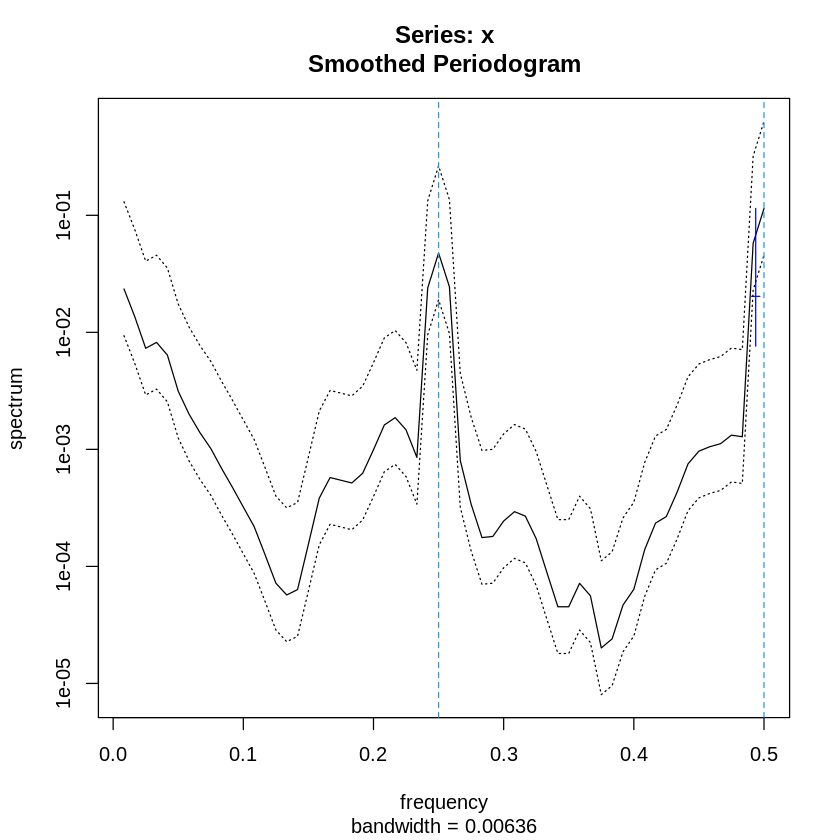

In [ ]:
TSA::spec(log(pce), span = 3, detrend = T, ci.plot = TRUE)
abline(v = 1:2/4, lty = 2, col = 4)

Insight:
* There is very strong seasonality as indicated for the Fourier seasonal frequencies

$freq
 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
[16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
[31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
[46] 0.46 0.47 0.48 0.49 0.50

$spec
 [1] 8.652330e-03 1.377936e-02 1.742840e-02 9.563876e-03 1.975040e-03
 [6] 5.973048e-04 1.716356e-04 6.984726e-05 1.443067e-05 5.890537e-05
[11] 2.241174e-04 4.442931e-04 4.805642e-04 2.887697e-04 1.017961e-04
[16] 2.660802e-05 2.191463e-05 3.596261e-05 6.710418e-05 3.551014e-04
[21] 8.049016e-04 8.869668e-04 6.562046e-04 4.449347e-04 2.969709e-04
[26] 2.550745e-04 2.618293e-04 1.937107e-04 1.201731e-04 9.540828e-05
[31] 4.935268e-05 9.937983e-06 6.116491e-06 2.538285e-05 6.689494e-05
[36] 8.701942e-05 6.348183e-05 2.642574e-05 1.078709e-05 1.248218e-05
[41] 1.275316e-05 2.519324e-05 5.716997e-05 6.326971e-05 3.915413e-05
[46] 4.021687e-05 6.394332e-05 1.273914e-04 1.652644e-04 1.503208e-04

$coh
NULL

$phas

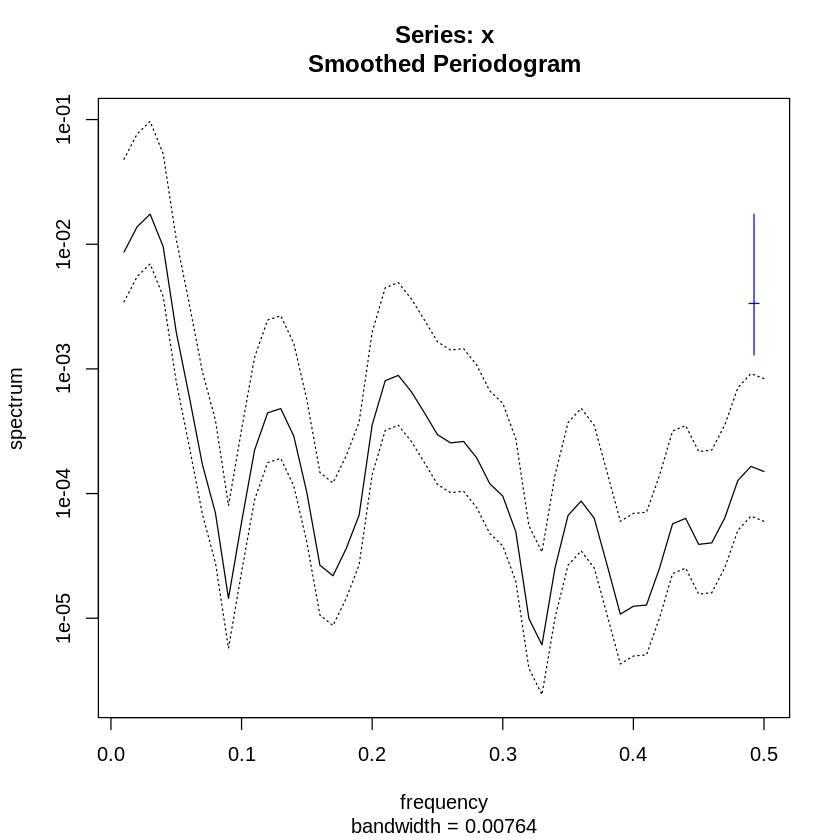

In [ ]:
## Seasonal Differenced log GDP

TSA::spec(diff(log(pce),12), span = 3, detrend = T, ci.plot = TRUE)

Insight:

* It seems that there is some pronounced low frequencies, but fairly weak in other frequencies.

2. MRT Passenger Volume

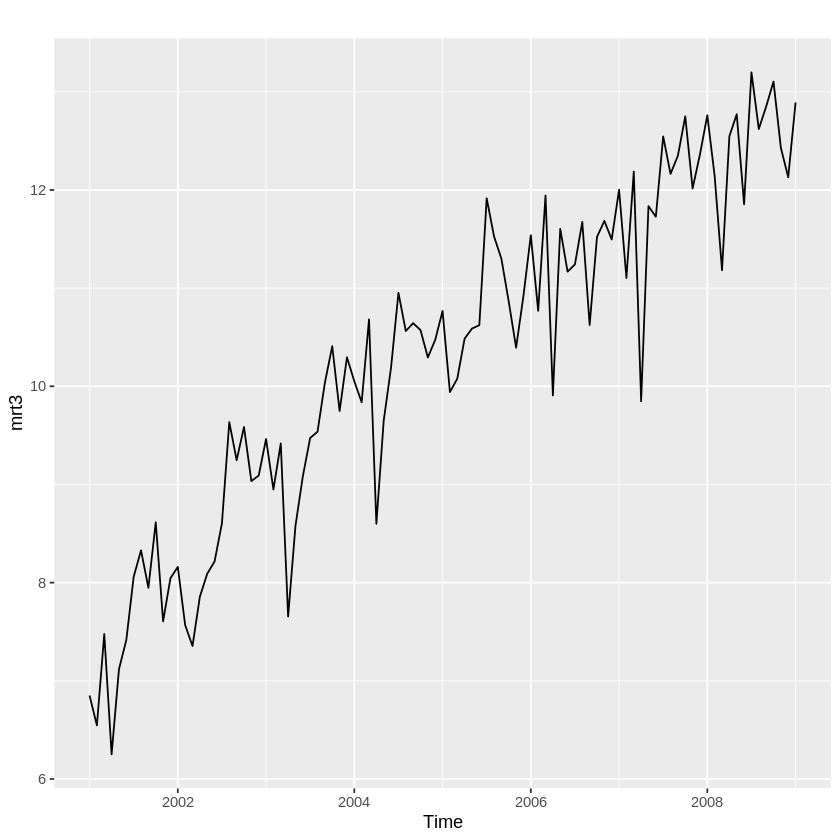

In [ ]:
mrt3 <- ts(na.omit(mth_data$mrt3), start = 2001, end = 2009, frequency = 12)

autoplot(mrt3)

We will detrend the data with a linear model.

,freq,spec
,<dbl>,<dbl>
1,0.01,160.85323
2,0.02,50.51183
3,0.03,22.46055
8,0.08,11.21658


[1] 0.97 1.94 2.91 7.76

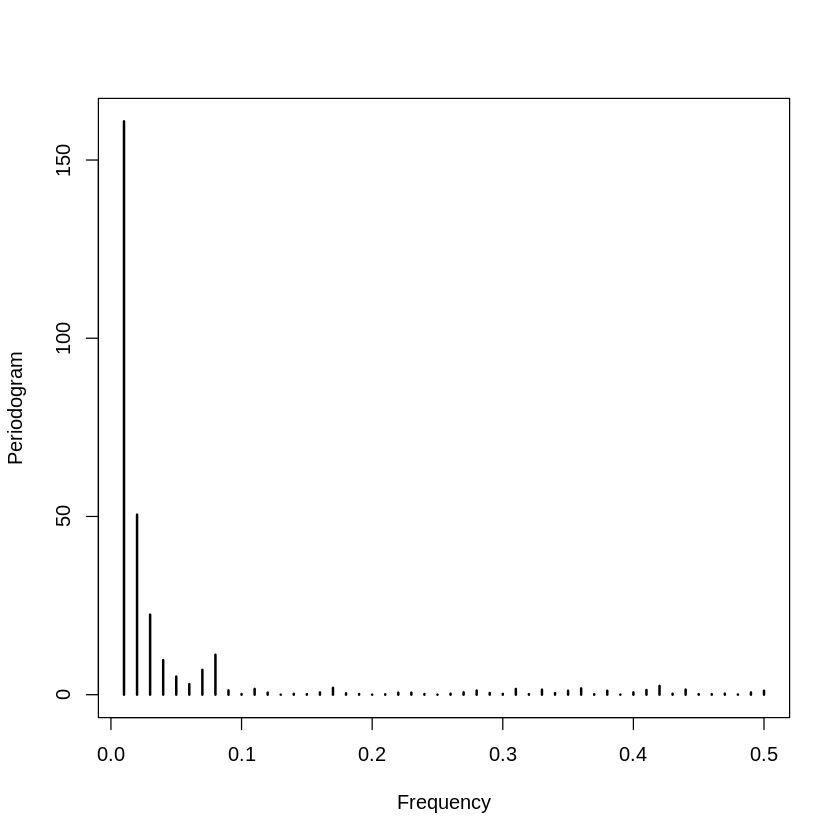

In [ ]:
pgram_res <- TSA::periodogram(mrt3)

df_pgm <- data.frame(freq = pgram_res$freq, spec = pgram_res$spec)

df_pgm[which(df_pgm$spec >= 10),]

as.numeric(df_pgm$freq[which(df_pgm$spec >= 10)])*length(mrt3)

$freq
 [1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
[16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
[31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
[46] 0.46 0.47 0.48 0.49 0.50

$spec
 [1] 1.59781118 0.66566909 0.16671011 0.11110945 0.11466531 0.29261603
 [7] 0.97288221 1.58546650 1.15044773 0.61106204 0.56645479 0.29987667
[13] 0.07113542 0.09697853 0.16287396 0.43167096 0.60590071 0.33852884
[19] 0.08505402 0.05701110 0.18460470 0.32517216 0.21011813 0.07751280
[25] 0.07046349 0.06125717 0.15588368 0.26975168 0.19401283 0.23437741
[31] 0.35626980 0.26478492 0.20102763 0.18601175 0.23093156 0.27041477
[37] 0.18107342 0.16254178 0.18535954 0.23196218 0.66046451 1.00594763
[43] 0.68000421 0.34635610 0.20240282 0.11504749 0.11474868 0.12615367
[49] 0.43072967 0.70384352

$coh
NULL

$phase
NULL

$kernel
mDaniell(1) 
coef[-1] = 0.25
coef[ 0] = 0.50
coef[ 1] = 0.25

$df
[1] 5.173333

$bandwidt

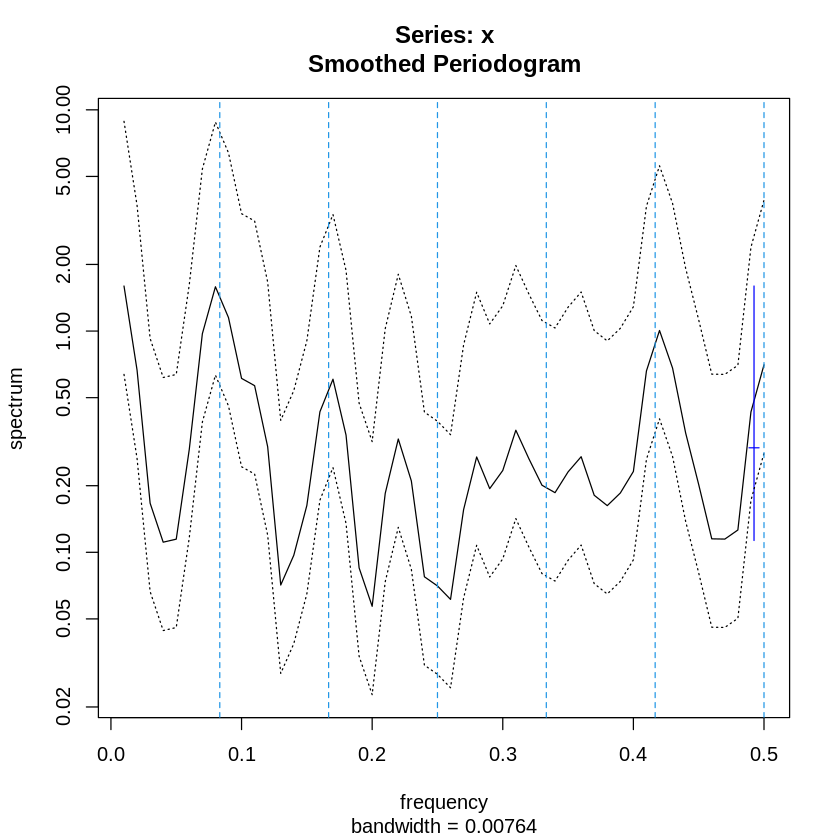

In [ ]:
TSA::spec(mrt3, span = 3, detrend = TRUE, ci.plot=TRUE)
abline(v=1:6/12, lty = 2, col = 4)

Insight

* There are strong seasonalities as indicative of spikes from seasonal Fourier frequencies.

# References:

(TATSAIR): Chatfield C & Xing H (2019).  The analysis of time series: an introduction with R, Seventh Ed. CRC Press.

(TSAAR): Cryer JD & Chan K-S (2008). Time Series Analysis With Applications in R, Second Edition. Springer Science+Business Media, LLC.

(TSDAAUR): Shumway RH & Stoffer DS (2019). Time series: a data analysis approach using R. CRC Press.